# Retinal Vessel Segmentation using modified VGA-Net



1. **Name: Adalat Khan Fahim**
2. **ID: 2021521460110**
3. **Thesis Project**



# 1. Importing necessary libraries and assets

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import skimage
from skimage import data
from skimage import filters
import time
from skimage import io, morphology
from PIL import Image
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, auc

!python --version
cv.__version__

Python 3.10.12


'4.10.0'

**1.1 Import datasets from the keggle file**

In [2]:
import os

# Replace 'your_dataset_path' with the path to your dataset in Google Drive
dataset_path = '/kaggle/input/dbdata/DRIVE'

# Change the current working directory to the dataset path
os.chdir(dataset_path)

# List the files in the dataset directory to confirm
os.listdir(dataset_path)


['training', 'test']

**1.2 Set Image Path variables**

In [3]:
# Path to the directory containing the train images
path_to_train_images = '/kaggle/input/dbdata/DRIVE/training/images'

# Path to the directory containing the test images
path_to_test_images = '/kaggle/input/dbdata/DRIVE/test/images'

# Path to the directory containing the groundtruth/manual for train images
path_to_train_manual = '/kaggle/input/dbdata/DRIVE/training/1st_manual'

# Path to the directory containing the masks for train images
path_to_train_mask = '/kaggle/input/dbdata/DRIVE/training/mask'

# Path to the directory containing the masks for test images
path_to_test_mask = '/kaggle/input/dbdata/DRIVE/test/mask'

**1.3 Get the train/test images**

In [4]:
def getImage_train(img_num):
  path = path_to_train_images
  name = str(img_num)+'_training.tif'
  full_path = path + name
  image = cv.imread(full_path, -1)
  return image

In [5]:
def getImage_test(img_num):
  path = path_to_test_images
  name = str(img_num - 20) + '_test.tif'
  if (img_num - 20) < 10:
    name = '0'+ name
  full_path = path + name
  image = cv.imread(full_path, -1)
  return image

**1.5 Get the groundtruths of the train/test images**

In [6]:
def getManual_train(man_num):
  path = path_to_train_manual
  name = str(man_num)+'_manual1.gif'
  full_path = path + name
  man_gif = Image.open(full_path)
  man_gif = np.array(man_gif, dtype=np.uint8)

  return man_gif

In [7]:
def getManual_test(man_num):
  path = path_to_test_manual
  name = str(man_num - 20)+'_test.tif'
  if (man_num - 20) < 10:
    name = '0'+ name
  full_path = path + name
  man_gif = Image.open(full_path)
  man_gif = np.array(man_gif, dtype=np.uint8)

  return man_gif

**1.6. Example Train Images**

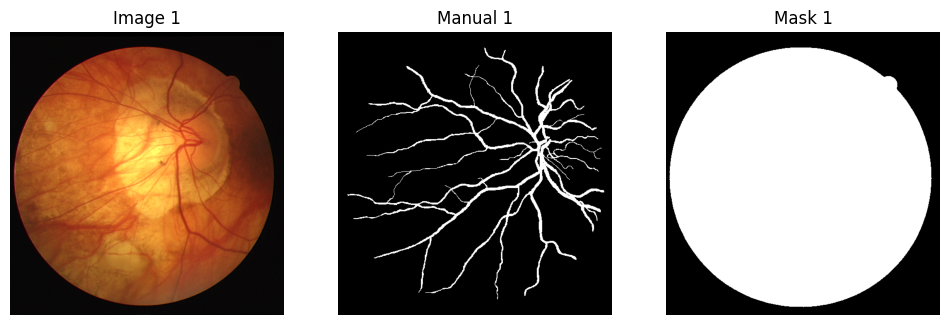

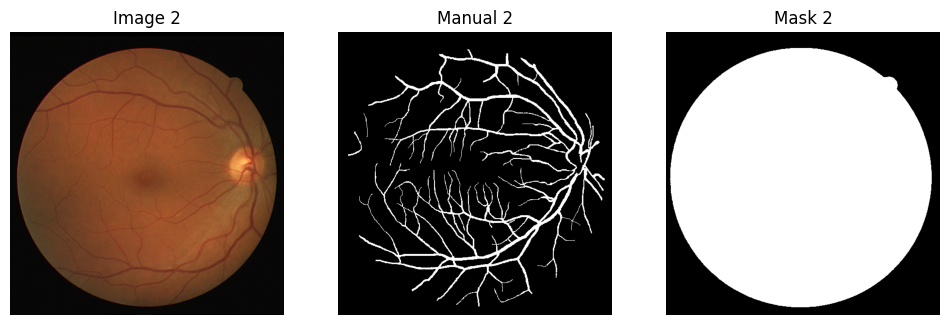

In [8]:
import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt

# Load and display example images
def display_example_images(image_dir, manual_dir, mask_dir, num_examples=3):
    image_files = os.listdir(image_dir)
    manual_files = os.listdir(manual_dir)
    mask_files = os.listdir(mask_dir)

    # Display the first `num_examples` images, manuals, and masks
    for i in range(min(num_examples, len(image_files))):
        # Read the image using OpenCV
        img = cv2.imread(os.path.join(image_dir, image_files[i]), cv2.IMREAD_COLOR)

        # Try reading manual and mask images with Pillow for better GIF support
        manual_path = os.path.join(manual_dir, manual_files[i])
        mask_path = os.path.join(mask_dir, mask_files[i])

        # Use PIL to open manual and mask images
        try:
            manual = Image.open(manual_path)
        except:
            print(f"Error loading manual image: {manual_files[i]}")
            continue

        try:
            mask = Image.open(mask_path)
        except:
            print(f"Error loading mask image: {mask_files[i]}")
            continue

        # Convert the OpenCV image from BGR to RGB for correct display
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Convert the PIL images to numpy arrays and RGB for correct display
        manual_rgb = np.array(manual.convert('RGB'))
        mask_rgb = np.array(mask.convert('RGB'))

        # Display the images
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 3, 1)
        plt.imshow(img_rgb)
        plt.title(f'Image {i+1}')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(manual_rgb)
        plt.title(f'Manual {i+1}')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(mask_rgb)
        plt.title(f'Mask {i+1}')
        plt.axis('off')

        plt.show()

# Example usage
display_example_images(path_to_train_images, path_to_train_manual, path_to_train_mask, num_examples=2)


**1.7 Example Test Images**

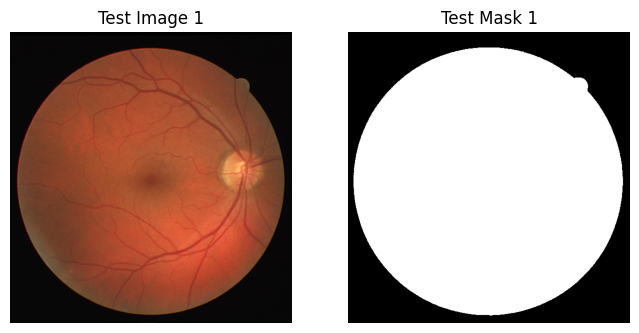

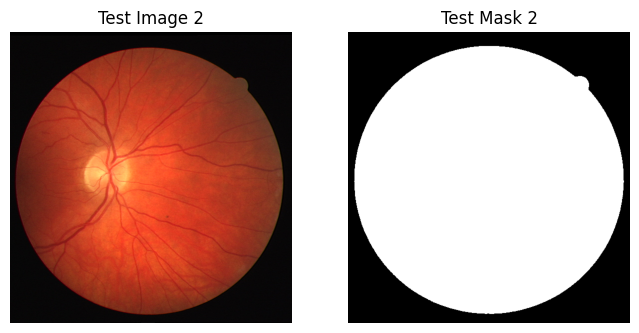

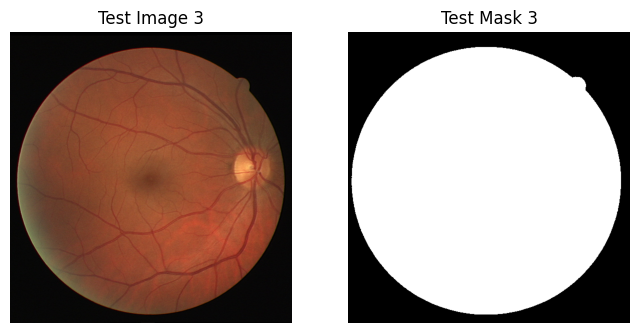

In [9]:
    import os
    import cv2
    from PIL import Image
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Function to display example images (adjusted for test dataset)
    def display_test_images(image_dir, mask_dir, num_examples=3, label="Test"):
        """
        Display images and masks for the test dataset.
        
        Args:
            image_dir (str): Path to the directory containing the test images.
            mask_dir (str): Path to the directory containing the masks.
            num_examples (int): Number of examples to display.
            label (str): Label for the dataset (e.g., "Test").
        """
        image_files = os.listdir(image_dir)
        mask_files = os.listdir(mask_dir)
    
        # Display the first `num_examples` images and masks
        for i in range(min(num_examples, len(image_files))):
            # Read the image using OpenCV
            img = cv2.imread(os.path.join(image_dir, image_files[i]), cv2.IMREAD_COLOR)
    
            # Read the mask using PIL
            mask_path = os.path.join(mask_dir, mask_files[i])
    
            try:
                mask = Image.open(mask_path)
            except:
                print(f"Error loading mask image: {mask_files[i]}")
                continue
    
            # Convert the OpenCV image from BGR to RGB for correct display
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
            # Convert the PIL mask to a numpy array and RGB for correct display
            mask_rgb = np.array(mask.convert('RGB'))
    
            # Display the images
            plt.figure(figsize=(8, 4))
    
            plt.subplot(1, 2, 1)
            plt.imshow(img_rgb)
            plt.title(f'{label} Image {i+1}')
            plt.axis('off')
    
            plt.subplot(1, 2, 2)
            plt.imshow(mask_rgb)
            plt.title(f'{label} Mask {i+1}')
            plt.axis('off')
    
            plt.show()
    
    
    # Paths to test directories
    path_to_test_images = '/kaggle/input/dbdata/DRIVE/test/images'
    path_to_test_mask = '/kaggle/input/dbdata/DRIVE/test/mask'
    
    # Display example test images
    display_test_images(path_to_test_images, path_to_test_mask, num_examples=3, label="Test")

# 2. Preprocess all the images

**This function will handle preprocessing tasks like:**

1. Background intensity normalization
2. Contrast Limited Adaptive Histogram Equalization (CLAHE)
3. Unsharp masking filter
4. These preprocessing steps are applied to the full image before any patch extraction takes place.

**2.1 pre_process v1 (with replace_black_area)**

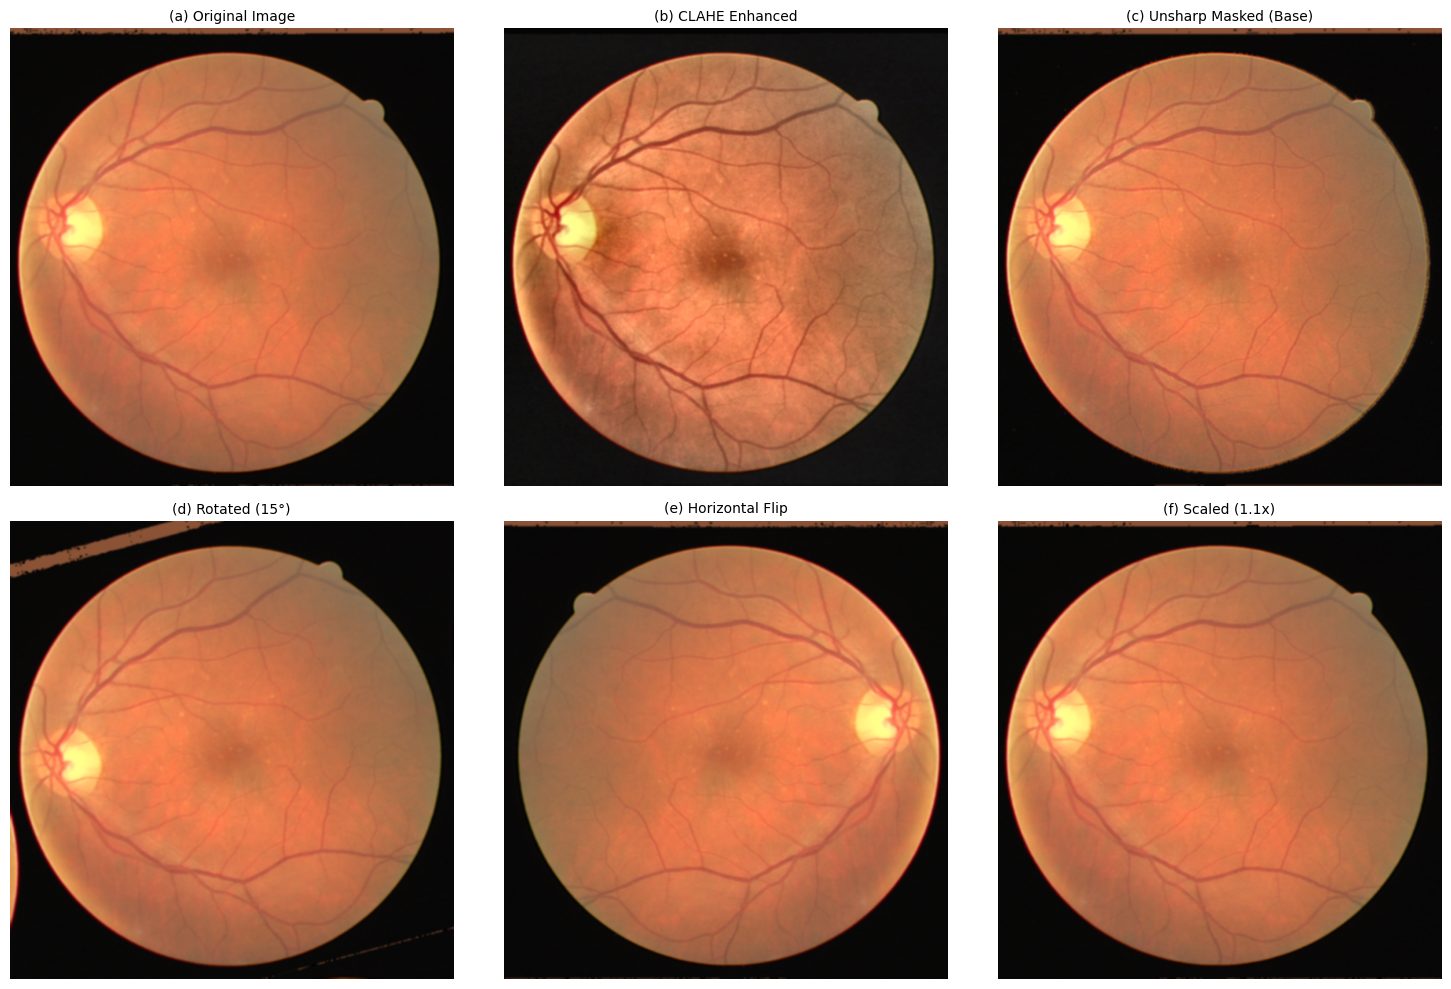

In [53]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def replace_black_area(image):
    img = image.copy()
    average_red = np.mean(img[:, :, 2])
    average_green = np.mean(img[:, :, 1])
    average_blue = np.mean(img[:, :, 0])
    black_mask = np.all(img == [0, 0, 0], axis=2)
    img[black_mask] = [average_blue, average_green, average_red]
    img = cv2.GaussianBlur(img, (5, 5), 0)
    return img

def apply_clahe(image, clip_limit=2.0, tile_grid_size=(8, 8)):
    img = image.copy()
    lab_image = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    l_channel, a_channel, b_channel = cv2.split(lab_image)
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    l_channel = clahe.apply(l_channel)
    lab_image = cv2.merge((l_channel, a_channel, b_channel))
    return cv2.cvtColor(lab_image, cv2.COLOR_LAB2RGB)

def unsharp_mask(image, sigma=1.0, strength=1.5):
    blurred = cv2.GaussianBlur(image, (0, 0), sigma)
    return cv2.addWeighted(image, 1.0 + strength, blurred, -strength, 0)

def rotate_image(image, angle):
    h, w = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, M, (w, h), borderMode=cv2.BORDER_REFLECT)

def scale_image(image, scale=1.1):
    h, w = image.shape[:2]
    return cv2.resize(image, (int(w * scale), int(h * scale)), interpolation=cv2.INTER_LINEAR)

# === Load Image ===

img_path = '/kaggle/input/dbdata/DRIVE/training/images/21_training.tif'
img = Image.open(img_path).convert('RGB')
img = np.array(img)

# === Apply All Transformations ===

original = replace_black_area(img)
clahe_img = replace_black_area(apply_clahe(img))
sharp_img = replace_black_area(unsharp_mask(img))
rotated_img = replace_black_area(rotate_image(img, 15))
flip_img = replace_black_area(cv2.flip(img, 1))
scaled_img = replace_black_area(scale_image(img, 1.1))

# === Plot All ===

titles = [
    "(a) Original Image", "(b) CLAHE Enhanced", "(c) Unsharp Masked (Base)",
    "(d) Rotated (15°)", "(e) Horizontal Flip", "(f) Scaled (1.1x)"
]

images = [original, clahe_img, sharp_img, rotated_img, flip_img, scaled_img]

plt.figure(figsize=(15, 10))
for i, (title, img) in enumerate(zip(titles, images)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(title, fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()


**2.3 Create two directories to store preprocessed images and Patch extracted images in the output directory on Keggle**
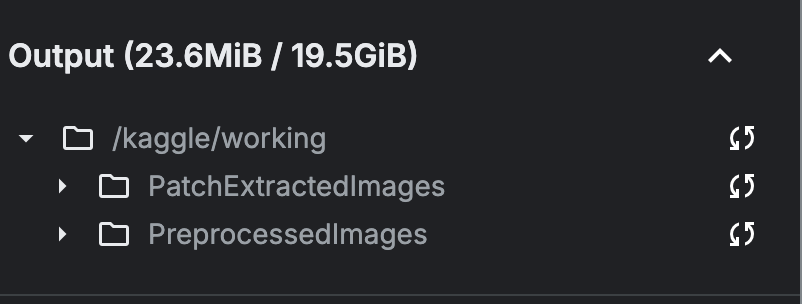

In [54]:
import os

# Define the paths for the new directories
preprocessed_dir = "/kaggle/working/PreprocessedImages"
patch_extracted_dir = "/kaggle/working/PatchExtractedImages"

# Create the directories
os.makedirs(preprocessed_dir, exist_ok=True)
os.makedirs(patch_extracted_dir, exist_ok=True)

print(f"Created directories: {preprocessed_dir} and {patch_extracted_dir}")

Created directories: /kaggle/working/PreprocessedImages and /kaggle/working/PatchExtractedImages


**2.4 Save Results of the preprocessed images to the created PreprocessedImages output directory**
Below is the short snippet of the saved images (total 20 imaegs)
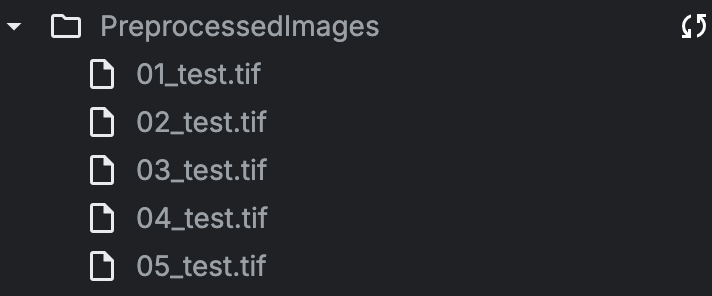

In [55]:
import os
import cv2
import numpy as np
from PIL import Image
import random

# Directories
dataset_dir = '/kaggle/input/dbdata/DRIVE/training/images'  
output_dir = '/kaggle/working/PreprocessedImages'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# List all files in the dataset directory
file_list = os.listdir(dataset_dir)

# Function to replace black areas in an image
def replace_black_area(image):
    # Create a copy to avoid modifying the original
    img = image.copy()
    # Calculate the average color for each channel
    average_red = np.mean(img[:, :, 2])  # OpenCV uses BGR format
    average_green = np.mean(img[:, :, 1])
    average_blue = np.mean(img[:, :, 0])
    # Create a mask for black areas (all channels == 0)
    black_mask = np.all(img == [0, 0, 0], axis=2)
    # Replace black pixels with the average color
    img[black_mask] = [average_blue, average_green, average_red]
    # Blur the image to smooth the replaced areas
    img = cv2.GaussianBlur(img, (5, 5), 0)
    return img

# Function to restore black areas
def replace_black_area_back(original_image, processed_image):
    black_mask = np.all(original_image == [0, 0, 0], axis=2)
    processed_image[black_mask] = [0, 0, 0]
    return processed_image

# Function to apply CLAHE to enhance image contrast
def apply_clahe(image, clip_limit=2.0, tile_grid_size=(8, 8)):
    img = image.copy()
    lab_image = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)  # Changed to BGR2LAB since input is BGR
    l_channel, a_channel, b_channel = cv2.split(lab_image)
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    clahe_l_channel = clahe.apply(l_channel)
    clahe_lab_image = cv2.merge((clahe_l_channel, a_channel, b_channel))
    clahe_rgb_image = cv2.cvtColor(clahe_lab_image, cv2.COLOR_LAB2BGR)
    return clahe_rgb_image

# Function to apply unsharp masking to sharpen the image
def unsharp_mask(image, sigma=1.0, strength=1.5):
    img = image.copy()
    blurred = cv2.GaussianBlur(img, (0, 0), sigma)
    sharp = cv2.addWeighted(img, 1.0 + strength, blurred, -strength, 0)
    return sharp

# Function to adjust brightness and contrast
def adjust_brightness_contrast(image, brightness=0, contrast=1.0):
    img = image.copy().astype(np.float32)
    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        alpha_b = (highlight - shadow)/255
        gamma_b = shadow
        img = alpha_b * img + gamma_b
    if contrast != 1.0:
        mean = np.mean(img)
        img = (img - mean) * contrast + mean
    img = np.clip(img, 0, 255).astype(np.uint8)
    return img

# Function to simulate different lighting conditions
def adjust_gamma(image, gamma=1.0):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in range(0, 256)]).astype(np.uint8)
    return cv2.LUT(image.copy(), table)

# Function to add noise to an image
def add_noise(image, noise_type="gaussian", amount=0.05):
    img = image.copy()
    if noise_type == "gaussian":
        mean = 0
        var = amount * 255
        sigma = var ** 0.5
        gauss = np.random.normal(mean, sigma, img.shape).astype(np.uint8)
        noisy = cv2.add(img, gauss)
        return noisy
    elif noise_type == "salt_pepper":
        s_vs_p = 0.5
        noisy = np.copy(img)
        num_salt = np.ceil(amount * img.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt)) for i in img.shape]
        noisy[coords[0], coords[1], :] = 255
        num_pepper = np.ceil(amount * img.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in img.shape]
        noisy[coords[0], coords[1], :] = 0
        return noisy
    elif noise_type == "speckle":
        gauss = np.random.randn(*img.shape) * amount
        noisy = img + img * gauss
        return np.clip(noisy, 0, 255).astype(np.uint8)
    return img

# Function to simulate blur
def add_blur(image, blur_type="gaussian", kernel_size=5):
    img = image.copy()
    if blur_type == "gaussian":
        return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)
    elif blur_type == "motion":
        kernel = np.zeros((kernel_size, kernel_size))
        kernel[int((kernel_size-1)/2), :] = np.ones(kernel_size)
        kernel = kernel / kernel_size
        return cv2.filter2D(img, -1, kernel)
    elif blur_type == "median":
        return cv2.medianBlur(img, kernel_size)
    return img

# Function to adjust color balance
def adjust_color_balance(image, red_offset=0, green_offset=0, blue_offset=0):
    img = image.copy()
    b, g, r = cv2.split(img)
    r = np.clip(r.astype(np.int16) + red_offset, 0, 255).astype(np.uint8)
    g = np.clip(g.astype(np.int16) + green_offset, 0, 255).astype(np.uint8)
    b = np.clip(b.astype(np.int16) + blue_offset, 0, 255).astype(np.uint8)
    return cv2.merge([b, g, r])

# Function to apply random augmentations
def apply_random_augmentations(image):
    img = image.copy()
    augmentations = [
        (adjust_brightness_contrast, {'brightness': random.randint(-30, 30), 
                                     'contrast': random.uniform(0.7, 1.3)}, 0.7),
        (adjust_gamma, {'gamma': random.uniform(0.7, 1.3)}, 0.5),
        (add_noise, {'noise_type': random.choice(['gaussian', 'salt_pepper', 'speckle']), 
                    'amount': random.uniform(0.01, 0.05)}, 0.3),
        (add_blur, {'blur_type': random.choice(['gaussian', 'motion', 'median']), 
                   'kernel_size': random.choice([3, 5])}, 0.2),
        (adjust_color_balance, {'red_offset': random.randint(-20, 20), 
                               'green_offset': random.randint(-20, 20), 
                               'blue_offset': random.randint(-20, 20)}, 0.4),
        (apply_clahe, {'clip_limit': random.uniform(1.0, 3.0), 
                      'tile_grid_size': random.choice([(4,4), (8,8)])}, 0.6),
        (unsharp_mask, {'sigma': random.uniform(0.5, 2.0), 
                       'strength': random.uniform(0.5, 2.0)}, 0.5)
    ]
    for aug_func, aug_args, prob in augmentations:
        if random.random() < prob:
            img = aug_func(img, **aug_args)
    return img

# Iterate over each file in the dataset directory
for file_name in file_list:
    file_path = os.path.join(dataset_dir, file_name)
    
    # Try loading the image with PIL for GIF/TIFF support
    try:
        with Image.open(file_path) as img:
            # Convert to RGB and then to NumPy array (BGR for OpenCV)
            original_image = np.array(img.convert("RGB"))
            original_image = cv2.cvtColor(original_image, cv2.COLOR_RGB2BGR)  # Convert RGB to BGR
        print(f"Image loaded with PIL: {file_name}")
    except Exception as e:
        print(f"PIL failed for {file_name}: {e}, trying OpenCV...")
        # Fallback to OpenCV for other formats
        original_image = cv2.imread(file_path)
        if original_image is None:
            print(f"Error: Could not load image {file_name}")
            continue

    # Apply the original preprocessing steps
    modified_image = replace_black_area(original_image)
    clahe_image = apply_clahe(modified_image)
    unsharp_masked_image = unsharp_mask(clahe_image)
    
    # Apply random augmentations (optional, based on first code)
    augmented_image = apply_random_augmentations(unsharp_masked_image)
    
    # Restore black areas
    restored_image = replace_black_area_back(original_image, augmented_image)
    
    # Save the processed image
    output_path = os.path.join(output_dir, file_name)
    # Ensure the output is in a compatible format (e.g., TIFF or PNG)
    if file_name.lower().endswith('.gif') or file_name.lower().endswith('.tif') or file_name.lower().endswith('.tiff'):
        # Convert back to RGB for PIL saving
        restored_image_rgb = cv2.cvtColor(restored_image, cv2.COLOR_BGR2RGB)
        Image.fromarray(restored_image_rgb).save(output_path)
    else:
        cv2.imwrite(output_path, restored_image)
    
    print(f"Processed and saved image: {output_path}")

Image loaded with PIL: 34_training.tif
Processed and saved image: /kaggle/working/PreprocessedImages/34_training.tif
Image loaded with PIL: 40_training.tif
Processed and saved image: /kaggle/working/PreprocessedImages/40_training.tif
Image loaded with PIL: 22_training.tif
Processed and saved image: /kaggle/working/PreprocessedImages/22_training.tif
Image loaded with PIL: 27_training.tif
Processed and saved image: /kaggle/working/PreprocessedImages/27_training.tif
Image loaded with PIL: 28_training.tif
Processed and saved image: /kaggle/working/PreprocessedImages/28_training.tif
Image loaded with PIL: 26_training.tif
Processed and saved image: /kaggle/working/PreprocessedImages/26_training.tif
Image loaded with PIL: 38_training.tif
Processed and saved image: /kaggle/working/PreprocessedImages/38_training.tif
Image loaded with PIL: 39_training.tif
Processed and saved image: /kaggle/working/PreprocessedImages/39_training.tif
Image loaded with PIL: 24_training.tif
Processed and saved image

**2.5 Perform patch_extraction on the preprocessed images to convert all images to patches and save them to the PatchExtractedImaged output directory**
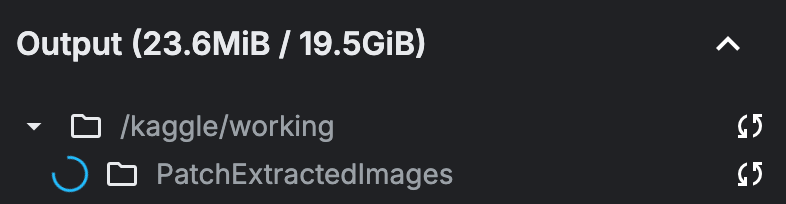

In [56]:
import os
import cv2
import numpy as np

# Function to extract random patches from an image
def extract_random_patches(image, patch_size, num_patches):
    patches = []
    height, width = image.shape[:2]  # Handle both grayscale and RGB images
    if patch_size > height or patch_size > width:
        raise ValueError("Patch size is larger than the image dimensions.")
    
    for _ in range(num_patches):
        # Generate random coordinates for the top-left corner of the patch
        top_left_x = np.random.randint(0, width - patch_size + 1)
        top_left_y = np.random.randint(0, height - patch_size + 1)

        # Extract the patch from the image
        patch = image[top_left_y:top_left_y + patch_size, top_left_x:top_left_x + patch_size]
        patches.append(patch)
    return patches

# Directories
preprocessed_dir = '/kaggle/working/PreprocessedImages'
patches_dir = '/kaggle/working/PatchExtractedImages'

# Create the patches directory if it doesn't exist
os.makedirs(patches_dir, exist_ok=True)

# Patch size
patch_size = 48

# Number of patches to extract from each image
num_patches_per_image = 143

# List all preprocessed images in the preprocessed directory
file_list = os.listdir(preprocessed_dir)

# Iterate over each preprocessed image
for file_name in file_list:
    file_path = os.path.join(preprocessed_dir, file_name)

    # Read the preprocessed image
    preprocessed_image = cv2.imread(file_path)
    if preprocessed_image is None:
        print(f"Warning: Unable to read the file {file_name}. Skipping.")
        continue

    try:
        # Extract random patches from the preprocessed image
        patches = extract_random_patches(preprocessed_image, patch_size, num_patches_per_image)

        # Save the extracted patches
        for i, patch in enumerate(patches):
            patch_name = os.path.splitext(file_name)[0] + f'_patch_{i}.jpg'
            cv2.imwrite(os.path.join(patches_dir, patch_name), patch)
    except ValueError as e:
        print(f"Error with file {file_name}: {e}")

**Check the number of saved patches**

In [58]:
import os

# Directory where patches are saved
patches_dir = '/kaggle/working/PatchExtractedImages'

# List all files in the patches directory
saved_patches = [file for file in os.listdir(patches_dir) if file.endswith('.jpg')]

# Count the total number of saved patches
num_saved_patches = len(saved_patches)

# Print the result
print(f"Total number of saved patches: {num_saved_patches}")

Total number of saved patches: 2860


**9.1. Visualize Extracted Patches with size**

Patch 1 (21_training_patch_0.jpg): Size = (48, 48) (Height x Width), Channels = 3
Patch 2 (21_training_patch_1.jpg): Size = (48, 48) (Height x Width), Channels = 3
Patch 3 (21_training_patch_10.jpg): Size = (48, 48) (Height x Width), Channels = 3
Patch 4 (21_training_patch_100.jpg): Size = (48, 48) (Height x Width), Channels = 3
Patch 5 (21_training_patch_101.jpg): Size = (48, 48) (Height x Width), Channels = 3
Patch 6 (21_training_patch_102.jpg): Size = (48, 48) (Height x Width), Channels = 3
Patch 7 (21_training_patch_103.jpg): Size = (48, 48) (Height x Width), Channels = 3
Patch 8 (21_training_patch_104.jpg): Size = (48, 48) (Height x Width), Channels = 3
Patch 9 (21_training_patch_105.jpg): Size = (48, 48) (Height x Width), Channels = 3
Patch 10 (21_training_patch_106.jpg): Size = (48, 48) (Height x Width), Channels = 3


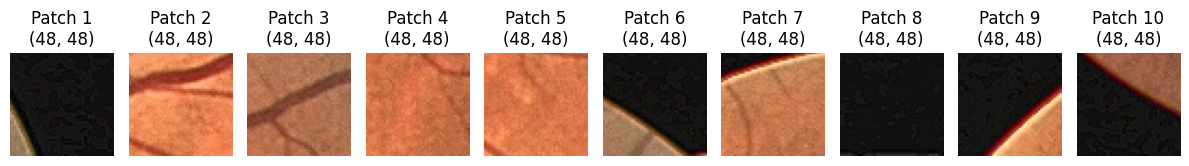

In [59]:
import os
import cv2
import matplotlib.pyplot as plt

# Directory containing the patches
patches_dir = '/kaggle/working/PatchExtractedImages'  # Update this path with the correct one

# List of patch files
patch_files = sorted(os.listdir(patches_dir))  # Sort for consistent order

# Number of patches to visualize
num_patches_to_show = min(10, len(patch_files))  # Ensure we don’t exceed available patches

# Create a figure with a specific size for better visualization
plt.figure(figsize=(12, 6))

# Loop over the patches and display them
for i, patch_file in enumerate(patch_files[:num_patches_to_show]):
    patch_path = os.path.join(patches_dir, patch_file)

    # Read the patch image
    patch_image = cv2.imread(patch_path)

    if patch_image is None:
        print(f"Failed to load patch: {patch_path}")
        continue

    # Get patch size (height, width, channels)
    patch_height, patch_width, patch_channels = patch_image.shape
    patch_size = (patch_height, patch_width)  # Exclude channels for simplicity
    print(f"Patch {i+1} ({patch_file}): Size = {patch_size} (Height x Width), Channels = {patch_channels}")

    # Convert BGR (OpenCV format) to RGB (Matplotlib format)
    patch_rgb = cv2.cvtColor(patch_image, cv2.COLOR_BGR2RGB)

    # Create a subplot to show each patch
    plt.subplot(1, num_patches_to_show, i + 1)
    plt.imshow(patch_rgb)
    plt.title(f"Patch {i+1}\n{patch_size}")
    plt.axis('off')  # Hide axes for a cleaner look

# Display all the patches in one figure
plt.tight_layout()
plt.show()

# 10. Integrate GraphConstruction
This code defines a PyTorch module and responsible for creating a graph representation of an image by dividing it into patches and constructing an adjacency matrix based on the similarity between these patches. 
Below I have added an example code as well to check the Module is wroking or not.

In [16]:
import torch
import torch.nn as nn
import numpy as np

class GraphConstruction(nn.Module):
    def __init__(self, patch_size, hop_distance):
        super().__init__()
        self.patch_size = patch_size
        self.hop_distance = hop_distance
        self.weight = nn.Parameter(torch.randn(1))
    
    def forward(self, x, num_nodes=None):
        batch_size = x.size(0)
        if num_nodes is not None:
            grid_size = int(np.sqrt(num_nodes))
            num_patches = grid_size * grid_size
        else:
            h, w = x.size(2) // self.patch_size, x.size(3) // self.patch_size
            num_patches = h * w
        
        adj_matrix = torch.zeros(batch_size, num_patches, num_patches, device=x.device)
        grid_size = int(np.sqrt(num_patches))
        
        for i in range(num_patches):
            row_i, col_i = i // grid_size, i % grid_size
            for j in range(num_patches):
                row_j, col_j = j // grid_size, j % grid_size
                dist = abs(row_i - row_j) + abs(col_i - col_j)
                if dist <= self.hop_distance:
                    adj_matrix[:, i, j] = 1.0
        return adj_matrix

**Visualize the Adjacency Matrix as a Graph:**

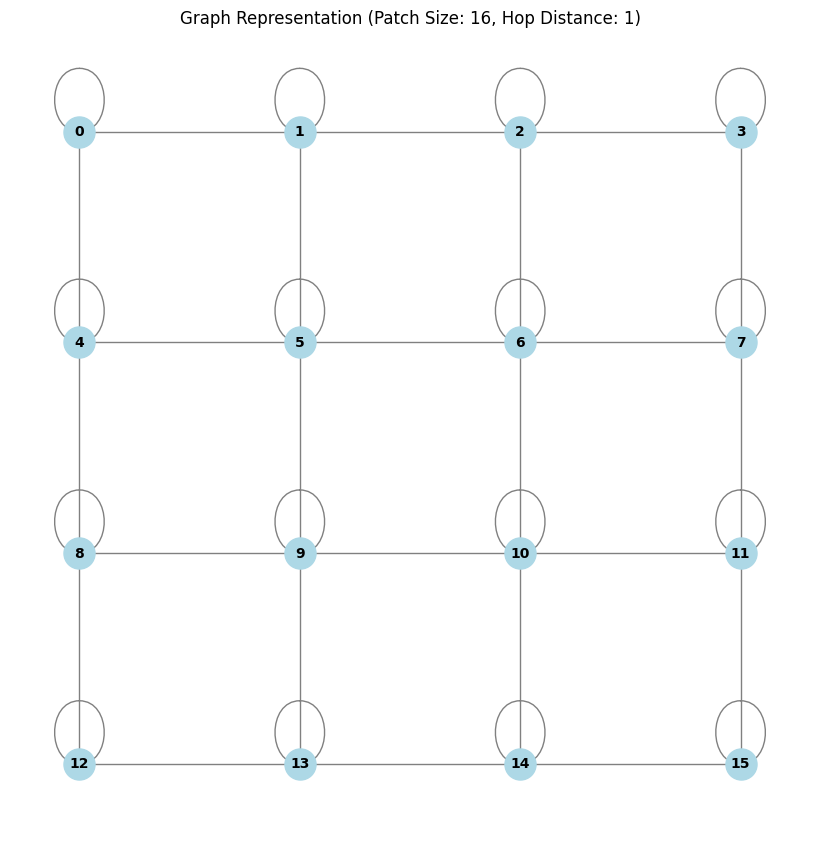

In [17]:
import torch
import torch.nn as nn
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Define the GraphConstruction class
class GraphConstruction(nn.Module):
    def __init__(self, patch_size, hop_distance):
        super().__init__()
        self.patch_size = patch_size
        self.hop_distance = hop_distance
        self.weight = nn.Parameter(torch.randn(1))
    
    def forward(self, x, num_nodes=None):
        batch_size = x.size(0)
        if num_nodes is not None:
            grid_size = int(np.sqrt(num_nodes))
            num_patches = grid_size * grid_size
        else:
            h, w = x.size(2) // self.patch_size, x.size(3) // self.patch_size
            num_patches = h * w
        
        adj_matrix = torch.zeros(batch_size, num_patches, num_patches, device=x.device)
        grid_size = int(np.sqrt(num_patches))
        
        for i in range(num_patches):
            row_i, col_i = i // grid_size, i % grid_size
            for j in range(num_patches):
                row_j, col_j = j // grid_size, j % grid_size
                dist = abs(row_i - row_j) + abs(col_i - col_j)
                if dist <= self.hop_distance:
                    adj_matrix[:, i, j] = 1.0
        return adj_matrix

# Instantiate the model
patch_size = 16
hop_distance = 1
model = GraphConstruction(patch_size=patch_size, hop_distance=hop_distance)

# Create a sample input tensor
batch_size = 1
channels = 3
height = 64
width = 64
x = torch.randn(batch_size, channels, height, width)

# Get the adjacency matrix
model.eval()
with torch.no_grad():
    adj_matrix = model(x)  # Shape: [batch_size, num_patches, num_patches]

# Convert adjacency matrix to NumPy for visualization (use first batch)
adj_matrix_np = adj_matrix[0].cpu().numpy()  # Shape: [num_patches, num_patches]

# Create a graph from the adjacency matrix
G = nx.from_numpy_array(adj_matrix_np)

# Compute positions for nodes in a grid layout (to reflect the patch grid)
grid_size = int(np.sqrt(adj_matrix_np.shape[0]))
pos = {(i): (i % grid_size, -(i // grid_size)) for i in range(adj_matrix_np.shape[0])}

# Plot the graph
plt.figure(figsize=(8, 8))
nx.draw(
    G,
    pos=pos,
    with_labels=True,
    node_color="lightblue",
    edge_color="gray",
    node_size=500,
    font_size=10,
    font_weight="bold"
)
plt.title(f"Graph Representation (Patch Size: {patch_size}, Hop Distance: {hop_distance})")
plt.show()

**Visualize the Computational Graph:**

# 11. A deep learning model **DRIU** for pixel level feature extraction
This code defines a deep learning model DRIU, which is designed for image segmentation tasks, specifically targeting blood vessel segmentation. The model utilizes a base network (VGG-16) for feature extraction and then employs specialized layers for detecting blood vessels and the optic disc. These specialized layers process the extracted features to segment the target structures.

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Weight Initialization Function
def weights_init(m):
    if isinstance(m, nn.Conv2d):
        nn.init.kaiming_normal_(m.weight, nonlinearity="relu")
        if m.bias is not None:
            nn.init.constant_(m.bias, 0)

class DRIU(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.input_size = input_size
        self.num_channels = 16  # Output channels for specialized layers

        # Base network (lighter VGG)
        self.base_network = VGG(input_size=input_size)

        # Specialized layers (adjusted for 128 channels from VGG)
        self.vessel_specialized_layers = nn.Sequential(
            nn.Conv2d(128, self.num_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(self.num_channels),
            nn.LeakyReLU(0.01)
        )

        self.optic_disc_specialized_layers = nn.Sequential(
            nn.Conv2d(128, self.num_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(self.num_channels),
            nn.LeakyReLU(0.01)
        )

        # Final layer
        self.final_layer = nn.Sequential(
            nn.Conv2d(self.num_channels * 2, 1, kernel_size=1),  # 32 input channels
            nn.Sigmoid()
        )

        # Apply weight initialization
        self.apply(weights_init)

    def forward(self, x):
        # Get base features
        base_features = self.base_network(x)[0]  # Shape: [batch, 128, h/8, w/8]
        
        # Process through specialized layers
        vessel = self.vessel_specialized_layers(base_features)  # [b, 16, h/8, w/8]
        optic = self.optic_disc_specialized_layers(base_features)  # [b, 16, h/8, w/8]
        
        # Upsample to original size
        vessel = F.interpolate(vessel, size=self.input_size, mode='bilinear', align_corners=False)
        optic = F.interpolate(optic, size=self.input_size, mode='bilinear', align_corners=False)
        
        # Concatenate features
        combined = torch.cat([vessel, optic], dim=1)  # [b, 32, input_h, input_w]
        
        # Final prediction
        return self.final_layer(combined)  # [b, 1, input_h, input_w]

# Modified VGG Backbone (lighter version)
class VGG(nn.Module):
    def __init__(self, input_size):
        super().__init__()

        # Block 1: 2 conv layers, reduced channels
        self.conv1_1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv1_2 = nn.Conv2d(32, 32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Block 2: 2 conv layers
        self.conv2_1 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv2_2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Block 3: 2 conv layers, stop here
        self.conv3_1 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv3_2 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

    def forward(self, x):
        x = F.leaky_relu(self.conv1_1(x), negative_slope=0.01)
        x = F.leaky_relu(self.conv1_2(x), negative_slope=0.01)
        x = self.pool1(x)

        x = F.leaky_relu(self.conv2_1(x), negative_slope=0.01)
        x = F.leaky_relu(self.conv2_2(x), negative_slope=0.01)
        x = self.pool2(x)

        x = F.leaky_relu(self.conv3_1(x), negative_slope=0.01)
        x = F.leaky_relu(self.conv3_2(x), negative_slope=0.01)
        x = self.pool3(x)

        return [x]  # Shape: [batch, 128, h/8, w/8]

# Test the model
input_size = (256, 256)  # Example input size
model = DRIU(input_size=input_size)
dummy_input = torch.randn(1, 3, *input_size)
model.eval()
with torch.no_grad():
    output = model(dummy_input)
print("Output shape:", output.shape)  # Expected: [1, 1, 256, 256]

# Calculate total parameters
total_params = sum(p.numel() for p in model.parameters())
print(f"Total number of learnable parameters: {total_params}")

Output shape: torch.Size([1, 1, 256, 256])
Total number of learnable parameters: 324001


In [19]:
print("DRIU Architecture:")
print(model)

DRIU Architecture:
DRIU(
  (base_network): VGG(
    (conv1_1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv1_2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv2_1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv3_1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv3_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (vessel_specialized_layers): Sequential(
    (0): Conv2d(128, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_

In [20]:
pip install torchinfo

Note: you may need to restart the kernel to use updated packages.


In [21]:
from torchinfo import summary
summary(model, input_size=(1, 3, 512, 512))

Layer (type:depth-idx)                   Output Shape              Param #
DRIU                                     [1, 1, 256, 256]          --
├─VGG: 1-1                               [1, 128, 64, 64]          --
│    └─Conv2d: 2-1                       [1, 32, 512, 512]         896
│    └─Conv2d: 2-2                       [1, 32, 512, 512]         9,248
│    └─MaxPool2d: 2-3                    [1, 32, 256, 256]         --
│    └─Conv2d: 2-4                       [1, 64, 256, 256]         18,496
│    └─Conv2d: 2-5                       [1, 64, 256, 256]         36,928
│    └─MaxPool2d: 2-6                    [1, 64, 128, 128]         --
│    └─Conv2d: 2-7                       [1, 128, 128, 128]        73,856
│    └─Conv2d: 2-8                       [1, 128, 128, 128]        147,584
│    └─MaxPool2d: 2-9                    [1, 128, 64, 64]          --
├─Sequential: 1-2                        [1, 16, 64, 64]           --
│    └─Conv2d: 2-10                      [1, 16, 64, 64]        

In [22]:
!pip install torchviz

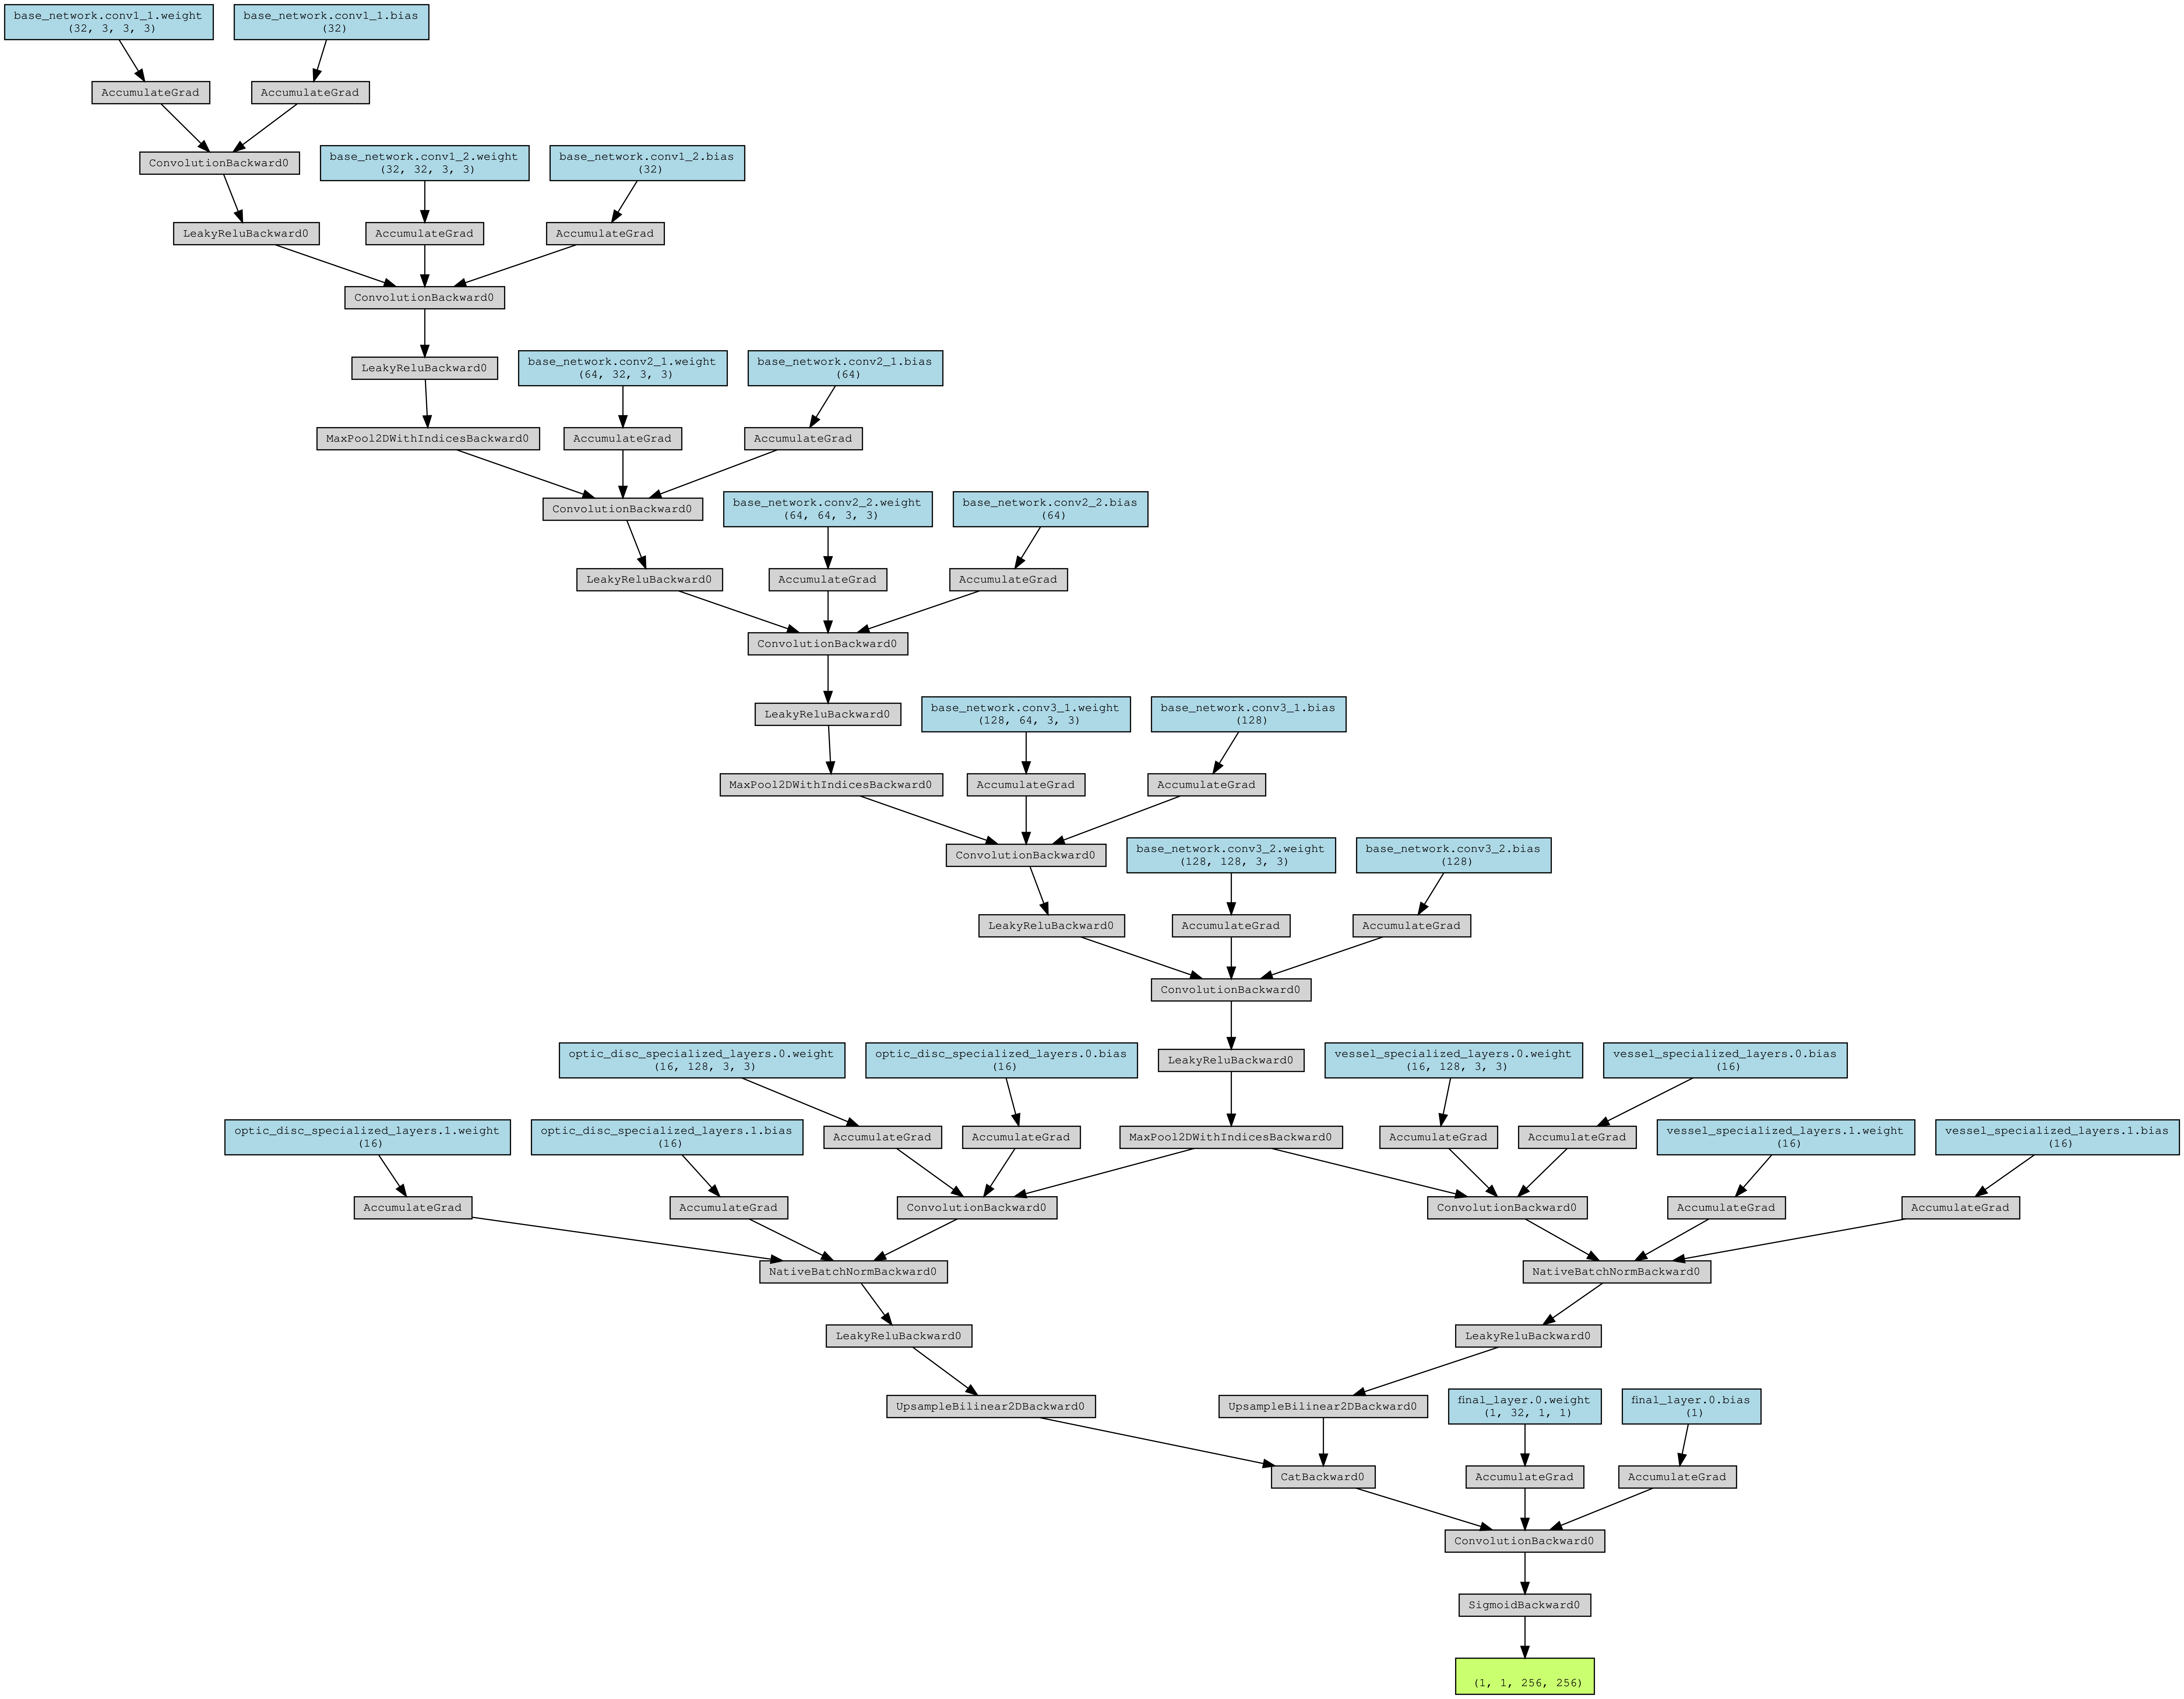

In [23]:
from torchviz import make_dot
from IPython.display import Image

# Create an instance of the model
input_size = (256, 256)
model = DRIU(input_size=input_size)

# Dummy input
dummy_input = torch.randn(1, 3, 256, 256)

# Forward pass
output = model(dummy_input)

# Create the graph
dot = make_dot(output, params=dict(model.named_parameters()))

# Make the graph larger and higher resolution
dot.graph_attr.update(size="30,30", dpi="300")  # Size (in inches), DPI (resolution)

# Save and display
dot.render("/kaggle/working/DRIU_model_architecture", format="png")
Image("/kaggle/working/DRIU_model_architecture.png")

**11.1 Testing the Model: to check whether the model executed successfully or not by using a sample image**

In [24]:
# Apply Weight Initialization
input_size = (256, 256)  # Example input size
model = DRIU(input_size)
model.apply(weights_init)  # Initialize weights

# Test the Model with a Random Input
dummy_input = torch.randn(1, 3, 256, 256)  # Batch size = 1, 3 color channels, 256x256 image
output = model(dummy_input)

# Output Details
print(f"Output shape: {output.shape}")  # Should be (1, 1, 256, 256)
print(f"Output min: {output.min().item()}, max: {output.max().item()}")

Output shape: torch.Size([1, 1, 256, 256])
Output min: 0.1481824368238449, max: 0.8774547576904297


# 12. Finally execute the main model (VGA_Net) for the vessel segmentation.
**Before executing the base model, we need to run some modules as a part of this model, such as:**

**1. Dropblock Method:**
DropBlock is a regularization technique similar to dropout, but instead of randomly dropping individual neurons, it drops contiguous regions (blocks) in the feature map. This encourages the network to learn more robust and spatially invariant features, improving generalization.

**2. Hierarchical Dilated Convolution (HDC) Module:**
The HDC module employs dilated convolutions to capture a wider receptive field without increasing the number of parameters. The hierarchical nature means that it progressively applies dilated convolutions at different rates, enabling the model to capture multi-scale contextual information. This is particularly useful in segmentation tasks where both local and global features are important.

**3. Attentional BConvLSTM Feature Fusion Module (AB-FFM):**
The AB-FFM module combines the strengths of Bidirectional Convolutional LSTM (BConvLSTM) and attention mechanisms. BConvLSTM captures spatial-temporal dependencies in sequences, while the attention mechanism helps focus on the most relevant features. This module fuses features from different layers, enhancing the representation by emphasizing important information for segmentation.

**4. Graph Attention Module (GAT):** Captures relationships between features in a graph structure for better contextual understanding.

**12.1: Execute Hierarchical Dilated Convolution (HDC) Module; also try to use an example to print an example output summary of this module by using the Final Network class.**

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim

class HDCModule(nn.Module):
    def __init__(self):
        super().__init__()
        # Two paths with different dilation rates
        self.path1 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=2, dilation=2),  # Adjusted padding
            nn.ReLU(),
        )

        self.path2 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=4, dilation=4),  # Adjusted padding
            nn.ReLU(),
        )

        # Concatenation of two paths
        self.concat = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=1, stride=1, padding=0)

    def forward(self, x):
        # Passing through two paths
        path1_out = self.path1(x)
        path2_out = self.path2(x)

        # Concatenating two paths
        features = torch.cat((path1_out, path2_out), dim=1)
        features = self.concat(features)

        return features


class FinalNetwork(nn.Module):
    def __init__(self, input_size=256):
        super(FinalNetwork, self).__init__()
        # Convolutional feature extraction
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        
        self.pool = nn.MaxPool2d(2, 2)  # Pooling before HDC
        self.hdc = HDCModule()  # Include HDCModule

        # Adaptive pooling to ensure correct input size for FC layer
        self.global_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(128, 1)  # Adjusted to take pooled 128-channel features
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        
        x = self.pool(x)  # Pool before HDC
        x = self.hdc(x)  # Pass through HDCModule
        
        x = self.global_pool(x)  # Adaptive pooling to make input 1x1
        x = x.view(x.size(0), -1)  # Flatten
        x = self.sigmoid(self.fc(x))

        return x


# Define the model, loss function, and optimizer
model = FinalNetwork()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Print the model summary
print(model)

FinalNetwork(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (hdc): HDCModule(
    (path1): Sequential(
      (0): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2), dilation=(2, 2))
      (3): ReLU()
    )
    (path2): Sequential(
      (0): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(4, 4), dilation=(4, 4))
      (3): ReLU()
    )
    (concat): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))
  )
  (global_pool): AdaptiveAvgPool2d(output_size=1)
  (fc): Linear(in_features=128, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [26]:
from torchsummary import summary

# Print a text-based summary instead
summary(model, (3, 256, 256), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 256, 256]           1,792
              ReLU-2         [-1, 64, 256, 256]               0
            Conv2d-3        [-1, 128, 256, 256]          73,856
              ReLU-4        [-1, 128, 256, 256]               0
         MaxPool2d-5        [-1, 128, 128, 128]               0
            Conv2d-6         [-1, 64, 128, 128]          73,792
              ReLU-7         [-1, 64, 128, 128]               0
            Conv2d-8         [-1, 64, 128, 128]          36,928
              ReLU-9         [-1, 64, 128, 128]               0
           Conv2d-10         [-1, 64, 128, 128]          73,792
             ReLU-11         [-1, 64, 128, 128]               0
           Conv2d-12         [-1, 64, 128, 128]          36,928
             ReLU-13         [-1, 64, 128, 128]               0
           Conv2d-14        [-1, 128, 1

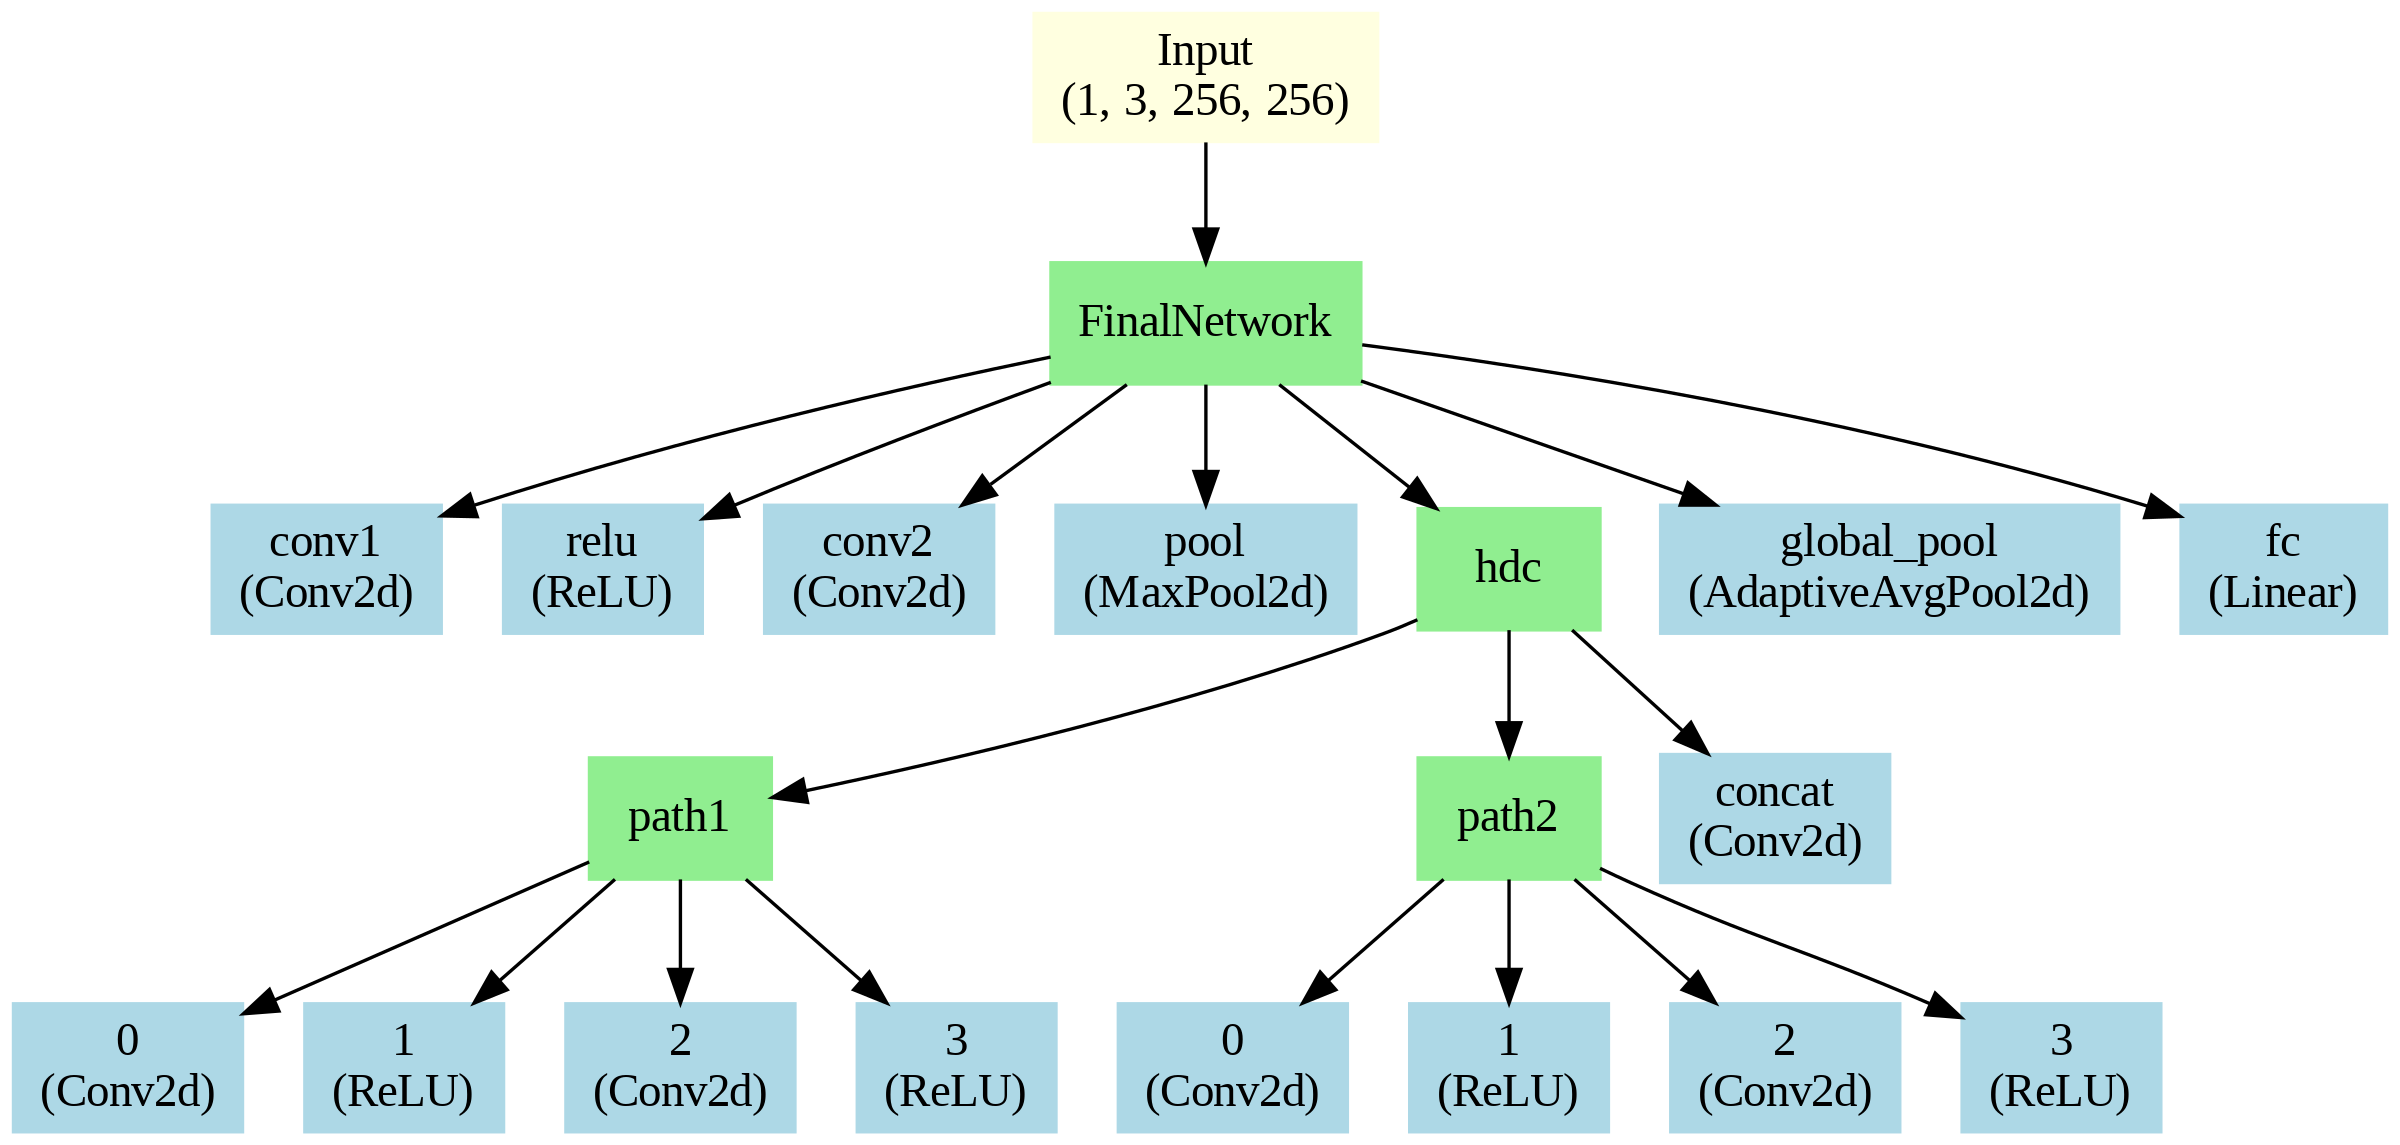

In [27]:
import torch
import torch.nn as nn
from graphviz import Digraph
from IPython.display import Image

# Instantiate the model
model = FinalNetwork()

def create_simplified_model_graph(model, input_size=(1, 3, 256, 256)):
    # Create a new graph
    graph = Digraph(format='png')
    graph.attr(rankdir='TB', size="8,8", dpi="300")
    graph.attr('node', shape='box', style='filled', color='lightblue')
    
    # Track layers already added
    added_modules = set()
    
    # Create a simplified representation
    def add_nodes(module, parent_name=''):
        for name, child in module.named_children():
            if len(list(child.children())) == 0:  # It's a leaf module
                full_name = f"{parent_name}.{name}" if parent_name else name
                if isinstance(child, (nn.Conv2d, nn.Linear, nn.BatchNorm2d, nn.ReLU, 
                                     nn.MaxPool2d, nn.AdaptiveAvgPool2d)):
                    module_type = child.__class__.__name__
                    if full_name not in added_modules:
                        graph.node(full_name, label=f"{name}\n({module_type})")
                        added_modules.add(full_name)
                    
                    # Connect to parent
                    if parent_name and parent_name in added_modules:
                        graph.edge(parent_name, full_name)
            else:
                # For container modules like Sequential
                full_name = f"{parent_name}.{name}" if parent_name else name
                graph.node(full_name, label=name, color='lightgreen')
                added_modules.add(full_name)
                
                # Connect to parent
                if parent_name and parent_name in added_modules:
                    graph.edge(parent_name, full_name)
                
                # Recurse into children
                add_nodes(child, full_name)
    
    # Start with input node
    graph.node('input', label=f'Input\n{input_size}', color='lightyellow')
    added_modules.add('input')
    
    # Add model name as root
    model_name = model.__class__.__name__
    graph.node(model_name, label=model_name, color='lightgreen')
    added_modules.add(model_name)
    
    # Connect input to model
    graph.edge('input', model_name)
    
    # Add all modules
    add_nodes(model, model_name)
    
    return graph

# Create the simplified graph
graph = create_simplified_model_graph(model)

# Render the graph
graph_path = "/kaggle/working/very_simplified_architecture"
graph.render(graph_path)
Image(graph_path + ".png")

**12.2.1 An example code to check whether the dropblock method is working or not.**
Let's create a synthetic tensor, pass it through the Dropblock module, and then inspect the output. Since Dropblock is a regularization technique, we won’t see a change in the output during inference mode (when self.training is false). However, during training mode (when self.training is true), we should see some of the feature map’s values being set to zero based on the drop_prob.

**12.3 GCN(Graph Convulutional Netowrk)** for Graph Feature Extraction --> Graph/structural-level feature extraction of the images
The GraphFeatureExtraction class is a PyTorch module designed to extract graph-level features from a graph-based structure. It combines a Graph Convolutional Network (GCN) layer for feature extraction with a dropout layer to prevent overfitting. The module is intended for graph-based learning tasks where nodes in the graph have features, and the graph's structure is defined by an adjacency matrix.

The GCN class defines a graph neural network using the GATConv layers. It implements a Graph Convolutional Network (GCN) using Graph Attention (GAT) layers, which apply attention-based mechanisms to compute node feature updates. The adjacency matrix (adj) defines graph connectivity, and the model applies attention scores, residual connections, and layer normalization. 

Graph saved to /kaggle/working/graph_feature_extraction_diagram.png


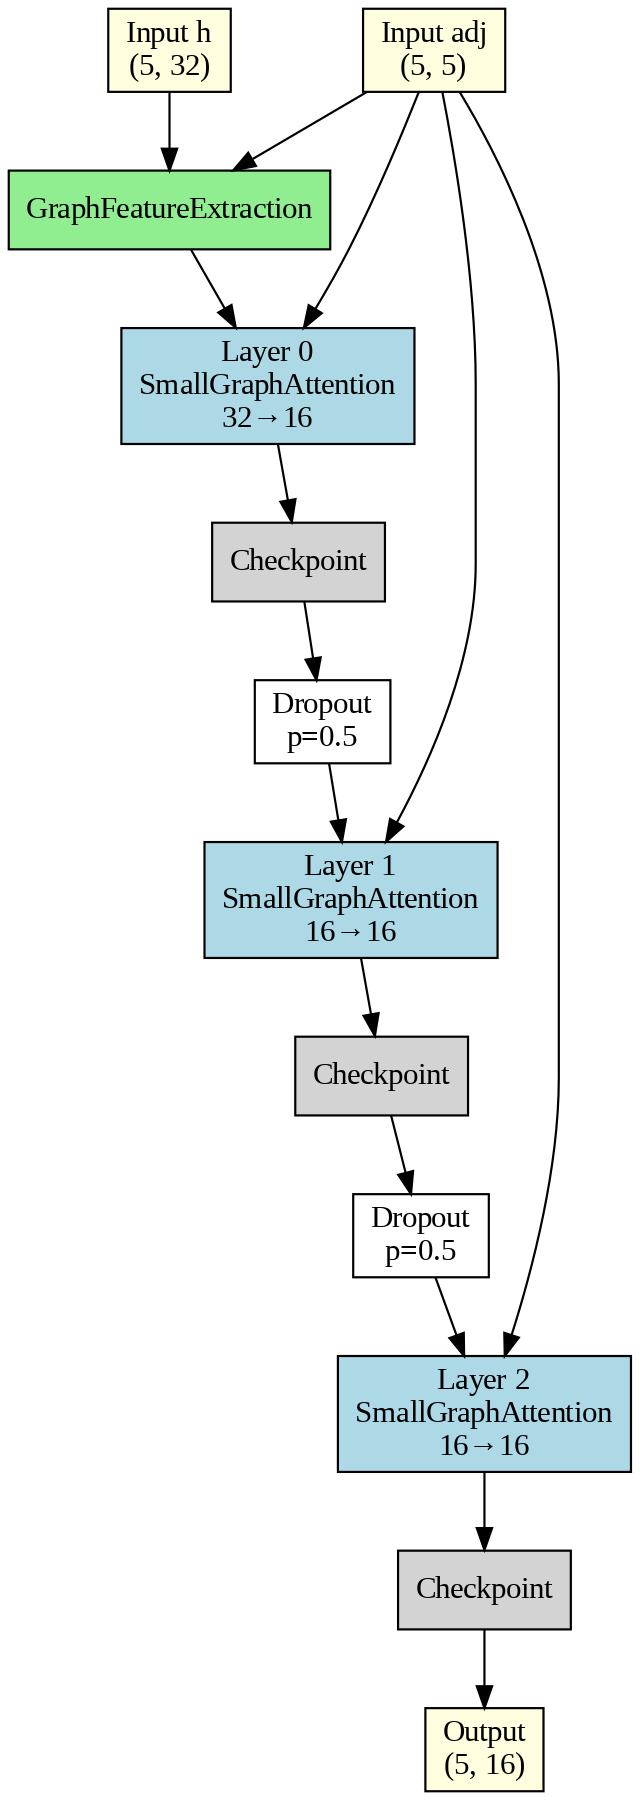

In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from graphviz import Digraph
import os

# Define the SmallGraphAttention class
class SmallGraphAttention(nn.Module):
    def __init__(self, in_features, out_features, dropout=0.5):
        super().__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.W = nn.Parameter(torch.zeros(size=(in_features, out_features)))
        nn.init.xavier_uniform_(self.W.data, gain=1.414)
        self.att = nn.Parameter(torch.zeros(size=(out_features, 1)))
        nn.init.xavier_uniform_(self.att.data, gain=1.414)
        self.dropout = nn.Dropout(dropout)
        self.activation = nn.ELU()
    
    def forward(self, h, adj):
        Wh = torch.matmul(h, self.W)
        att = torch.matmul(Wh, self.att).squeeze(-1)
        att = F.softmax(att, dim=1).unsqueeze(-1)
        masked_att = att * adj.sum(dim=-1, keepdim=True).clamp(0, 1)
        h_prime = Wh * masked_att
        return self.activation(h_prime)

# Define the GraphFeatureExtraction class
class GraphFeatureExtraction(nn.Module):
    def __init__(self, dropout_rate, feature_dim, num_heads, num_layers, in_features=32):
        super().__init__()
        self.dropout_rate = dropout_rate
        self.feature_dim = feature_dim
        self.num_heads = num_heads
        self.num_layers = num_layers
        self.layers = nn.ModuleList()
        self.layers.append(SmallGraphAttention(in_features, feature_dim, dropout_rate))
        for _ in range(1, num_layers):
            self.layers.append(SmallGraphAttention(feature_dim, feature_dim, dropout_rate))
        self.dropout = nn.Dropout(dropout_rate)

# Instantiate the model with 3 layers to match the diagram
model = GraphFeatureExtraction(
    dropout_rate=0.5,
    feature_dim=16,  # Matches the 16 output features in the diagram
    num_heads=4,
    num_layers=3,    # Matches the 3 layers in the diagram
    in_features=32   # Matches the 32 input features in the diagram
)

def create_model_graph(model, input_h_shape=(5, 32), input_adj_shape=(5, 5), output_shape=(5, 16)):
    # Create a new graph
    graph = Digraph(format='png')
    graph.attr(rankdir='TB', size="6,6", dpi="300")
    
    # Define styles
    graph.attr('node', shape='box', style='filled')
    
    # Input nodes
    graph.node('input_h', label=f'Input h\n{input_h_shape}', fillcolor='lightyellow')
    graph.node('input_adj', label=f'Input adj\n{input_adj_shape}', fillcolor='lightyellow')
    
    # GraphFeatureExtraction (root)
    graph.node('gfe', label='GraphFeatureExtraction', fillcolor='lightgreen')
    
    # Connect inputs to GraphFeatureExtraction
    graph.edge('input_h', 'gfe')
    graph.edge('input_adj', 'gfe')
    
    # Track previous node for sequential connections
    prev_node = 'gfe'
    
    # Add SmallGraphAttention layers, Dropout, and Checkpoint
    for i in range(model.num_layers):
        # SmallGraphAttention layer
        in_features = 32 if i == 0 else model.feature_dim
        out_features = model.feature_dim
        layer_name = f'layer_{i}'
        graph.node(layer_name, label=f'Layer {i}\nSmallGraphAttention\n{in_features}→{out_features}', fillcolor='lightblue')
        graph.edge(prev_node, layer_name)
        
        # Checkpoint
        checkpoint_name = f'checkpoint_{i}'
        graph.node(checkpoint_name, label='Checkpoint', fillcolor='lightgray')
        graph.edge(layer_name, checkpoint_name)
        
        # Dropout (skip for the last layer)
        if i < model.num_layers - 1:
            dropout_name = f'dropout_{i}'
            graph.node(dropout_name, label='Dropout\np=0.5', fillcolor='white')
            graph.edge(checkpoint_name, dropout_name)
            prev_node = dropout_name
        else:
            prev_node = checkpoint_name
        
        # Connect adj to each SmallGraphAttention layer
        graph.edge('input_adj', layer_name)
    
    # Output node
    graph.node('output', label=f'Output\n{output_shape}', fillcolor='lightyellow')
    graph.edge(prev_node, 'output')
    
    return graph

# Create the graph
graph = create_model_graph(model)

# Define output path for Kaggle
output_dir = "/kaggle/working"
graph_path = os.path.join(output_dir, "graph_feature_extraction_diagram")

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Render the graph
try:
    graph.render(graph_path, cleanup=True)
    print(f"Graph saved to {graph_path}.png")
except Exception as e:
    print(f"Error rendering graph: {e}")
    print("Ensure Graphviz is installed. In Kaggle, it should be pre-installed.")
    print("If not, try running: !pip install graphviz")
    raise

# Display the image (if in Jupyter/Kaggle notebook)
try:
    from IPython.display import Image
    display(Image(f"{graph_path}.png"))
except Exception as e:
    print(f"Could not display image: {e}")
    print(f"Graph saved to {graph_path}.png. Please check the file manually or download it from /kaggle/working.")

**12.4: Execute Attentional BConvLSTM Feature Fusion Module (AB-FFM)**

The AB_FFMModule class is the main module that uses BConvLSTM for processing input data and DualAttentionModule for applying attention mechanisms. The BConvLSTM class defines a bidirectional ConvLSTM layer, and the DualAttentionModule uses both PixelAttentionModule and ChannelAttentionModule to compute pixel-wise and channel-wise attention weights, respectively.

Textual Structure of Models:

AB_FFMModule:
AB_FFMModule(
  (convlstm): ConvLSTM(
    (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (gate): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))
  )
  (attention): AttentionModule(
    (attention): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))
    (pool): AdaptiveAvgPool2d(output_size=1)
  )
)

ConvLSTM:
ConvLSTM(
  (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (gate): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))
)

AttentionModule:
AttentionModule(
  (attention): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1))
  (pool): AdaptiveAvgPool2d(output_size=1)
)

Graph saved to /kaggle/working/ab_ffm_diagram.png


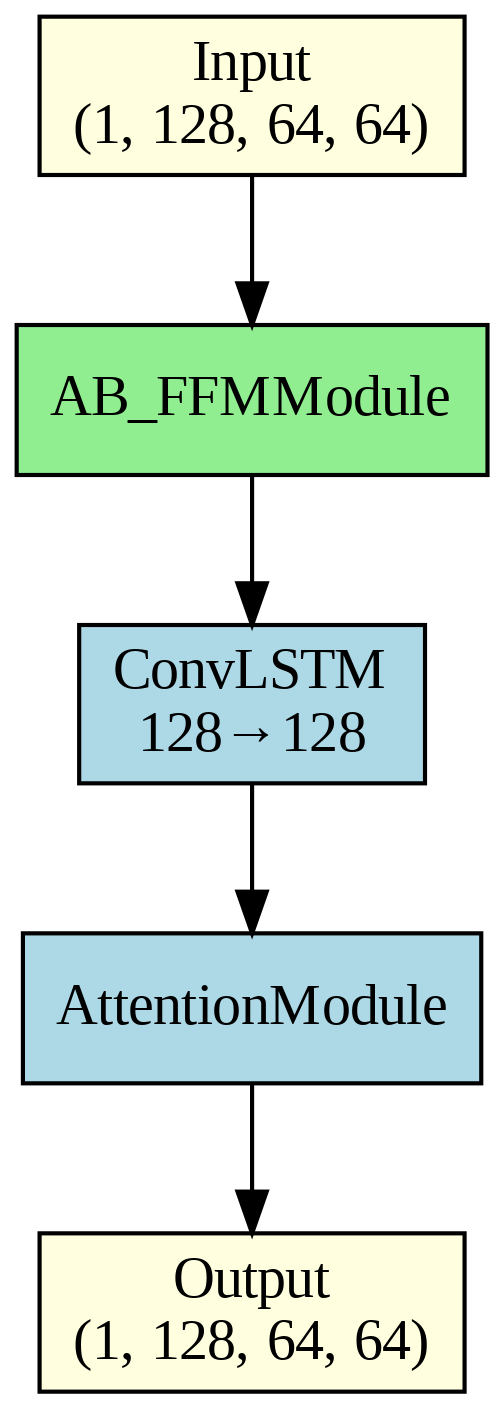

In [29]:
import torch
import torch.nn as nn
from graphviz import Digraph
import os
from IPython.display import Image

# Define the ConvLSTM class
class ConvLSTM(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, padding):
        super().__init__()
        self.conv = nn.Conv2d(
            in_channels=in_channels,
            out_channels=out_channels,
            kernel_size=kernel_size,
            stride=stride,
            padding=padding
        )
        self.gate = nn.Conv2d(
            in_channels=out_channels,
            out_channels=out_channels,
            kernel_size=1
        )

    def forward(self, x):
        conv_out = self.conv(x)
        gate = torch.sigmoid(self.gate(conv_out))
        output = conv_out * gate
        return output, None

# Define the AttentionModule class
class AttentionModule(nn.Module):
    def __init__(self, channels):
        super().__init__()
        self.attention = nn.Conv2d(
            in_channels=channels,
            out_channels=channels,
            kernel_size=1,
            stride=1,
            padding=0
        )
        self.pool = nn.AdaptiveAvgPool2d(1)

    def forward(self, x):
        attn_weights = self.pool(self.attention(x))
        attn_weights = torch.sigmoid(attn_weights)
        return x * attn_weights

# Define the AB_FFMModule class
class AB_FFMModule(nn.Module):
    def __init__(self, in_channels=128, out_channels=128):
        super().__init__()
        self.convlstm = ConvLSTM(
            in_channels=in_channels,
            out_channels=out_channels,
            kernel_size=3,
            stride=1,
            padding=1
        )
        self.attention = AttentionModule(channels=out_channels)

    def forward(self, x):
        features, _ = self.convlstm(x)
        features = self.attention(features)
        return features

# Method 1: Print textual structure
print("Textual Structure of Models:")
print("\nAB_FFMModule:")
model = AB_FFMModule(in_channels=128, out_channels=128)
print(model)

print("\nConvLSTM:")
convlstm_model = ConvLSTM(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1)
print(convlstm_model)

print("\nAttentionModule:")
attention_model = AttentionModule(channels=128)
print(attention_model)

# Method 2: Create a visual diagram using Graphviz
def create_model_graph(model, input_shape=(1, 128, 64, 64), output_shape=(1, 128, 64, 64)):
    graph = Digraph(format='png')
    graph.attr(rankdir='TB', size="6,6", dpi="300")
    graph.attr('node', shape='box', style='filled')
    
    # Input node
    graph.node('input', label=f'Input\n{input_shape}', fillcolor='lightyellow')
    
    # AB_FFMModule (root)
    graph.node('ab_ffm', label='AB_FFMModule', fillcolor='lightgreen')
    graph.edge('input', 'ab_ffm')
    
    # ConvLSTM
    graph.node('convlstm', label='ConvLSTM\n128→128', fillcolor='lightblue')
    graph.edge('ab_ffm', 'convlstm')
    
    # AttentionModule
    graph.node('attention', label='AttentionModule', fillcolor='lightblue')
    graph.edge('convlstm', 'attention')
    
    # Output node
    graph.node('output', label=f'Output\n{output_shape}', fillcolor='lightyellow')
    graph.edge('attention', 'output')
    
    return graph

# Create and render the graph
graph = create_model_graph(model)

# Define output path for Kaggle
output_dir = "/kaggle/working"
graph_path = os.path.join(output_dir, "ab_ffm_diagram")

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Render the graph
try:
    graph.render(graph_path, cleanup=True)
    print(f"\nGraph saved to {graph_path}.png")
except Exception as e:
    print(f"Error rendering graph: {e}")
    print("Ensure Graphviz is installed. In Kaggle, it should be pre-installed.")
    print("If not, try running: !pip install graphviz")
    raise

# Display the image (if in Kaggle notebook)
try:
    display(Image(f"{graph_path}.png"))
except Exception as e:
    print(f"Could not display image: {e}")
    print(f"Graph saved to {graph_path}.png. Please check the file manually or download it from /kaggle/working.")

Saving Model Structures as Table Images:
Table image saved to /kaggle/working/ab_ffmmodule_structure_table.png
Table image saved to /kaggle/working/convlstm_structure_table.png
Table image saved to /kaggle/working/attentionmodule_structure_table.png

Displaying Table Images:


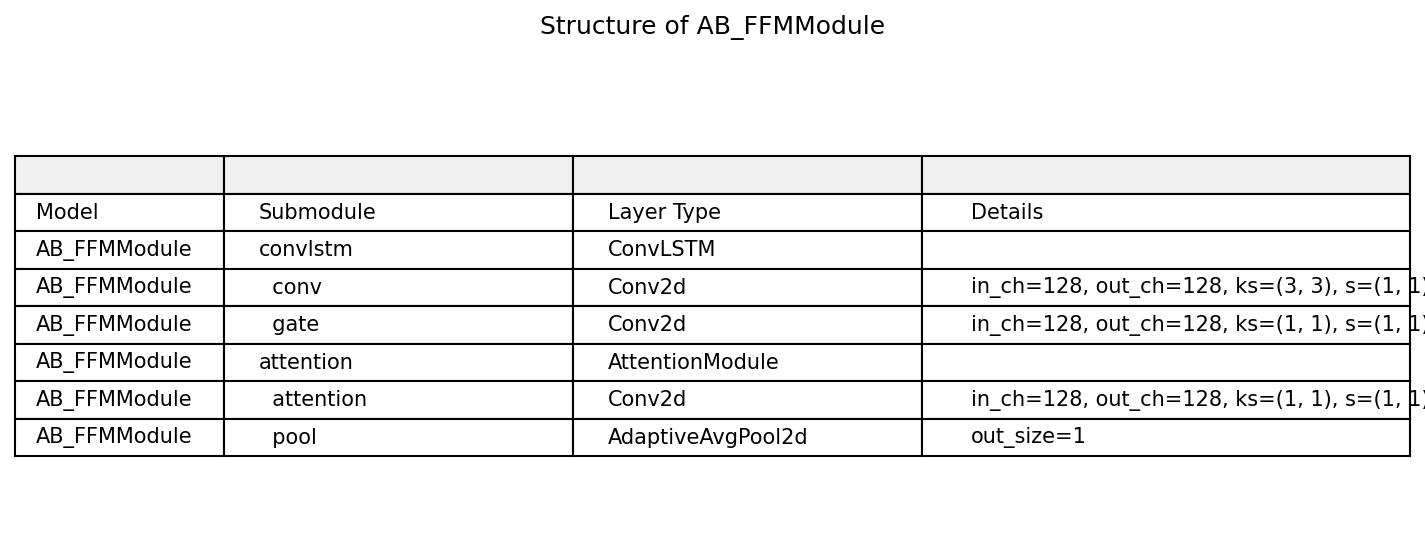

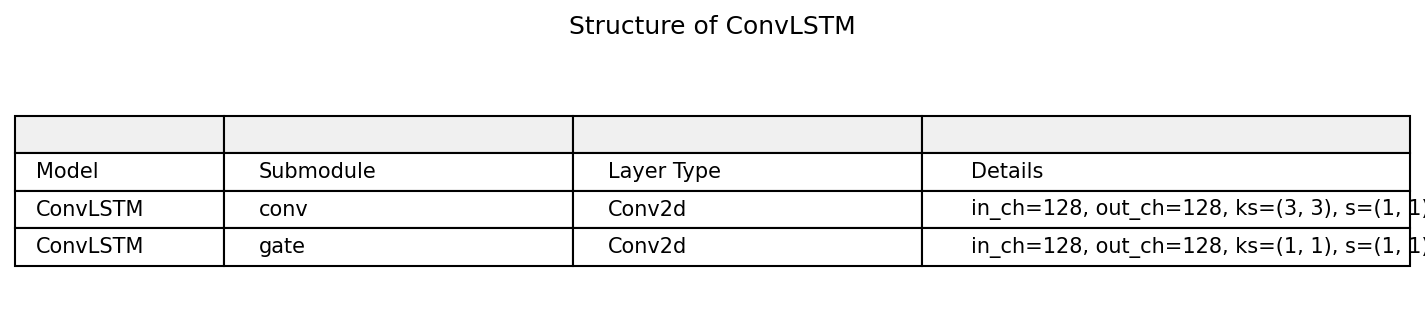

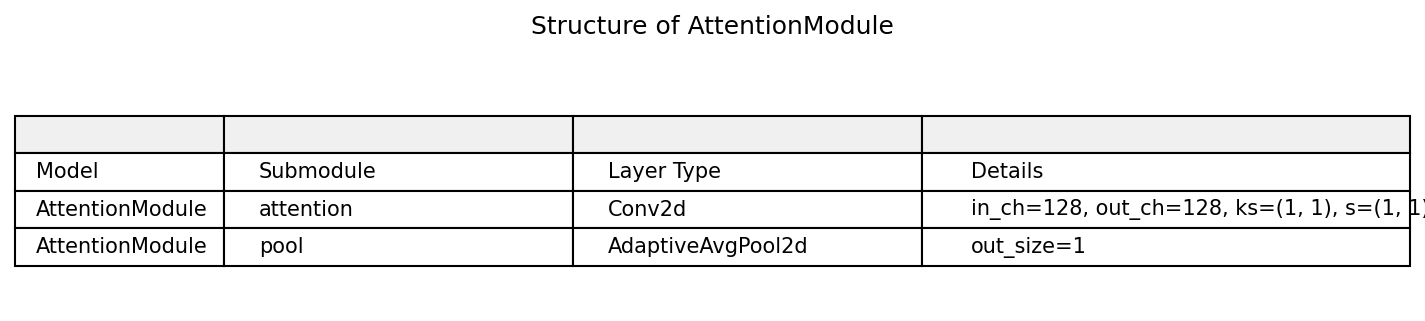

In [30]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib.table as tbl
import os
from IPython.display import Image

# Define the ConvLSTM class
class ConvLSTM(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, padding):
        super().__init__()
        self.conv = nn.Conv2d(
            in_channels=in_channels,
            out_channels=out_channels,
            kernel_size=kernel_size,
            stride=stride,
            padding=padding
        )
        self.gate = nn.Conv2d(
            in_channels=out_channels,
            out_channels=out_channels,
            kernel_size=1
        )

    def forward(self, x):
        conv_out = self.conv(x)
        gate = torch.sigmoid(self.gate(conv_out))
        output = conv_out * gate
        return output, None

# Define the AttentionModule class
class AttentionModule(nn.Module):
    def __init__(self, channels):
        super().__init__()
        self.attention = nn.Conv2d(
            in_channels=channels,
            out_channels=channels,
            kernel_size=1,
            stride=1,
            padding=0
        )
        self.pool = nn.AdaptiveAvgPool2d(1)

    def forward(self, x):
        attn_weights = self.pool(self.attention(x))
        attn_weights = torch.sigmoid(attn_weights)
        return x * attn_weights

# Define the AB_FFMModule class
class AB_FFMModule(nn.Module):
    def __init__(self, in_channels=128, out_channels=128):
        super().__init__()
        self.convlstm = ConvLSTM(
            in_channels=in_channels,
            out_channels=out_channels,
            kernel_size=3,
            stride=1,
            padding=1
        )
        self.attention = AttentionModule(channels=out_channels)

    def forward(self, x):
        features, _ = self.convlstm(x)
        features = self.attention(features)
        return features

# Function to extract module structure and render as a table image
def save_model_structure_table_as_image(model, model_name, output_dir="/kaggle/working"):
    table_data = []
    
    def extract_layers(module, parent_name="", depth=0):
        for name, child in module.named_children():
            indent = "  " * depth
            full_name = f"{indent}{name}"
            layer_type = child.__class__.__name__
            details = ""
            
            if isinstance(child, nn.Conv2d):
                details = (f"in_ch={child.in_channels}, out_ch={child.out_channels}, "
                          f"ks={child.kernel_size}, s={child.stride}, p={child.padding}")
            elif isinstance(child, nn.AdaptiveAvgPool2d):
                details = f"out_size={child.output_size}"
            
            table_data.append([model_name, full_name, layer_type, details])
            extract_layers(child, name, depth + 1)
    
    # Extract all layers
    extract_layers(model)
    
    # Define table headers
    headers = ["Model", "Submodule", "Layer Type", "Details"]
    
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(12, len(table_data) * 0.5 + 1))  # Adjust height based on number of rows
    ax.axis('off')  # Hide axes
    
    # Create the table
    table = tbl.table(
        ax,
        cellText=[headers] + table_data,
        colLabels=None,  # Headers are included in cellText
        loc='center',
        cellLoc='left',
        colColours=['#f0f0f0'] * len(headers),  # Light gray header background
        colWidths=[0.15, 0.25, 0.25, 0.35]  # Adjust column widths
    )
    
    # Style the table
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)  # Scale row height for better readability
    
    # Add a title
    plt.title(f"Structure of {model_name}", fontsize=12, pad=20)
    
    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)
    
    # Save the table as an image
    output_path = os.path.join(output_dir, f"{model_name.lower()}_structure_table.png")
    plt.savefig(output_path, bbox_inches='tight', dpi=150)
    plt.close()
    
    print(f"Table image saved to {output_path}")
    return output_path

# Instantiate and save table images for each model
print("Saving Model Structures as Table Images:")

# AB_FFMModule
model = AB_FFMModule(in_channels=128, out_channels=128)
ab_ffm_path = save_model_structure_table_as_image(model, "AB_FFMModule")

# ConvLSTM
convlstm_model = ConvLSTM(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1)
convlstm_path = save_model_structure_table_as_image(convlstm_model, "ConvLSTM")

# AttentionModule
attention_model = AttentionModule(channels=128)
attention_path = save_model_structure_table_as_image(attention_model, "AttentionModule")

# Display the images in the notebook
print("\nDisplaying Table Images:")
for path in [ab_ffm_path, convlstm_path, attention_path]:
    try:
        display(Image(path))
    except Exception as e:
        print(f"Could not display image {path}: {e}")
        print(f"Please download it from {path}")

**Visualization of these modules **

Visualizing and saving individual modules:

Visualizing and saving AB_FFMModule...
Saved AB_FFMModule graph to /kaggle/working/AB_FFMModule.png


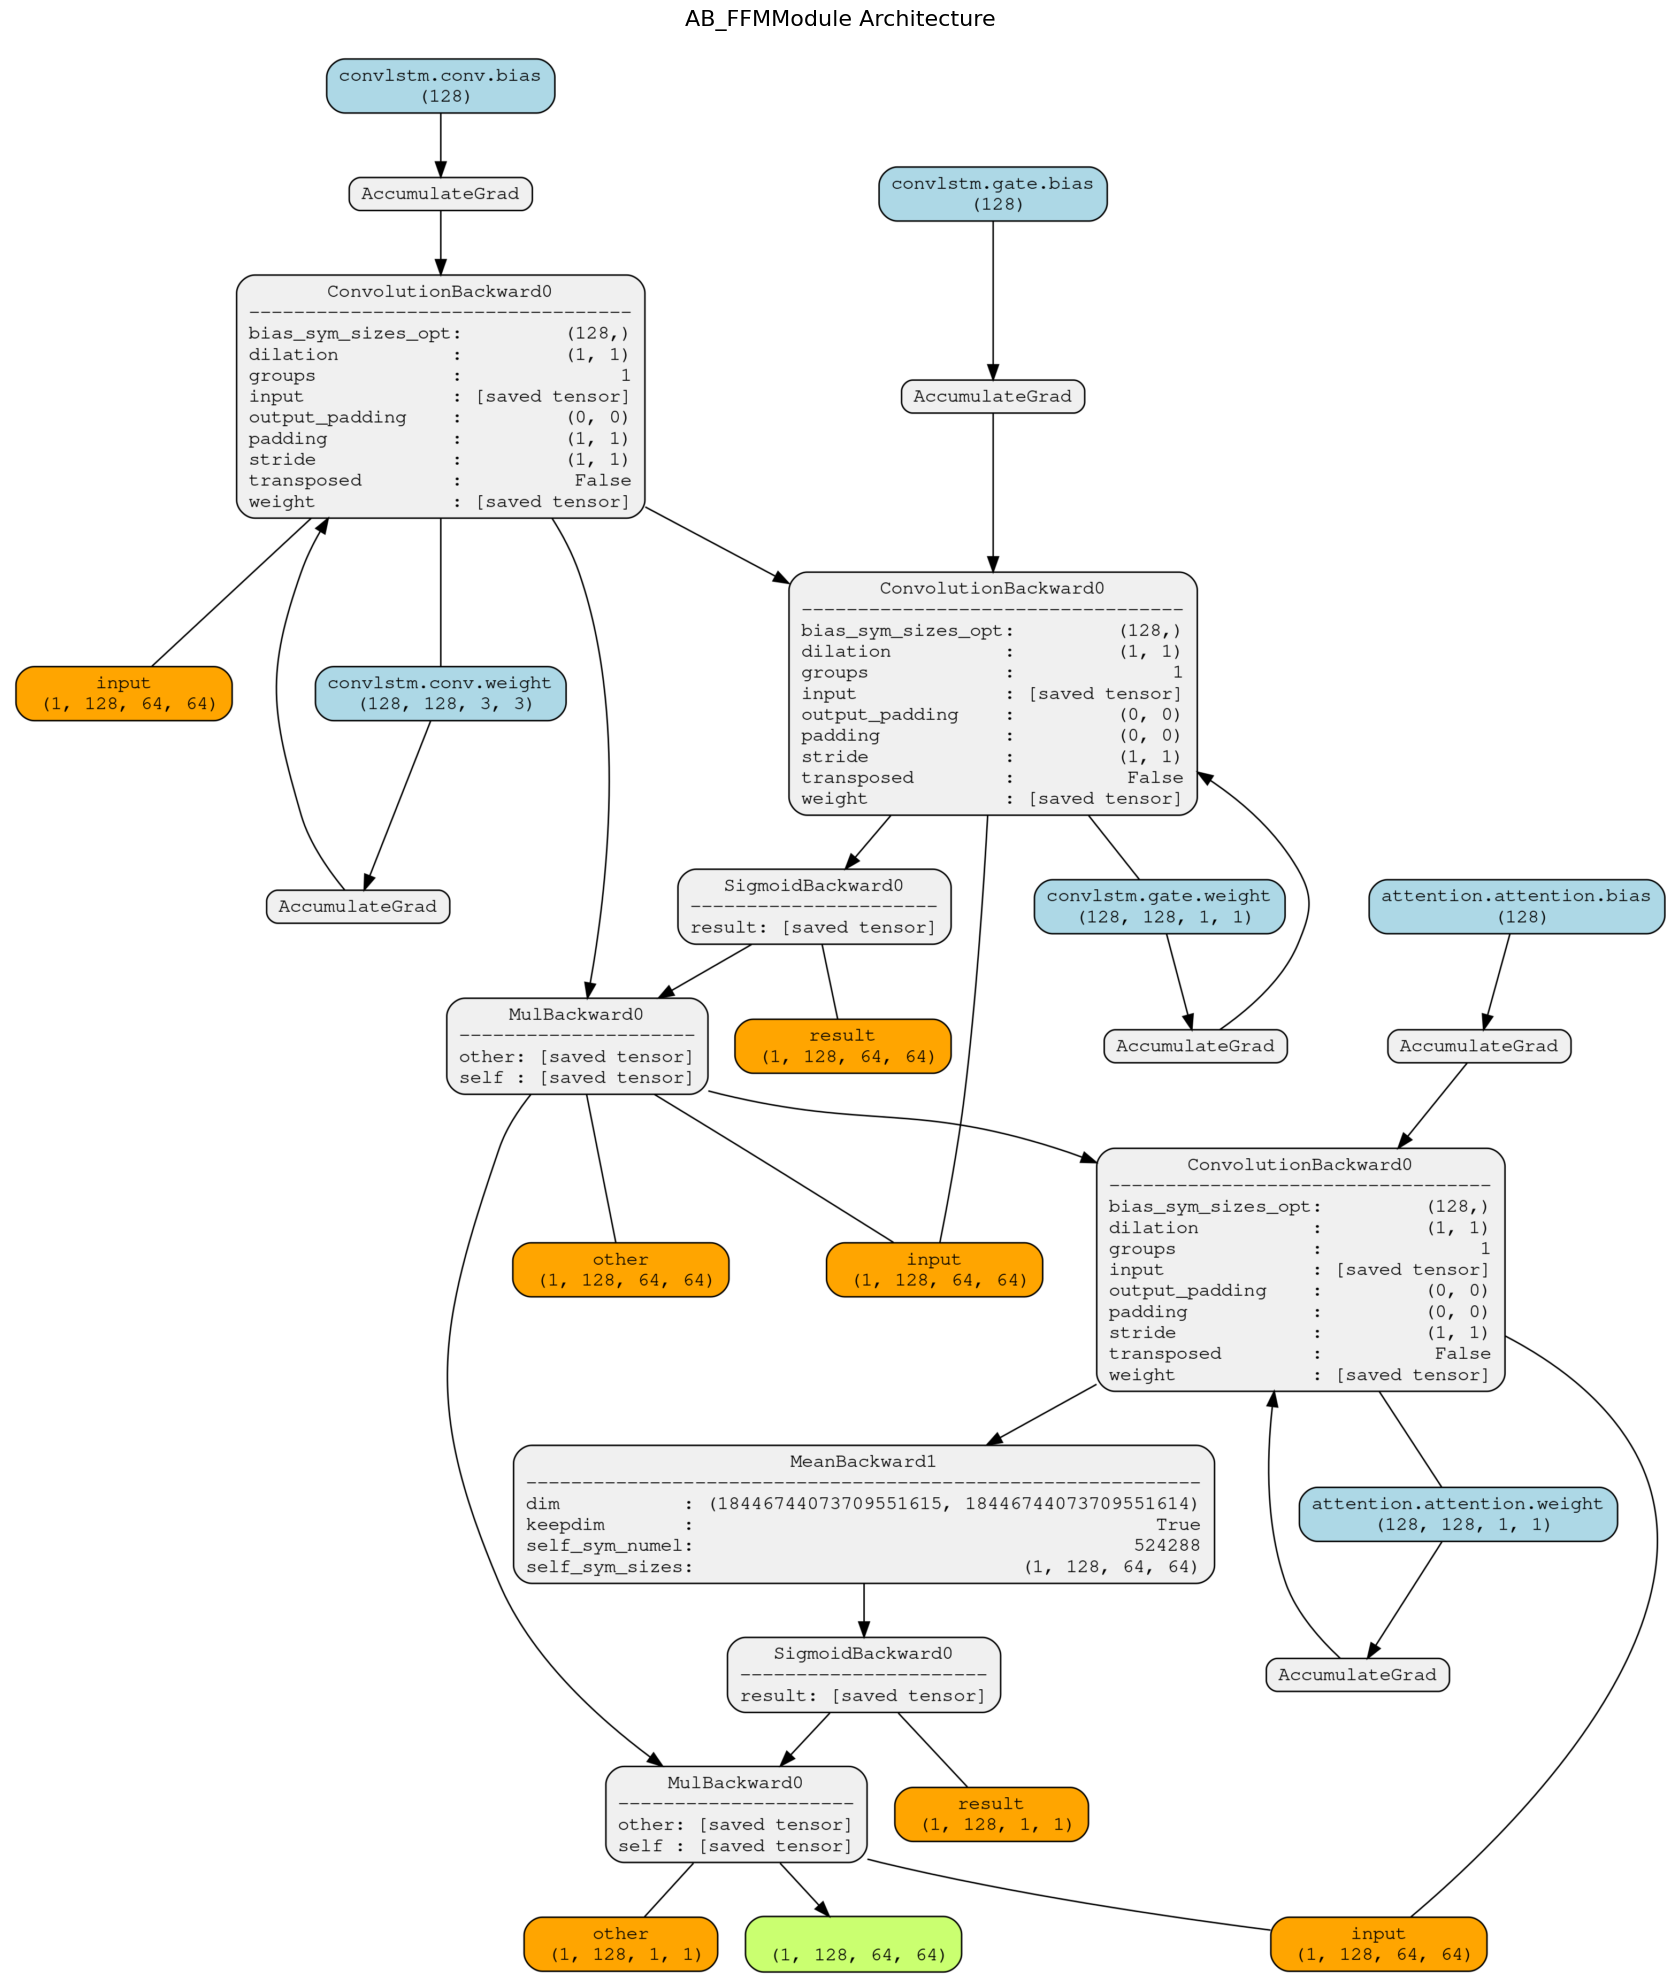


Visualizing and saving ConvLSTM...
Saved ConvLSTM graph to /kaggle/working/ConvLSTM.png


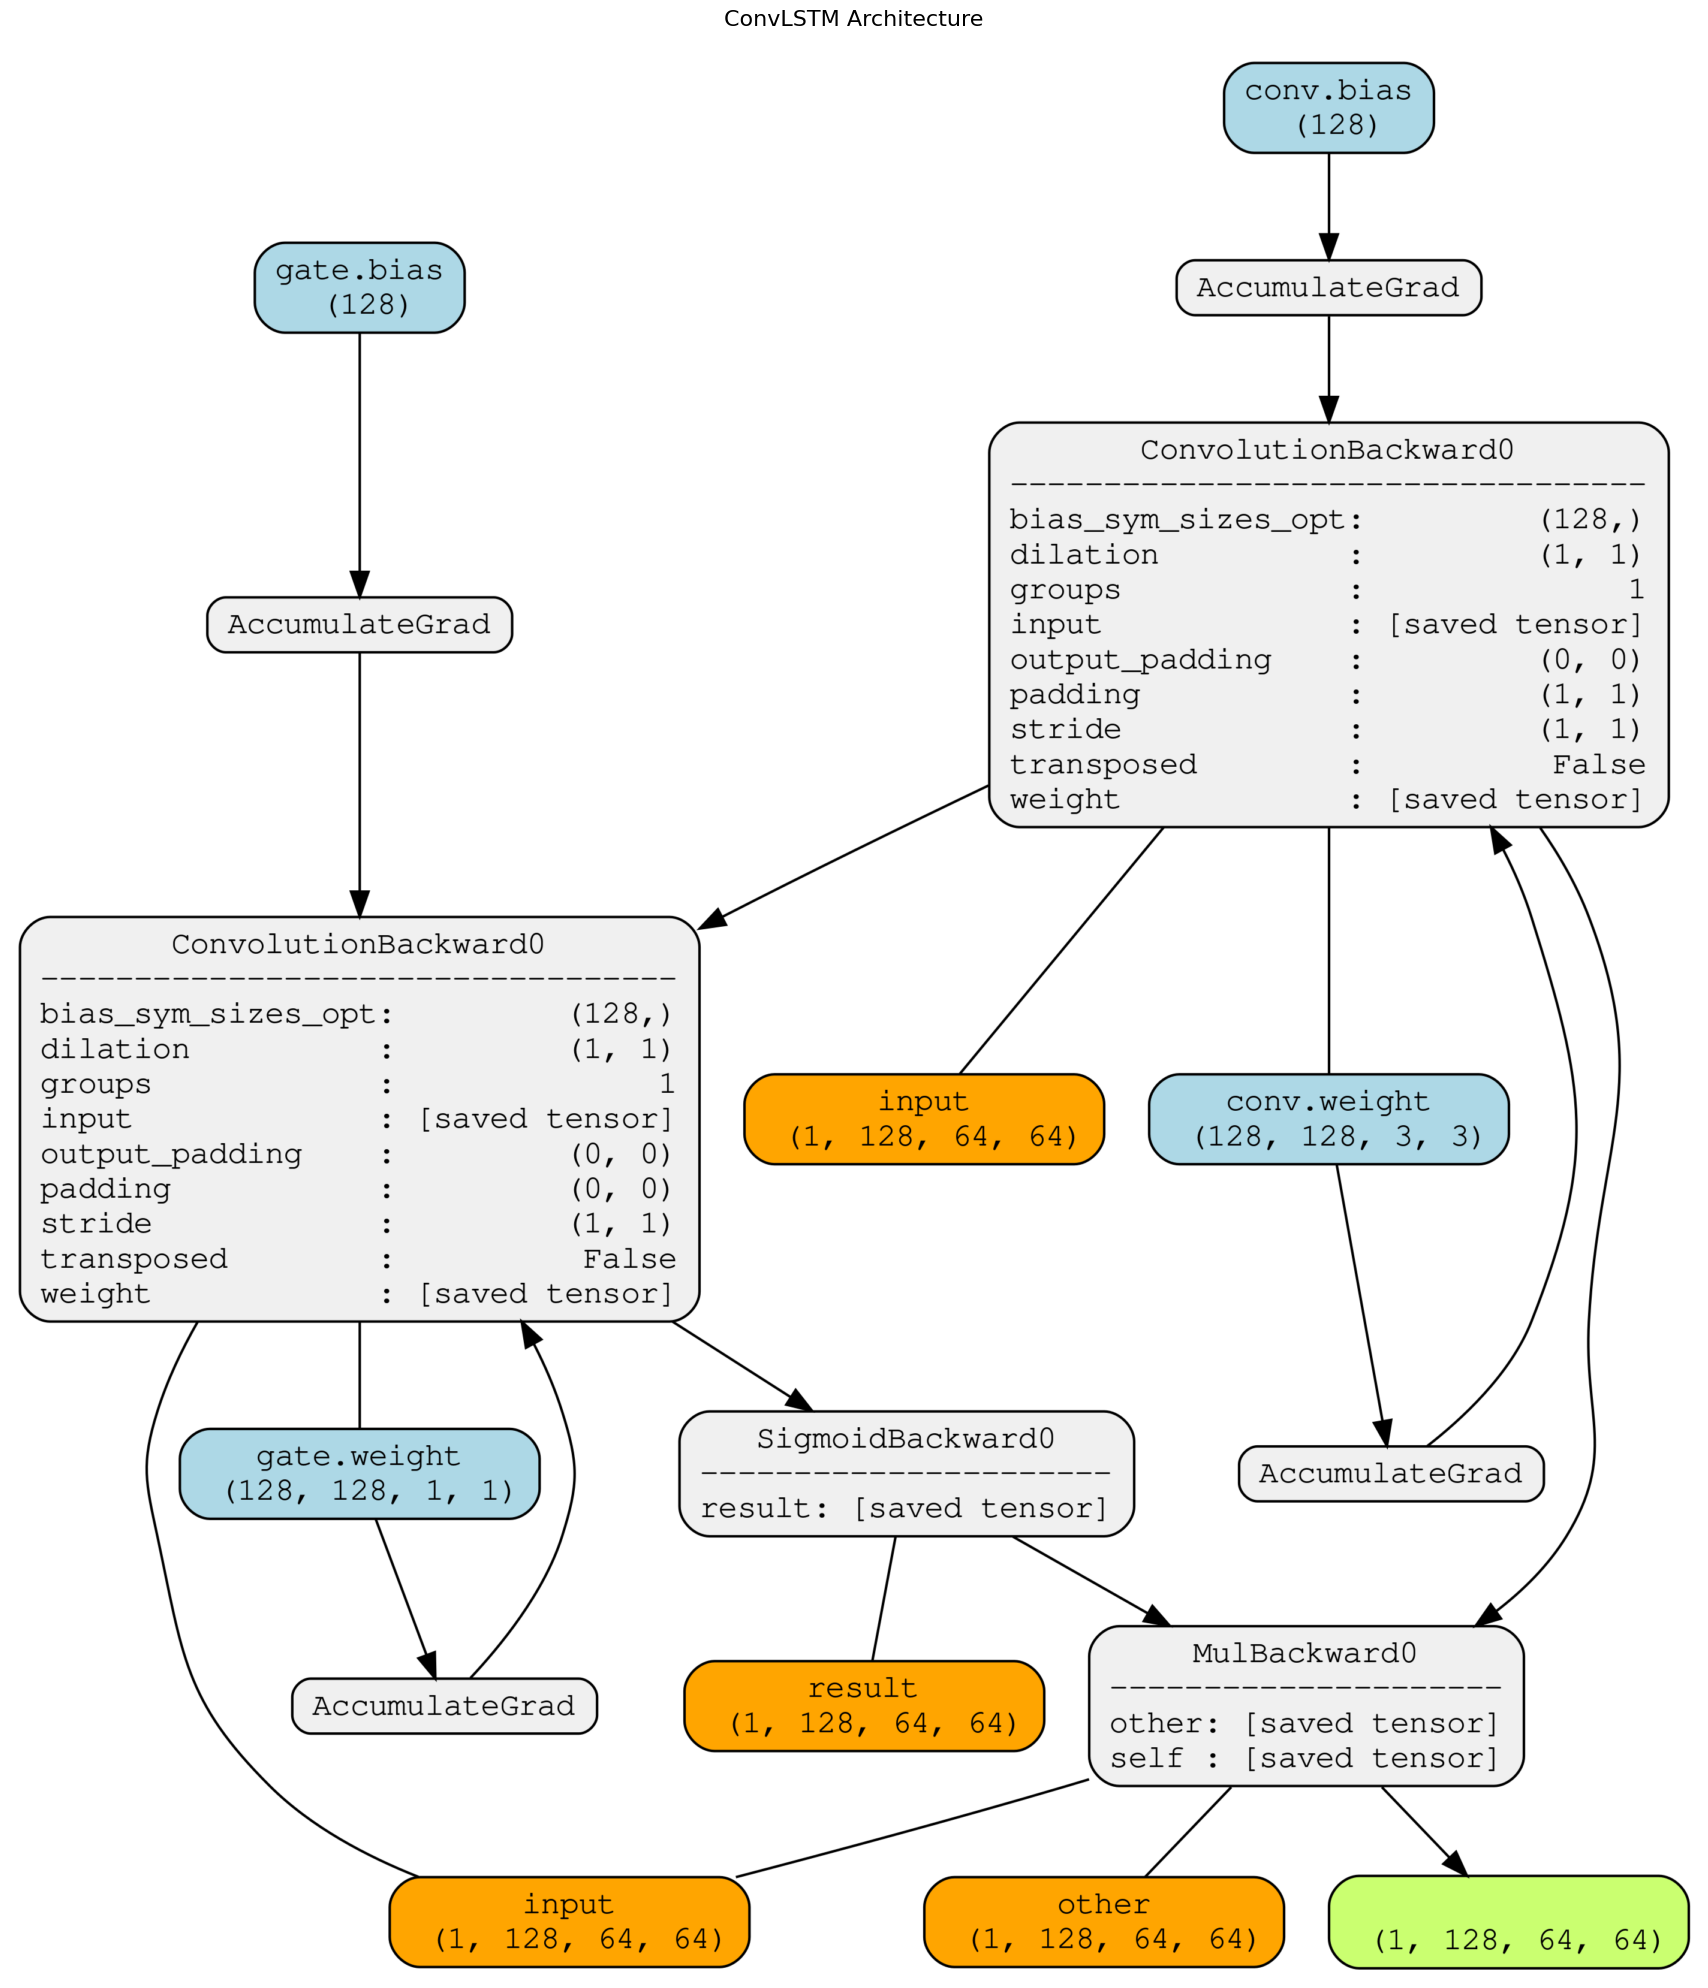


Visualizing and saving AttentionModule...
Saved AttentionModule graph to /kaggle/working/AttentionModule.png


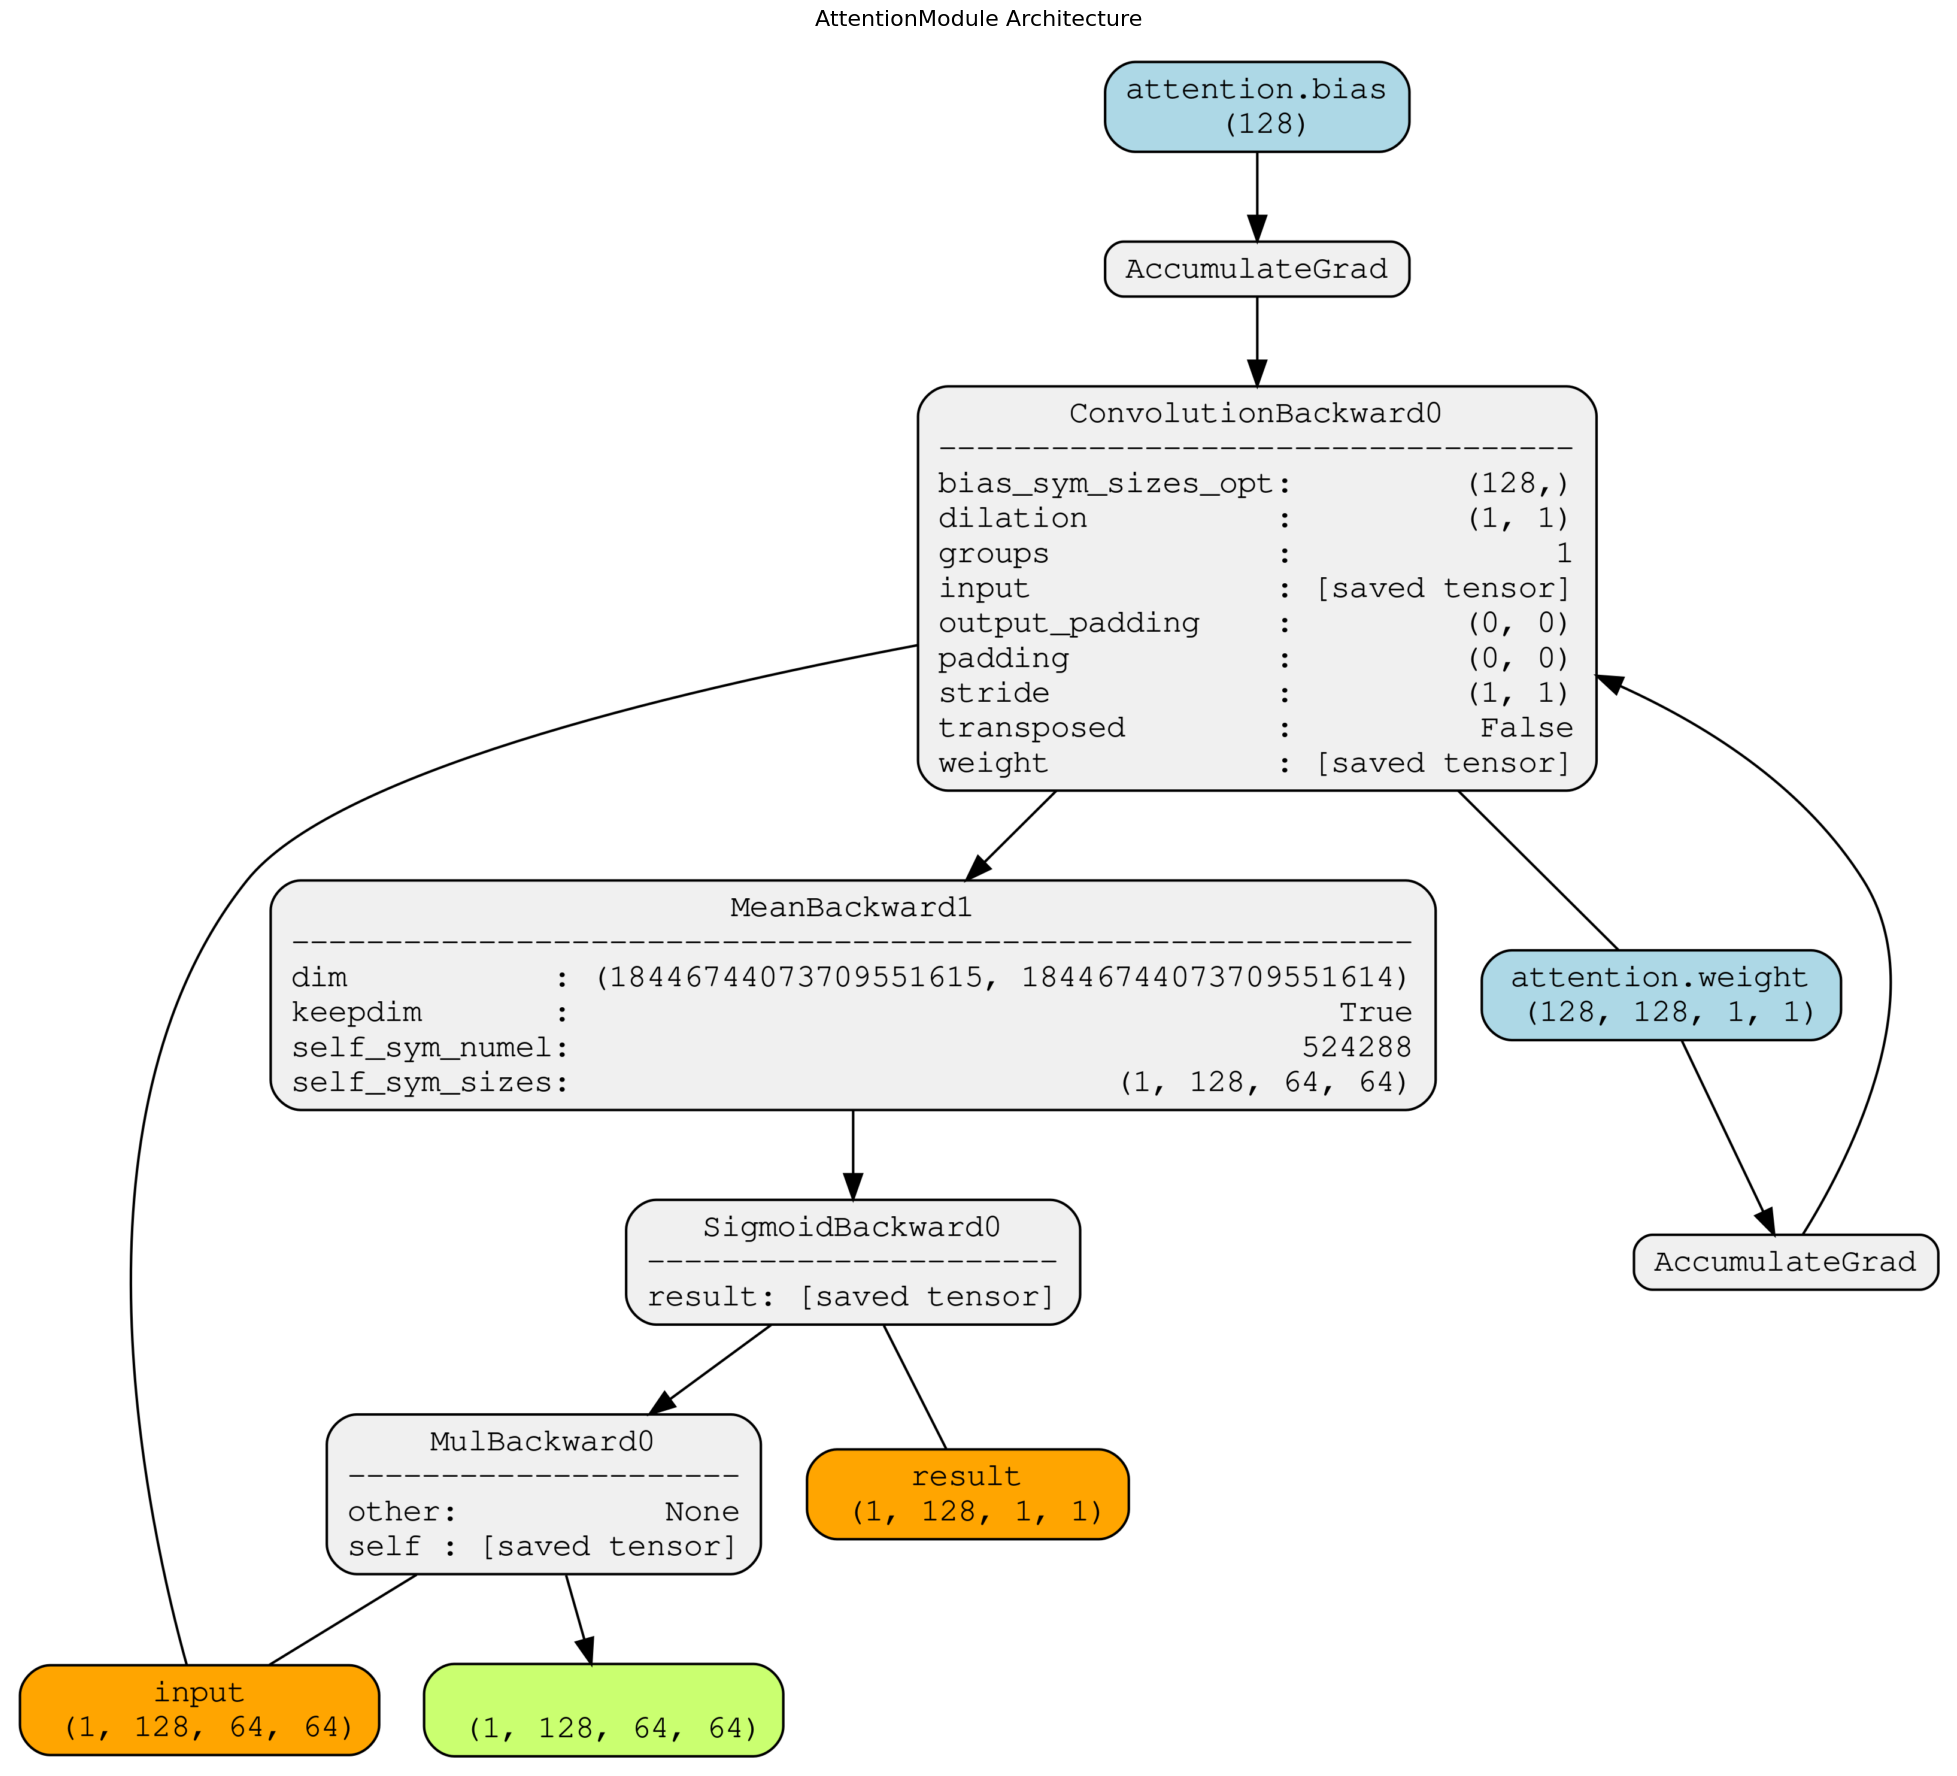


Visualizing and saving complete AB_FFMModule architecture with connections:
Saved AB_FFMModule_Full_Connections graph to /kaggle/working/AB_FFMModule_Full_Connections_combined.png


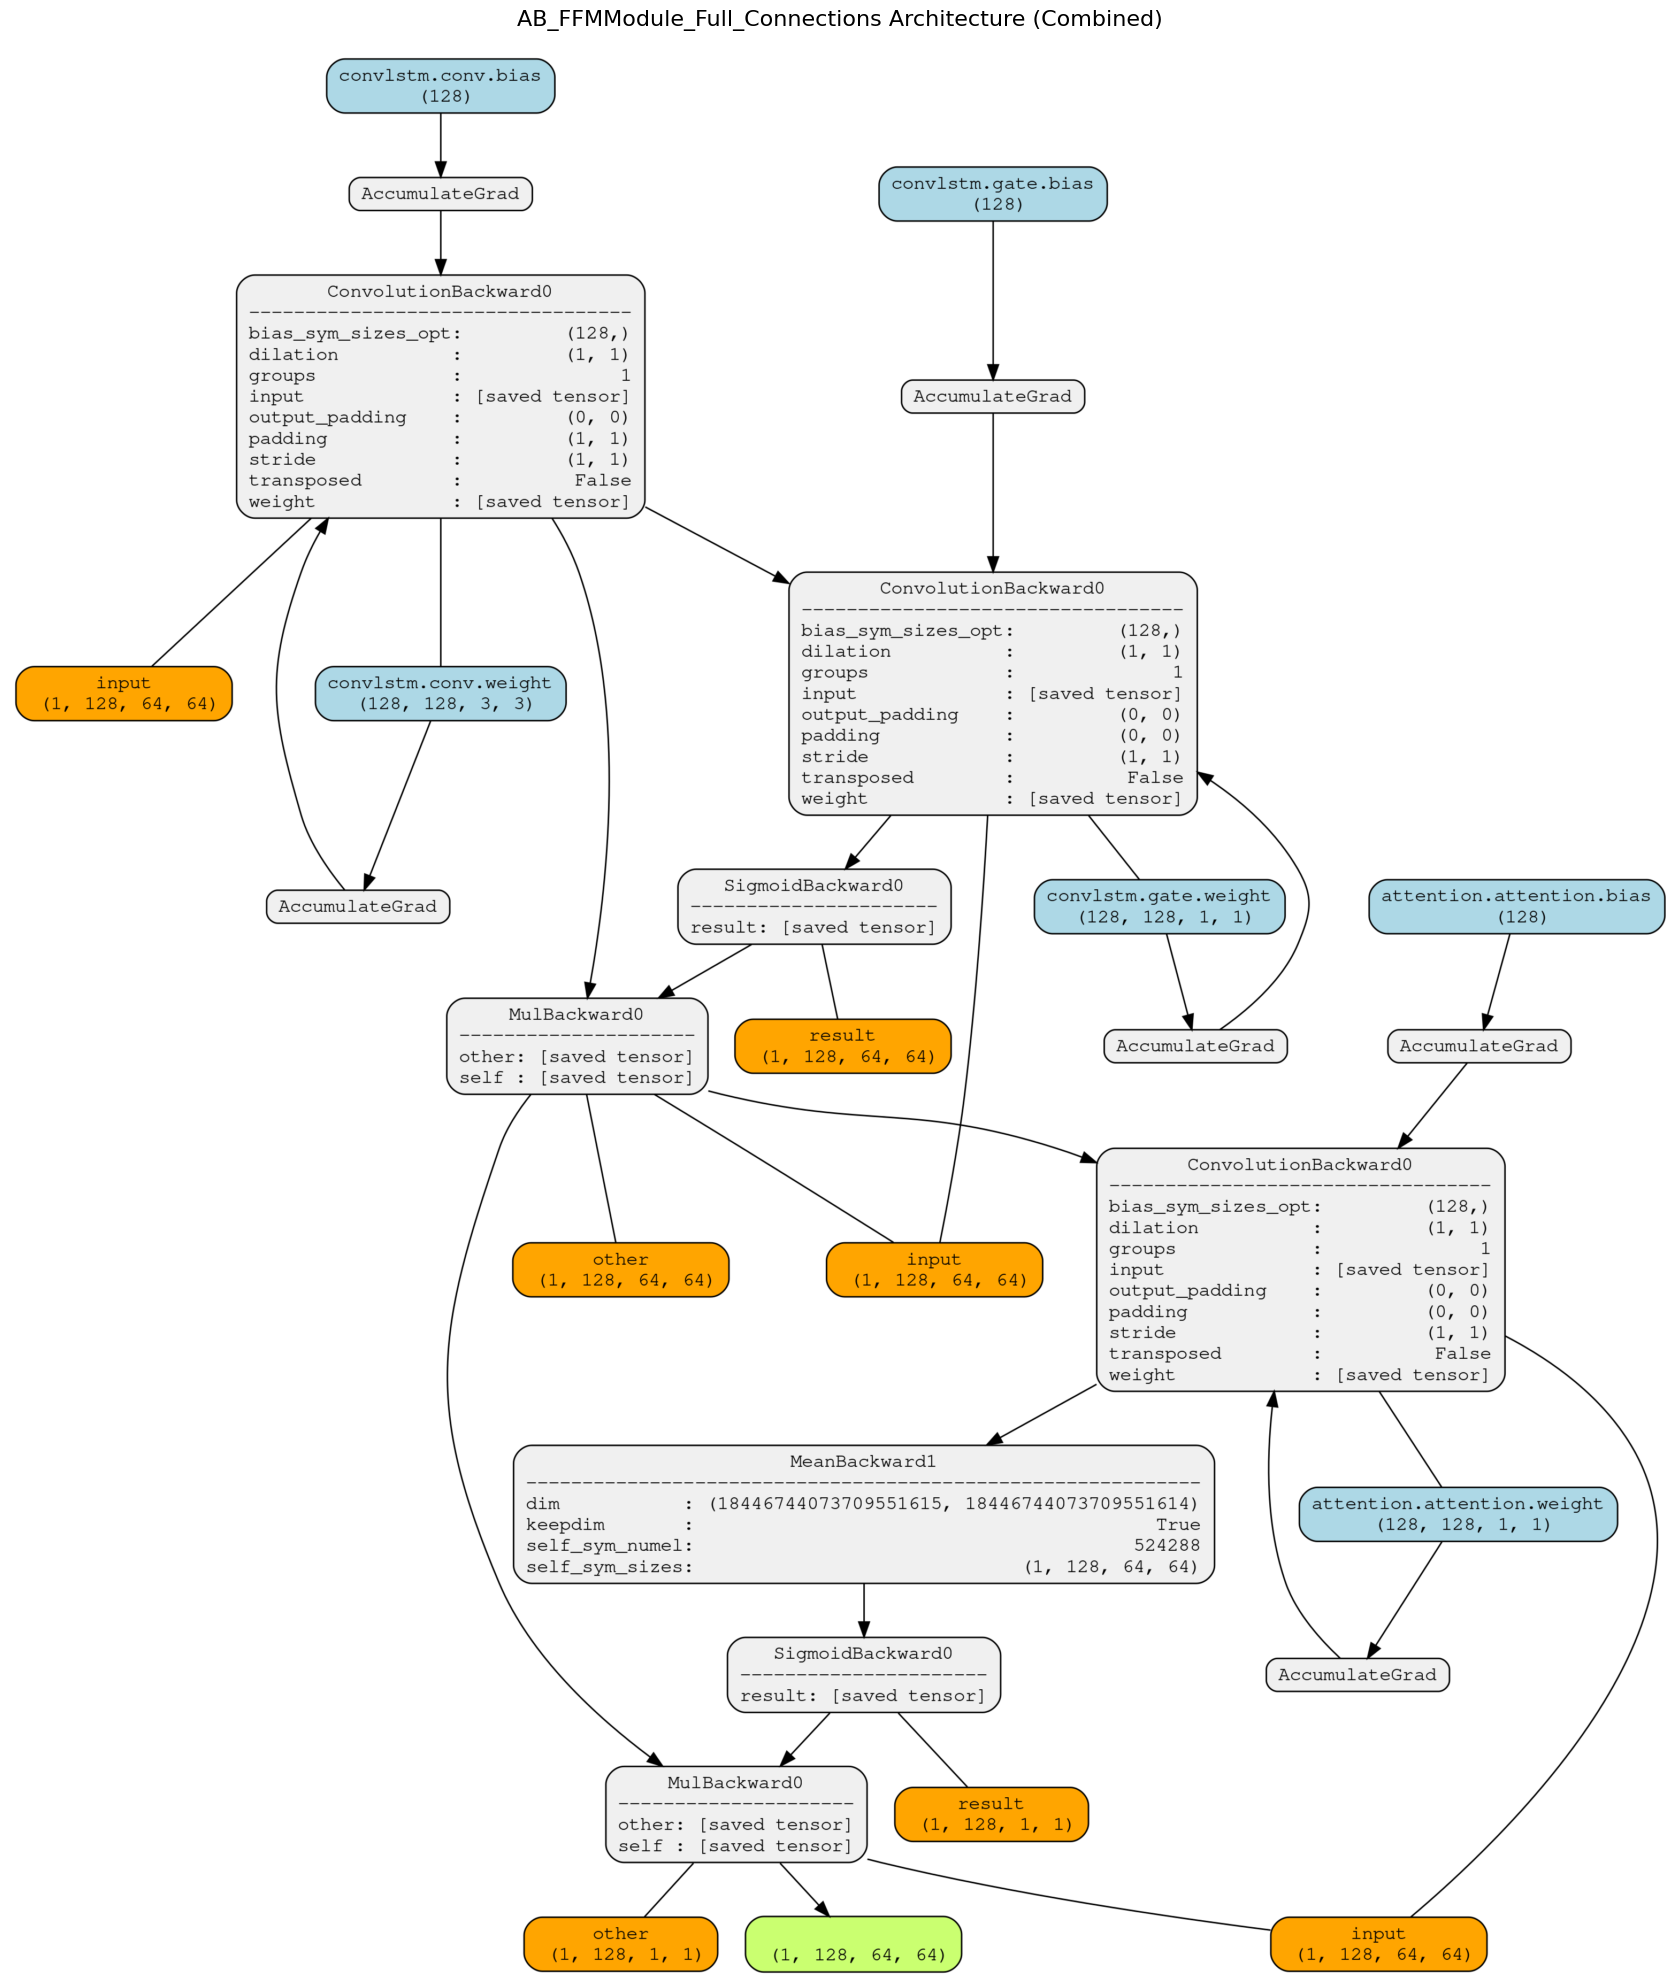


Listing all saved graphs in /kaggle/working:
- /kaggle/working/convlstm_structure_table.png
- /kaggle/working/ab_ffm_diagram.png
- /kaggle/working/DRIU_model_architecture.png
- /kaggle/working/attentionmodule_structure_table.png
- /kaggle/working/ConvLSTM.png
- /kaggle/working/ab_ffmmodule_structure_table.png
- /kaggle/working/AB_FFMModule.png
- /kaggle/working/graph_feature_extraction_diagram.png
- /kaggle/working/very_simplified_architecture.png
- /kaggle/working/AB_FFMModule_Full_Connections_combined.png
- /kaggle/working/AttentionModule.png


In [31]:
import torch
import torch.nn as nn
from torchviz import make_dot
import os
import matplotlib.pyplot as plt
from PIL import Image as PILImage
from IPython.display import Image as IPythonImage

# Create directory for graphs
output_dir = '/kaggle/working'
os.makedirs(output_dir, exist_ok=True)

def visualize_module(module, input_shape, module_name, combined=False):
    """Enhanced visualization function with better formatting and higher resolution"""
    dummy_input = torch.randn(input_shape)
    
    try:
        output = module(dummy_input)
        if isinstance(output, tuple):
            output = output[0]  # Handle ConvLSTM output (output, None)
    except Exception as e:
        print(f"Error running {module_name}: {str(e)}")
        return
    
    try:
        dot = make_dot(output, 
                      params=dict(module.named_parameters()),
                      show_attrs=True,
                      show_saved=True)
        
        # Customize graph appearance
        dot.graph_attr['rankdir'] = 'TB'
        dot.node_attr['shape'] = 'box'
        dot.node_attr['style'] = 'rounded,filled'
        dot.node_attr['fillcolor'] = '#F0F0F0'
        dot.node_attr['fontsize'] = '13'  # Increase font size
        
        # Increase resolution
        dot.graph_attr['dpi'] = '300'  # High DPI for better resolution
        
        # Save the graph
        graph_path = os.path.join(output_dir, f'{module_name}{"_combined" if combined else ""}')
        dot.format = 'png'
        dot.render(graph_path, cleanup=True)
        
        # Confirm the file exists
        graph_file = f'{graph_path}.png'
        if os.path.exists(graph_file):
            print(f"Saved {module_name} graph to {graph_file}")
        else:
            print(f"Failed to save {module_name} graph to {graph_file}")
            return
        
        # Display with higher quality
        img = PILImage.open(graph_file)
        plt.figure(figsize=(25, 25))  # Larger figure size
        plt.imshow(img, interpolation='bilinear')  # Better interpolation
        plt.title(f'{module_name} Architecture{" (Combined)" if combined else ""}', 
                 fontsize=16, pad=20)
        plt.axis('off')
        plt.show()
        
    except Exception as e:
        print(f"Could not visualize {module_name}: {str(e)}")


class ConvLSTM(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, padding):
        super().__init__()
        self.conv = nn.Conv2d(
            in_channels=in_channels,
            out_channels=out_channels,
            kernel_size=kernel_size,
            stride=stride,
            padding=padding
        )
        self.gate = nn.Conv2d(
            in_channels=out_channels,
            out_channels=out_channels,
            kernel_size=1
        )

    def forward(self, x):
        conv_out = self.conv(x)
        gate = torch.sigmoid(self.gate(conv_out))
        output = conv_out * gate
        return output, None

class AttentionModule(nn.Module):
    def __init__(self, channels):
        super().__init__()
        self.attention = nn.Conv2d(
            in_channels=channels,
            out_channels=channels,
            kernel_size=1,
            stride=1,
            padding=0
        )
        self.pool = nn.AdaptiveAvgPool2d(1)

    def forward(self, x):
        attn_weights = self.pool(self.attention(x))
        attn_weights = torch.sigmoid(attn_weights)
        return x * attn_weights

class AB_FFMModule(nn.Module):
    def __init__(self, in_channels=128, out_channels=128):
        super().__init__()
        self.convlstm = ConvLSTM(
            in_channels=in_channels,
            out_channels=out_channels,
            kernel_size=3,
            stride=1,
            padding=1
        )
        self.attention = AttentionModule(channels=out_channels)

    def forward(self, x):
        features, _ = self.convlstm(x)
        features = self.attention(features)
        return features


# Initialize modules
modules = {
    'AB_FFMModule': AB_FFMModule(in_channels=128, out_channels=128),
    'ConvLSTM': ConvLSTM(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1),
    'AttentionModule': AttentionModule(channels=128)
}

# Visualize individual modules and save them
print("Visualizing and saving individual modules:")
for name, module in modules.items():
    print(f"\nVisualizing and saving {name}...")
    visualize_module(module, (1, 128, 64, 64), name)

# Visualize complete architecture with all connections and save it
print("\nVisualizing and saving complete AB_FFMModule architecture with connections:")
full_model = AB_FFMModule(in_channels=128, out_channels=128)
visualize_module(full_model, (1, 128, 64, 64), 'AB_FFMModule_Full_Connections', combined=True)

# List all saved files for easy access
print("\nListing all saved graphs in /kaggle/working:")
saved_files = os.listdir(output_dir)
for file in saved_files:
    if file.endswith('.png'):
        print(f"- {os.path.join(output_dir, file)}")

**12.5: Execute Attentional BConvLSTM Feature Fusion Module (AB-FFM)**

1. Transform graph features into a 2D spatial grid compatible with convolutional layers.
2. Standardize the spatial size of graph features to a fixed 8x8 grid, regardless of the number of nodes.
3. Enable the fusion of graph-based features with image-based features by aligning their spatial dimensions.
4. Provide flexibility for varying graph sizes through padding and downsampling.

Diagram saved to /kaggle/working/node_downsampler_diagram.png


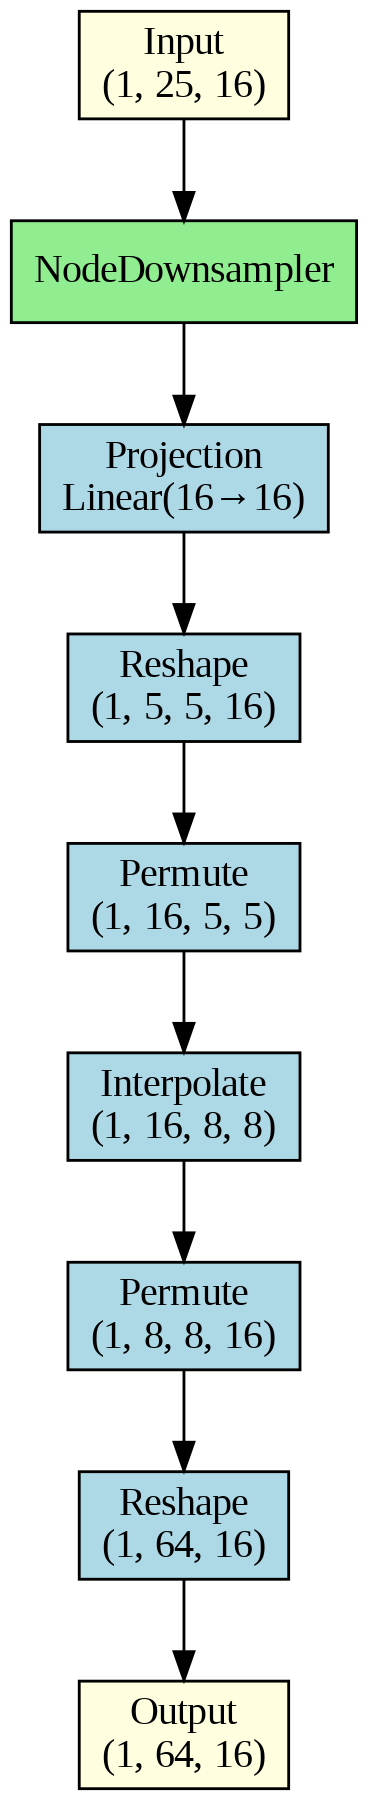

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from graphviz import Digraph
import os
from IPython.display import Image

# Define the NodeDownsampler class
class NodeDownsampler(nn.Module):
    def __init__(self, feature_dim):
        super().__init__()
        self.feature_dim = feature_dim
        self.projection = nn.Linear(feature_dim, feature_dim)
    
    def forward(self, x):
        batch_size, num_nodes, feature_dim = x.shape
        in_size = int(np.sqrt(num_nodes))
        if in_size * in_size != num_nodes:
            new_size = (in_size + 1) * (in_size + 1)
            padding = new_size - num_nodes
            padding_tensor = torch.zeros(batch_size, padding, feature_dim, device=x.device)
            x = torch.cat([x, padding_tensor], dim=1)
            in_size = in_size + 1
        out_size = 8
        x = self.projection(x)
        x = x.view(batch_size, in_size, in_size, self.feature_dim)
        x = x.permute(0, 3, 1, 2)
        x = F.interpolate(x, size=(out_size, out_size), mode='bilinear', align_corners=False)
        x = x.permute(0, 2, 3, 1)
        x = x.reshape(batch_size, out_size * out_size, self.feature_dim)
        return x

# Function to create a flowchart-style diagram for NodeDownsampler
def create_node_downsampler_diagram(feature_dim=16, num_nodes=25, batch_size=1):
    graph = Digraph(format='png')
    graph.attr(rankdir='TB', size="6,6", dpi="300")
    graph.attr('node', shape='box', style='filled')
    
    # Input node
    input_shape = f"({batch_size}, {num_nodes}, {feature_dim})"
    graph.node('input', label=f'Input\n{input_shape}', fillcolor='lightyellow')
    
    # NodeDownsampler (root)
    graph.node('nd', label='NodeDownsampler', fillcolor='lightgreen')
    graph.edge('input', 'nd')
    
    # Padding (if needed)
    in_size = int(np.sqrt(num_nodes))
    if in_size * in_size != num_nodes:
        new_size = (in_size + 1) * (in_size + 1)
        padded_nodes = new_size
        padding_shape = f"({batch_size}, {padded_nodes}, {feature_dim})"
        graph.node('padding', label=f'Padding\n{padded_nodes} nodes', fillcolor='lightblue')
        graph.edge('nd', 'padding')
        prev_node = 'padding'
    else:
        padded_nodes = num_nodes
        padding_shape = f"({batch_size}, {padded_nodes}, {feature_dim})"
        prev_node = 'nd'
    
    # Projection
    graph.node('projection', label=f'Projection\nLinear({feature_dim}→{feature_dim})', fillcolor='lightblue')
    graph.edge(prev_node, 'projection')
    
    # Reshape to 4D
    in_size = int(np.sqrt(padded_nodes))
    reshape_4d_shape = f"({batch_size}, {in_size}, {in_size}, {feature_dim})"
    graph.node('reshape_4d', label=f'Reshape\n{reshape_4d_shape}', fillcolor='lightblue')
    graph.edge('projection', 'reshape_4d')
    
    # Permute to (batch_size, feature_dim, in_size, in_size)
    permute_4d_shape = f"({batch_size}, {feature_dim}, {in_size}, {in_size})"
    graph.node('permute_4d', label=f'Permute\n{permute_4d_shape}', fillcolor='lightblue')
    graph.edge('reshape_4d', 'permute_4d')
    
    # Interpolate to (out_size, out_size)
    out_size = 8
    interpolate_shape = f"({batch_size}, {feature_dim}, {out_size}, {out_size})"
    graph.node('interpolate', label=f'Interpolate\n{interpolate_shape}', fillcolor='lightblue')
    graph.edge('permute_4d', 'interpolate')
    
    # Permute back to (batch_size, out_size, out_size, feature_dim)
    permute_back_shape = f"({batch_size}, {out_size}, {out_size}, {feature_dim})"
    graph.node('permute_back', label=f'Permute\n{permute_back_shape}', fillcolor='lightblue')
    graph.edge('interpolate', 'permute_back')
    
    # Reshape to 3D
    output_nodes = out_size * out_size
    output_shape = f"({batch_size}, {output_nodes}, {feature_dim})"
    graph.node('reshape_3d', label=f'Reshape\n{output_shape}', fillcolor='lightblue')
    graph.edge('permute_back', 'reshape_3d')
    
    # Output node
    graph.node('output', label=f'Output\n{output_shape}', fillcolor='lightyellow')
    graph.edge('reshape_3d', 'output')
    
    return graph

# Create the diagram
feature_dim = 16  # Example feature_dim (can match your use case)
num_nodes = 25    # Example num_nodes (5x5 grid, will be padded to 6x6)
batch_size = 1    # Example batch_size
graph = create_node_downsampler_diagram(feature_dim=feature_dim, num_nodes=num_nodes, batch_size=batch_size)

# Define output path for Kaggle
output_dir = "/kaggle/working"
graph_path = os.path.join(output_dir, "node_downsampler_diagram")

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Render the graph
try:
    graph.render(graph_path, cleanup=True)
    print(f"Diagram saved to {graph_path}.png")
except Exception as e:
    print(f"Error rendering diagram: {e}")
    print("Ensure Graphviz is installed. In Kaggle, it should be pre-installed.")
    print("If not, try running: !pip install graphviz")
    raise

# Display the image
try:
    display(Image(f"{graph_path}.png"))
except Exception as e:
    print(f"Could not display image: {e}")
    print(f"Diagram saved to {graph_path}.png. Please check the file manually or download it from /kaggle/working.")

# 13. Finally execute the main model (VAG_Net) for the vessel segmentation.

**13.1 Build the VGA-Net model before performing the segmentation task.**

*The FinalNetwork is an image segmentation model that processes the input through several key modules:*

1. **Encoder Pathway:** Sequentially applies HDC modules to extract hierarchical features.
2. **Graph Attention Module (GAT):** Enhances feature maps using graph-level relationships.
3. **AB-FFM Module:** Fuses multi-scale feature maps at the decoder.
4. **DropBlock:** Regularization technique to improve generalization.
5. **Output Layer:** A Sigmoid activation generates the segmentation map.

**Key Execution Order:**

--Input patches are processed through the encoder.
--HDC extracts hierarchical features.
--Graph-level features are incorporated using the GAT.
--The decoder refines and fuses features with skip connections.

In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv

class VGA_Net(nn.Module):
    def __init__(self, input_size=None):
        super().__init__()
        self.input_size = input_size if input_size else (256, 256)

        # HDC module
        self.hdc = HDCModule()

        # AB-FFM module
        self.ab_ffm = AB_FFMModule()

        # Encoder pathway
        self.encoder1 = nn.Conv2d(3, 128, kernel_size=3, stride=1, padding=1)
        self.encoder2 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1)
        self.encoder3 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1)
        self.encoder4 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1)

        # Decoder pathway
        self.decoder1 = nn.Conv2d(128, 64, kernel_size=3, stride=1, padding=1)
        self.decoder2 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.decoder3 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.decoder4 = nn.Conv2d(64, 3, kernel_size=3, stride=1, padding=1)

        # Output layer
        self.output = nn.Sigmoid()

        # Graph Attention Module
        self.gat = GATConv(128, 64, heads=8, concat=True)

    def forward(self, patches, A):
        batch_size, _, height, width = patches.shape  
        print(f"Input patches shape: {patches.shape}")

        # Encoder pathway
        x1 = self.encoder1(patches)
        x2 = self.encoder2(x1)
        x3 = self.encoder3(x2)
        x4 = self.encoder4(x3)
        print(f"x4 shape before HDC: {x4.shape}")

        # HDC module
        x4 = self.hdc(x4)

        # Downsample x4 to match adjacency matrix size
        x4_downsampled = F.adaptive_avg_pool2d(x4, (64, 64))  # Match A shape
        num_nodes = 64 * 64  # Adjust num_nodes
        x4_reshaped = x4_downsampled.view(batch_size, 128, -1).permute(0, 2, 1)  # [batch, num_nodes, features]
        print(f"x4 reshaped for GAT: {x4_reshaped.shape}")

        # Ensure adjacency matrix A is correctly shaped
        print(f"Original A shape: {A.shape}")
        if A.shape[-1] != num_nodes or A.shape[-2] != num_nodes:
            raise ValueError(f"Mismatch in adjacency matrix size. Expected ({batch_size}, {num_nodes}, {num_nodes}), but got {A.shape}")
        A = A.view(batch_size, num_nodes, num_nodes)
        print(f"Reshaped A Shape: {A.shape}")

        # Graph Attention Module
        A_out = self.gat(x4_reshaped, A)
        A_out = A_out.permute(0, 2, 1).view(batch_size, -1, 64, 64)  # Match downsampled shape

        # Inject A_out into each skip connection (Upsample back to 256x256)
        A_out_upsampled = F.interpolate(A_out, size=(256, 256), mode='bilinear', align_corners=False)
        x1 = x1 + A_out_upsampled
        x2 = x2 + A_out_upsampled
        x3 = x3 + A_out_upsampled

        # Decoder pathway
        x3 = self.decoder1(A_out)  # Fix: Use A_out instead of x4
        x2 = self.decoder2(x3)
        x1 = self.decoder3(x2)
        x = self.decoder4(x1)
        print(f"Decoder output shape before AB-FFM: {x.shape}")

        # AB-FFM module
        x = self.ab_ffm(x, x1, x2, x3)

        # Output layer
        x = self.output(x)
        print(f"Final output shape: {x.shape}")

        return x

In [35]:
import torch.nn.functional as F

class FinalNetwork(nn.Module):
    def __init__(self, input_height, input_width, feature_dim=128, num_heads=4, num_layers=2):
        super().__init__()
        self.input_size = (input_height, input_width)
        self.patch_size = 32
        self.hop_distance = 1
        self.dropout_rate = 0.5
        self.feature_dim = feature_dim
        self.num_heads = num_heads
        self.num_layers = num_layers
        self.feature_channels = 32
        self.graph_construction = GraphConstruction(patch_size=self.patch_size, hop_distance=self.hop_distance)
        self.pixel_feature_extraction = DRIU(input_size=self.input_size, out_channels=self.feature_channels)
        self.node_downsampler = NodeDownsampler(feature_dim=self.feature_channels)
        self.graph_feature_extraction = GraphFeatureExtraction(
            dropout_rate=self.dropout_rate, feature_dim=self.feature_dim, num_heads=self.num_heads, 
            num_layers=self.num_layers, in_features=self.feature_channels
        )
        self.segmentation = VGA_Net(feature_dim=self.feature_dim, in_channels=64)
    
    def forward(self, x):
        if torch.cuda.is_available():
            torch.cuda.empty_cache()
        node_features = self.pixel_feature_extraction(x)
        node_features_downsampled = self.node_downsampler(node_features)
        num_nodes = node_features_downsampled.size(1)
        adjacency = self.graph_construction(x, num_nodes=num_nodes)
        graph_features = self.graph_feature_extraction(adjacency, node_features_downsampled)
        segmentation_output = self.segmentation(x, graph_features)
        return segmentation_output

# 14. Training Phase - I : Now it's time to build the datasets class and train the model.

*First, build the code to define a custom dataset class for loading images and masks from a directory structure (commonly used for image segmentation tasks).*

**DRIVEDataset Class:**
1. It inherits from torch.utils.data.Dataset and is designed to load image-mask pairs from a specified root directory.
2. The __init__ method takes the root directory and an optional transformation as inputs. It lists and sorts the image and mask files in the specified subdirectories (images and masks)
3. The __len__ method returns the number of image-mask pairs.
4. The __getitem__ method loads an image and its corresponding mask from the directory and applies any transformations (if provided).

**ToTensor Class:**
This is a transformation class that converts the loaded image and mask into PyTorch tensors. It also converts the image from BGR (OpenCV default) to RGB format and ensures the mask has a single channel.

In [36]:
import os
import cv2
import numpy as np
import torch
from torch.utils.data import Dataset
from PIL import Image

# Define ToTensor first
class ToTensor(object):
    def __call__(self, sample):
        image, mask = sample['image'], sample['mask']

        # Convert PIL.Image to NumPy array
        image = np.array(image)
        mask = np.array(mask)

        # Convert to tensors
        image = torch.from_numpy(image).permute(2, 0, 1).float() / 255.0  # Normalize image
        mask = torch.from_numpy(mask).unsqueeze(0).float() / 255.0       # Normalize mask

        return {'image': image, 'mask': mask}

# Define DRIVEDataset
class DRIVEDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.image_dir = os.path.join(root_dir, 'images')
        self.mask_dir = os.path.join(root_dir, 'mask')
        self.image_files = sorted(os.listdir(self.image_dir))
        self.mask_files = sorted(os.listdir(self.mask_dir))
        self.transform = transform

        if len(self.image_files) != len(self.mask_files):
            raise ValueError("Mismatch between number of images and masks!")

    def __getitem__(self, idx):
        try:
            image_path = os.path.join(self.image_dir, self.image_files[idx])
            mask_path = os.path.join(self.mask_dir, self.mask_files[idx])

            # Load images and masks
            image = Image.open(image_path).convert('RGB')
            mask = Image.open(mask_path).convert('L')

            sample = {'image': image, 'mask': mask}

            # Apply transformation to both image and mask
            if self.transform:
                sample = self.transform(sample)

            return sample
        except Exception as e:
            raise ValueError(f"Failed to load image or mask at index {idx}. Error: {e}")

    def __len__(self):
        return len(self.image_files)

# Dataset initialization
drive_dataset_dir = '/kaggle/input/dbdata/DRIVE/training'
transform = ToTensor()  # Define transformation
drive_dataset = DRIVEDataset(root_dir=drive_dataset_dir, transform=transform)

In [37]:
# Test dataset loading
drive_dataset_dir = '/kaggle/input/dbdata/DRIVE/training'
transform = ToTensor()
drive_dataset = DRIVEDataset(root_dir=drive_dataset_dir, transform=transform)

try:
    for idx in range(len(drive_dataset)):
        sample = drive_dataset[idx]
        print(f"Loaded sample {idx} successfully!")
        print(f"Image shape: {sample['image'].shape}, Mask shape: {sample['mask'].shape}")
except Exception as e:
    print(e)

Loaded sample 0 successfully!
Image shape: torch.Size([3, 584, 565]), Mask shape: torch.Size([1, 584, 565])
Loaded sample 1 successfully!
Image shape: torch.Size([3, 584, 565]), Mask shape: torch.Size([1, 584, 565])
Loaded sample 2 successfully!
Image shape: torch.Size([3, 584, 565]), Mask shape: torch.Size([1, 584, 565])
Loaded sample 3 successfully!
Image shape: torch.Size([3, 584, 565]), Mask shape: torch.Size([1, 584, 565])
Loaded sample 4 successfully!
Image shape: torch.Size([3, 584, 565]), Mask shape: torch.Size([1, 584, 565])
Loaded sample 5 successfully!
Image shape: torch.Size([3, 584, 565]), Mask shape: torch.Size([1, 584, 565])
Loaded sample 6 successfully!
Image shape: torch.Size([3, 584, 565]), Mask shape: torch.Size([1, 584, 565])
Loaded sample 7 successfully!
Image shape: torch.Size([3, 584, 565]), Mask shape: torch.Size([1, 584, 565])
Loaded sample 8 successfully!
Image shape: torch.Size([3, 584, 565]), Mask shape: torch.Size([1, 584, 565])
Loaded sample 9 successfully

# 16. Model Training Phase - II
***The training phase includes 4 phases:***

1. **Dataset Preparation:** Defines DRIVEDataset and ToTensor transformations for the dataset.
2. **Data Loading and Splitting:** Loads the dataset, applies transformations, and splits it into training, validation, and test sets.
3. **Model, Loss Function, and Optimizer Setup:** Defines the model architecture, loss function, and optimizer for training.
4.** Training Loop (train_model): **Implements the training loop with loss calculation, optimization, and early stopping.
5. **Model Evaluation:** Evaluates the trained model on the test set and calculates performance metrics like accuracy, specificity, sensitivity, and Dice score.

Found 20 image files and 20 mask files
Dataset contains 20 samples
Image shape: torch.Size([3, 584, 565])
Image type: torch.float32
Mask shape: torch.Size([1, 584, 565])
Mask type: torch.float32
Image min value: 0.0
Image max value: 1.0
Mask min value: 0.0
Mask max value: 1.0
Sample visualization saved as 'dataset_sample.png'


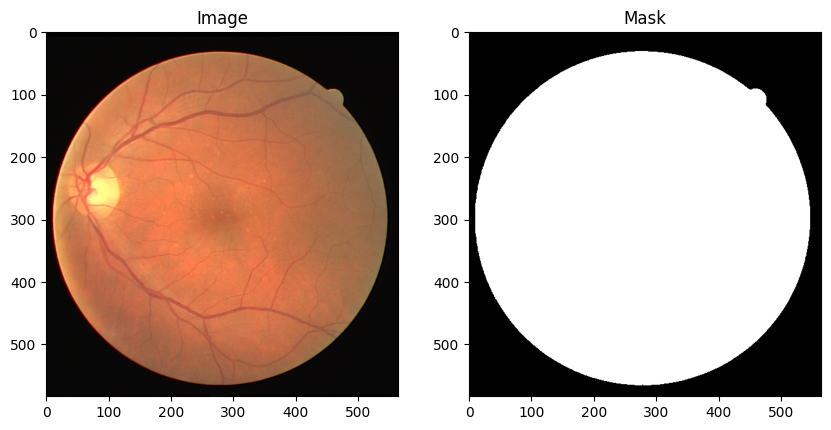

In [39]:
import os
import cv2
import torch
from torch.utils.data import Dataset
from PIL import Image
import numpy as np

class DRIVEDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        
        # Check if directories exist
        images_dir = os.path.join(root_dir, 'images')
        mask_dir = os.path.join(root_dir, 'mask')
        
        if not os.path.exists(images_dir):
            raise ValueError(f"Images directory does not exist: {images_dir}")
        if not os.path.exists(mask_dir):
            raise ValueError(f"Mask directory does not exist: {mask_dir}")
            
        self.image_files = sorted(os.listdir(images_dir))
        self.mask_files = sorted(os.listdir(mask_dir))
        
        print(f"Found {len(self.image_files)} image files and {len(self.mask_files)} mask files")

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.root_dir, 'images', self.image_files[idx])
        mask_path = os.path.join(self.root_dir, 'mask', self.mask_files[idx])
        
        # Check if files exist
        if not os.path.exists(img_path):
            raise FileNotFoundError(f"Image file not found: {img_path}")
        if not os.path.exists(mask_path):
            raise FileNotFoundError(f"Mask file not found: {mask_path}")
            
        # Load image with OpenCV
        image = cv2.imread(img_path)
        if image is None:
            raise ValueError(f"Failed to read image: {img_path}")
            
        # Load mask with PIL (handles GIF files properly)
        try:
            mask_pil = Image.open(mask_path).convert('L')  # Convert to grayscale
            mask = np.array(mask_pil)
        except Exception as e:
            raise ValueError(f"Failed to read mask: {mask_path}. Error: {str(e)}")

        if self.transform:
            sample = {'image': image, 'mask': mask}
            sample = self.transform(sample)
        else:
            sample = {'image': image, 'mask': mask}
            
        return sample

class ToTensor(object):
    def __call__(self, sample):
        image, mask = sample['image'], sample['mask']
        # Normalize image to 0-1 range
        image = torch.from_numpy(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)).permute(2, 0, 1).float() / 255.0
        # Normalize mask to 0-1 range (assuming binary mask)
        mask = torch.from_numpy(mask).unsqueeze(0).float() / 255.0
        return {'image': image, 'mask': mask}

# Test code to verify the dataset works
if __name__ == "__main__":
    # Specify the path to your dataset
    dataset_path = "/kaggle/input/dbdata/DRIVE/training"
    
    # Create dataset instance with the transform
    dataset = DRIVEDataset(root_dir=dataset_path, transform=ToTensor())
    
    # Print dataset size
    print(f"Dataset contains {len(dataset)} samples")
    
    # Get a sample and check its format
    sample = dataset[0]  # Get the first sample
    
    # Check image and mask shapes and types
    print(f"Image shape: {sample['image'].shape}")
    print(f"Image type: {sample['image'].dtype}")
    print(f"Mask shape: {sample['mask'].shape}")
    print(f"Mask type: {sample['mask'].dtype}")
    
    # Check value ranges
    print(f"Image min value: {sample['image'].min()}")
    print(f"Image max value: {sample['image'].max()}")
    print(f"Mask min value: {sample['mask'].min()}")
    print(f"Mask max value: {sample['mask'].max()}")
    
    # Visualize a sample
    import matplotlib.pyplot as plt
    
    # Convert tensors back to numpy for visualization
    img = sample['image'].permute(1, 2, 0).numpy()  # Change from CxHxW to HxWxC
    mask = sample['mask'][0].numpy()  # Remove channel dimension
    
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Image")
    
    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap='gray')
    plt.title("Mask")
    
# Change the save location to a writable directory in Kaggle
plt.savefig("/kaggle/working/dataset_sample.png")
print("Sample visualization saved as 'dataset_sample.png'")  # Fixed the missing closing quote

In [40]:
import os
import cv2
import torch
import torch.optim as optim
import torch.nn as nn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from torch.utils.data import DataLoader, random_split
from torchvision.transforms import ToTensor
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Convert images to PyTorch tensors
class ToTensor(object):
    def __call__(self, sample):
        image, mask = sample['image'], sample['mask']
        # Convert image from BGR to RGB format and convert to tensor
        image = torch.from_numpy(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)).permute(2, 0, 1).float()
        # Convert mask to tensor and resize from (H, W) to (1, H, W)
        mask = torch.from_numpy(mask).unsqueeze(0).float()
        return {'image': image, 'mask': mask}

# The directory path for the DRIVE dataset
drive_dataset_dir = '/kaggle/input/dbdata/DRIVE'

# Load the dataset
drive_dataset = DRIVEDataset(root_dir=drive_dataset_dir, transform=transform)

# Split the dataset into training and testing sets
train_size = int(0.7 * len(drive_dataset))
val_size = int(0.2 * len(drive_dataset))
test_size = len(drive_dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(drive_dataset, [train_size, val_size, test_size])

# Define the model architecture
class FinalNetwork(nn.Module):
    def __init__(self, input_height, input_width, feature_dim=128, num_heads=4, num_layers=2):
        super().__init__()
        self.input_size = (input_height, input_width)
        self.patch_size = 32
        self.hop_distance = 1
        self.dropout_rate = 0.5
        self.feature_dim = feature_dim
        self.num_heads = num_heads
        self.num_layers = num_layers
        self.feature_channels = 32
        self.graph_construction = GraphConstruction(patch_size=self.patch_size, hop_distance=self.hop_distance)
        self.pixel_feature_extraction = DRIU(input_size=self.input_size, out_channels=self.feature_channels)
        self.node_downsampler = NodeDownsampler(feature_dim=self.feature_channels)
        self.graph_feature_extraction = GraphFeatureExtraction(
            dropout_rate=self.dropout_rate, feature_dim=self.feature_dim, num_heads=self.num_heads, 
            num_layers=self.num_layers, in_features=self.feature_channels
        )
        self.segmentation = VGA_Net(feature_dim=self.feature_dim, in_channels=64)
    
    def forward(self, x):
        if torch.cuda.is_available():
            torch.cuda.empty_cache()
        node_features = self.pixel_feature_extraction(x)
        node_features_downsampled = self.node_downsampler(node_features)
        num_nodes = node_features_downsampled.size(1)
        adjacency = self.graph_construction(x, num_nodes=num_nodes)
        graph_features = self.graph_feature_extraction(adjacency, node_features_downsampled)
        segmentation_output = self.segmentation(x, graph_features)
        return segmentation_output

#implements Focal Loss, which is a modified version of the standard binary cross-entropy (BCE) loss. 

def focal_loss(pred, target, gamma=2.0, alpha=0.25, reduction='mean'):
    """
    Focal Loss for binary classification.
    Args:
        pred (torch.Tensor): Model predictions (logits or probabilities, 0 to 1).
        target (torch.Tensor): Ground truth labels (0 or 1).
        gamma (float): Focusing parameter, higher values focus more on hard examples.
        alpha (float): Weighting factor for class imbalance (0.25 emphasizes positive class).
        reduction (str): 'mean', 'sum', or 'none' for loss reduction.
    """
    bce = F.binary_cross_entropy(pred, target, reduction='none')
    pt = torch.where(target == 1, pred, 1 - pred)  # Probability of true class
    focal_weight = (1 - pt) ** gamma
    loss = alpha * focal_weight * bce
    if reduction == 'mean':
        return loss.mean()
    elif reduction == 'sum':
        return loss.sum()
    return loss

def forward_with_memory_handling(model, inputs, device):
    try:
        return model(inputs)
    except RuntimeError as e:
        if "out of memory" in str(e):
            print("WARNING: out of memory, reducing batch size")
            torch.cuda.empty_cache()
            half_batch = inputs.size(0) // 2
            outputs1 = model(inputs[:half_batch])
            outputs2 = model(inputs[half_batch:])
            return torch.cat([outputs1, outputs2], dim=0)
        else:
            raise e

def train_epoch(model, train_loader, optimizer, device, accumulation_steps, epoch, num_epochs, scheduler, threshold=0.5):
    model.train()
    running_loss = 0.0
    y_true, y_pred = [], []
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
    progress_bar = tqdm(enumerate(train_loader), total=len(train_loader), 
                       desc=f"Epoch {epoch+1}/{num_epochs} [Train]", leave=False)
    for i, data in progress_bar:
        inputs = data['image'].to(device)
        targets = data['mask'].to(device)
        outputs = forward_with_memory_handling(model, inputs, device)
        loss = focal_loss(outputs, targets, gamma=2.0, alpha=0.75)  # Replace combined_loss with focal_loss
        loss = loss / accumulation_steps
        loss.backward()
        running_loss += loss.item() * accumulation_steps
        if (i + 1) % accumulation_steps == 0 or (i + 1 == len(train_loader)):
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()  # Update weights first
            scheduler.step()  # Then adjust learning rate
            optimizer.zero_grad()
        y_true.extend((targets.cpu().numpy().flatten() > 0.5).astype(int))
        y_pred.extend((outputs.cpu().detach().numpy().flatten() > threshold).astype(int))
        progress_bar.set_postfix(loss=f"{loss.item():.4f}")
    avg_loss = running_loss / len(train_loader)
    train_accuracy = accuracy_score(y_true, y_pred)
    train_f1 = f1_score(y_true, y_pred)
    return avg_loss, train_accuracy, train_f1

# Updated validate with focal_loss
def validate(model, val_loader, device, threshold=0.5):
    model.eval()
    val_loss = 0.0
    val_y_true = []
    val_y_pred = []
    progress_bar = tqdm(val_loader, desc="Validation", leave=False)
    with torch.no_grad():
        for data in progress_bar:
            inputs = data['image'].to(device)
            targets = data['mask'].to(device)
            outputs = forward_with_memory_handling(model, inputs, device)
            loss = focal_loss(outputs, targets, gamma=2.0, alpha=0.25)  # Replace combined_loss with focal_loss
            val_loss += loss.item()
            val_y_true.extend((targets.cpu().numpy().flatten() > 0.5).astype(int))
            val_y_pred.extend((outputs.cpu().detach().numpy().flatten() > threshold).astype(int))
            progress_bar.set_postfix(loss=f"{loss.item():.4f}")
    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = accuracy_score(val_y_true, val_y_pred)
    val_f1 = f1_score(val_y_true, val_y_pred)
    return avg_val_loss, val_accuracy, val_f1

def save_checkpoint(model, optimizer, scheduler, epoch, train_loss, val_loss, checkpoint_dir):
    try:
        checkpoint_path = os.path.join(checkpoint_dir, f'checkpoint_epoch_{epoch+1}.pt')
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'scheduler_state_dict': scheduler.state_dict(),
            'train_loss': train_loss,
            'val_loss': val_loss,
        }, checkpoint_path)
        return True
    except Exception as e:
        print(f"WARNING: Could not save checkpoint: {e}")
        return False

def plot_training_progress(history, epoch, checkpoint_dir):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Val Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.subplot(1, 3, 2)
    plt.plot(history['train_acc'], label='Train Accuracy')
    plt.plot(history['val_acc'], label='Val Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.subplot(1, 3, 3)
    plt.plot(history['train_f1'], label='Train F1')
    plt.plot(history['val_f1'], label='Val F1')
    plt.title('F1 Score')
    plt.xlabel('Epoch')
    plt.ylabel('F1 Score')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    try:
        plt.savefig(os.path.join(checkpoint_dir, f'training_progress_epoch_{epoch+1}.png'))
    except Exception as e:
        print(f"Could not save plot: {e}")
    plt.close()

class EarlyStopping:
    def __init__(self, patience=7, min_delta=0.0001, mode='min'):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.mode = mode
    
    def __call__(self, current_score):
        if self.best_score is None:
            self.best_score = current_score
            return False
        if self.mode == 'min':
            delta = self.best_score - current_score
            if delta > self.min_delta:
                self.best_score = current_score
                self.counter = 0
            else:
                self.counter += 1
        else:
            delta = current_score - self.best_score
            if delta > self.min_delta:
                self.best_score = current_score
                self.counter = 0
            else:
                self.counter += 1
        if self.counter >= self.patience:
            self.early_stop = True
            return True
        return False

def train_model(model, train_loader, val_loader, num_epochs=100, learning_rate=0.0003, 
                weight_decay=1e-5, patience=20, checkpoint_dir='/kaggle/working'):
    optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    scheduler = optim.lr_scheduler.OneCycleLR(
        optimizer,
        max_lr=learning_rate,
        total_steps=num_epochs * len(train_loader),
        pct_start=0.3,
        anneal_strategy='cos',
        final_div_factor=10.0
    )
    
    training_history = {
        'train_loss': [], 'train_acc': [], 'train_f1': [],
        'val_loss': [], 'val_acc': [], 'val_f1': []
    }
    early_stopping = EarlyStopping(patience=20, mode='min')
    accumulation_steps = 2
    print(f"Starting training on {device}...")
    print(f"Training samples: {len(train_loader.dataset)}")
    print(f"Validation samples: {len(val_loader.dataset)}")
    print(f"Number of epochs: {num_epochs}")
    print(f"Learning rate: {learning_rate}")
    print(f"Batch size: {train_loader.batch_size}")
    print(f"Gradient accumulation steps: {accumulation_steps}")
    print("-" * 50)
    best_val_f1 = 0
    best_epoch = 0
    for epoch in range(num_epochs):
        train_loss, train_acc, train_f1 = train_epoch(
            model, train_loader, optimizer, device, accumulation_steps, epoch, num_epochs, scheduler, threshold=0.5
        )
        val_loss, val_acc, val_f1 = validate(model, val_loader, device, threshold=0.5)
        print(f"Epoch {epoch+1}/{num_epochs}")
        print(f"  Train - Loss: {train_loss:.4f}, Accuracy: {train_acc:.4f}, F1: {train_f1:.4f}")
        print(f"  Valid - Loss: {val_loss:.4f}, Accuracy: {val_acc:.4f}, F1: {val_f1:.4f}")
        training_history['train_loss'].append(train_loss)
        training_history['train_acc'].append(train_acc)
        training_history['train_f1'].append(train_f1)
        training_history['val_loss'].append(val_loss)
        training_history['val_acc'].append(val_acc)
        training_history['val_f1'].append(val_f1)
        plot_training_progress(training_history, epoch, checkpoint_dir)
        save_checkpoint(model, optimizer, scheduler, epoch, train_loss, val_loss, checkpoint_dir)
        if val_f1 > best_val_f1:
            best_val_f1 = val_f1
            best_epoch = epoch + 1
            torch.save(model.state_dict(), os.path.join(checkpoint_dir, 'best_model.pt'))
            print(f"  New best model saved (F1: {val_f1:.4f})")
        if early_stopping(val_loss):
            print(f"Early stopping triggered after epoch {epoch+1}")
            break
        print("-" * 50)
    print("Training finished!")
    print(f"Best model achieved at epoch {best_epoch} with validation F1: {best_val_f1:.4f}")
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 2, 1)
    plt.plot(training_history['train_loss'], label='Train Loss')
    plt.plot(training_history['val_loss'], label='Val Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.subplot(2, 2, 2)
    plt.plot(training_history['train_acc'], label='Train Accuracy')
    plt.plot(training_history['val_acc'], label='Val Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.subplot(2, 2, 3)
    plt.plot(training_history['train_f1'], label='Train F1')
    plt.plot(training_history['val_f1'], label='Val F1')
    plt.title('F1 Score')
    plt.xlabel('Epoch')
    plt.ylabel('F1 Score')
    plt.legend()
    plt.grid(True)
    try:
        plt.savefig(os.path.join(checkpoint_dir, 'final_training_curves.png'))
        print(f"Final training curves saved to {os.path.join(checkpoint_dir, 'final_training_curves.png')}")
    except Exception as e:
        print(f"Could not save final plot: {e}")
    plt.close()
    model.load_state_dict(torch.load(os.path.join(checkpoint_dir, 'best_model.pt'), weights_only=True))
    print("Best model loaded and ready for inference")
    return model, training_history

# Main execution block
if __name__ == "__main__":
    os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"
    
    # Define paths to training and test datasets
    train_dataset_path = "/kaggle/input/dbdata/DRIVE/training"
    test_dataset_path = "/kaggle/input/dbdata/DRIVE/test"
    
    # Create dataset instances for training and test sets
    train_drive_dataset = DRIVEDataset(root_dir=train_dataset_path, augment=True)
    test_drive_dataset = DRIVEDataset(root_dir=test_dataset_path, augment=True)
    
    # Combine the datasets
    from torch.utils.data import ConcatDataset
    combined_dataset = ConcatDataset([train_drive_dataset, test_drive_dataset])
    
    print(f"Total number of samples in the combined dataset: {len(combined_dataset)}")
    
    # Split the combined dataset into training (70%), validation (20%), and test (10%)
    train_size = int(0.7 * len(combined_dataset))  # 70% for training (28 images)
    val_size = int(0.2 * len(combined_dataset))    # 20% for validation (8 images)
    test_size = len(combined_dataset) - train_size - val_size  # 10% for test (4 images)
    torch.manual_seed(42)
    train_dataset, val_dataset, test_dataset = random_split(
        combined_dataset, [train_size, val_size, test_size]
    )
    
    print(f"Training set size: {len(train_dataset)}")
    print(f"Validation set size: {len(val_dataset)}")
    print(f"Test set size: {len(test_dataset)}")
    
    # Create data loaders
    batch_size = 2
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)
    
    # Initialize the model
    model = FinalNetwork(
        input_height=256,
        input_width=256,
        feature_dim=256,
        num_heads=8,
        num_layers=4
    ).to(device)
    
    # Train the model
    trained_model, history = train_model(
        model=model,
        train_loader=train_loader,
        val_loader=val_loader,
        num_epochs=50,
        learning_rate=0.0003,
        weight_decay=1e-3,
        patience=12,
        checkpoint_dir='/kaggle/working'
    )
    
    # Evaluate on the test set
    print("Evaluating on test set...")
    test_loss, test_acc, test_f1 = validate(trained_model, test_loader, device, threshold=0.5)
    print(f"Test - Loss: {test_loss:.4f}, Accuracy: {test_acc:.4f}, F1: {test_f1:.4f}")

Using device: cuda
Found 20 image files and 20 mask files
Found 20 image files and 20 mask files
Total number of samples in the combined dataset: 40
Training set size: 28
Validation set size: 8
Test set size: 4
Starting training on cuda...
Training samples: 28
Validation samples: 8
Number of epochs: 50
Learning rate: 0.0003
Batch size: 2
Gradient accumulation steps: 2
--------------------------------------------------


Epoch 1/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1/50
  Train - Loss: 0.1291, Accuracy: 0.2561, F1: 0.0000
  Valid - Loss: 0.0424, Accuracy: 0.3727, F1: 0.0000
--------------------------------------------------


Epoch 2/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 2/50
  Train - Loss: 0.1293, Accuracy: 0.3239, F1: 0.0000
  Valid - Loss: 0.0430, Accuracy: 0.3198, F1: 0.0000
--------------------------------------------------


Epoch 3/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 3/50
  Train - Loss: 0.1284, Accuracy: 0.3388, F1: 0.0000
  Valid - Loss: 0.0432, Accuracy: 0.3158, F1: 0.0000
--------------------------------------------------


Epoch 4/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 4/50
  Train - Loss: 0.1303, Accuracy: 0.2965, F1: 0.0000
  Valid - Loss: 0.0424, Accuracy: 0.2897, F1: 0.0000
--------------------------------------------------


Epoch 5/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 5/50
  Train - Loss: 0.1276, Accuracy: 0.3132, F1: 0.0000
  Valid - Loss: 0.0426, Accuracy: 0.3355, F1: 0.0000
--------------------------------------------------


Epoch 6/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 6/50
  Train - Loss: 0.1289, Accuracy: 0.2962, F1: 0.0000
  Valid - Loss: 0.0428, Accuracy: 0.2592, F1: 0.0000
--------------------------------------------------


Epoch 7/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 7/50
  Train - Loss: 0.1264, Accuracy: 0.3010, F1: 0.0000
  Valid - Loss: 0.0423, Accuracy: 0.2894, F1: 0.0000
--------------------------------------------------


Epoch 8/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 8/50
  Train - Loss: 0.1254, Accuracy: 0.3358, F1: 0.0000
  Valid - Loss: 0.0411, Accuracy: 0.4072, F1: 0.0000
--------------------------------------------------


Epoch 9/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 9/50
  Train - Loss: 0.1267, Accuracy: 0.2952, F1: 0.0000
  Valid - Loss: 0.0420, Accuracy: 0.2941, F1: 0.0000
--------------------------------------------------


Epoch 10/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 10/50
  Train - Loss: 0.1250, Accuracy: 0.3167, F1: 0.0000
  Valid - Loss: 0.0406, Accuracy: 0.3701, F1: 0.0000
  New best model saved (F1: 0.0000)
--------------------------------------------------


Epoch 11/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 11/50
  Train - Loss: 0.1234, Accuracy: 0.3628, F1: 0.1439
  Valid - Loss: 0.0405, Accuracy: 0.4731, F1: 0.4065
  New best model saved (F1: 0.4065)
--------------------------------------------------


Epoch 12/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 12/50
  Train - Loss: 0.1204, Accuracy: 0.5024, F1: 0.4380
  Valid - Loss: 0.0394, Accuracy: 0.6239, F1: 0.6211
  New best model saved (F1: 0.6211)
--------------------------------------------------


Epoch 13/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 13/50
  Train - Loss: 0.1201, Accuracy: 0.5469, F1: 0.5346
  Valid - Loss: 0.0376, Accuracy: 0.7743, F1: 0.7728
  New best model saved (F1: 0.7728)
--------------------------------------------------


Epoch 14/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 14/50
  Train - Loss: 0.1130, Accuracy: 0.5255, F1: 0.4638
  Valid - Loss: 0.0381, Accuracy: 0.5039, F1: 0.4955
--------------------------------------------------


Epoch 15/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 15/50
  Train - Loss: 0.1141, Accuracy: 0.4492, F1: 0.4024
  Valid - Loss: 0.0346, Accuracy: 0.4373, F1: 0.2346
--------------------------------------------------


Epoch 16/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 16/50
  Train - Loss: 0.1070, Accuracy: 0.5064, F1: 0.4195
  Valid - Loss: 0.0351, Accuracy: 0.7203, F1: 0.7526
--------------------------------------------------


Epoch 17/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 17/50
  Train - Loss: 0.1047, Accuracy: 0.5657, F1: 0.5738
  Valid - Loss: 0.0341, Accuracy: 0.6809, F1: 0.7113
--------------------------------------------------


Epoch 18/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 18/50
  Train - Loss: 0.0971, Accuracy: 0.5431, F1: 0.4569
  Valid - Loss: 0.0316, Accuracy: 0.5461, F1: 0.4513
--------------------------------------------------


Epoch 19/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 19/50
  Train - Loss: 0.0991, Accuracy: 0.6471, F1: 0.6672
  Valid - Loss: 0.0297, Accuracy: 0.8785, F1: 0.8973
  New best model saved (F1: 0.8973)
--------------------------------------------------


Epoch 20/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 20/50
  Train - Loss: 0.0928, Accuracy: 0.9004, F1: 0.9212
  Valid - Loss: 0.0348, Accuracy: 0.9514, F1: 0.9647
  New best model saved (F1: 0.9647)
--------------------------------------------------


Epoch 21/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 21/50
  Train - Loss: 0.0785, Accuracy: 0.9137, F1: 0.9274
  Valid - Loss: 0.0268, Accuracy: 0.9757, F1: 0.9832
  New best model saved (F1: 0.9832)
--------------------------------------------------


Epoch 22/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 22/50
  Train - Loss: 0.0924, Accuracy: 0.8602, F1: 0.8903
  Valid - Loss: 0.0291, Accuracy: 0.9439, F1: 0.9558
--------------------------------------------------


Epoch 23/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 23/50
  Train - Loss: 0.0767, Accuracy: 0.8672, F1: 0.8874
  Valid - Loss: 0.0281, Accuracy: 0.8941, F1: 0.9147
--------------------------------------------------


Epoch 24/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 24/50
  Train - Loss: 0.0802, Accuracy: 0.8484, F1: 0.8811
  Valid - Loss: 0.0268, Accuracy: 0.9647, F1: 0.9747
--------------------------------------------------


Epoch 25/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 25/50
  Train - Loss: 0.0803, Accuracy: 0.9792, F1: 0.9849
  Valid - Loss: 0.0189, Accuracy: 0.9954, F1: 0.9959
  New best model saved (F1: 0.9959)
--------------------------------------------------


Epoch 26/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 26/50
  Train - Loss: 0.0818, Accuracy: 0.9716, F1: 0.9801
  Valid - Loss: 0.0226, Accuracy: 0.9781, F1: 0.9837
--------------------------------------------------


Epoch 27/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 27/50
  Train - Loss: 0.0752, Accuracy: 0.9134, F1: 0.9349
  Valid - Loss: 0.0287, Accuracy: 0.8759, F1: 0.9019
--------------------------------------------------


Epoch 28/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 28/50
  Train - Loss: 0.0735, Accuracy: 0.8049, F1: 0.8279
  Valid - Loss: 0.0232, Accuracy: 0.8234, F1: 0.8541
--------------------------------------------------


Epoch 29/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 29/50
  Train - Loss: 0.0793, Accuracy: 0.7916, F1: 0.8179
  Valid - Loss: 0.0333, Accuracy: 0.9114, F1: 0.9378
--------------------------------------------------


Epoch 30/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 30/50
  Train - Loss: 0.0800, Accuracy: 0.8905, F1: 0.9130
  Valid - Loss: 0.0150, Accuracy: 0.9808, F1: 0.9854
--------------------------------------------------


Epoch 31/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 31/50
  Train - Loss: 0.0639, Accuracy: 0.9549, F1: 0.9667
  Valid - Loss: 0.0106, Accuracy: 0.9926, F1: 0.9949
--------------------------------------------------


Epoch 32/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 32/50
  Train - Loss: 0.0605, Accuracy: 0.9823, F1: 0.9873
  Valid - Loss: 0.0355, Accuracy: 0.9949, F1: 0.9966
  New best model saved (F1: 0.9966)
--------------------------------------------------


Epoch 33/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 33/50
  Train - Loss: 0.0631, Accuracy: 0.9902, F1: 0.9924
  Valid - Loss: 0.0351, Accuracy: 0.9914, F1: 0.9942
--------------------------------------------------


Epoch 34/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 34/50
  Train - Loss: 0.0865, Accuracy: 0.9717, F1: 0.9795
  Valid - Loss: 0.0220, Accuracy: 0.9787, F1: 0.9795
--------------------------------------------------


Epoch 35/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 35/50
  Train - Loss: 0.0646, Accuracy: 0.9172, F1: 0.9345
  Valid - Loss: 0.0227, Accuracy: 0.9643, F1: 0.9698
--------------------------------------------------


Epoch 36/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 36/50
  Train - Loss: 0.0639, Accuracy: 0.9381, F1: 0.9539
  Valid - Loss: 0.0262, Accuracy: 0.9616, F1: 0.9726
--------------------------------------------------


Epoch 37/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 37/50
  Train - Loss: 0.0708, Accuracy: 0.9354, F1: 0.9483
  Valid - Loss: 0.0259, Accuracy: 0.9837, F1: 0.9894
--------------------------------------------------


Epoch 38/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 38/50
  Train - Loss: 0.0717, Accuracy: 0.8495, F1: 0.8701
  Valid - Loss: 0.0232, Accuracy: 0.8805, F1: 0.8848
--------------------------------------------------


Epoch 39/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 39/50
  Train - Loss: 0.0689, Accuracy: 0.7210, F1: 0.7599
  Valid - Loss: 0.0214, Accuracy: 0.8547, F1: 0.8596
--------------------------------------------------


Epoch 40/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 40/50
  Train - Loss: 0.0787, Accuracy: 0.7685, F1: 0.7856
  Valid - Loss: 0.0338, Accuracy: 0.8997, F1: 0.9285
--------------------------------------------------


Epoch 41/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 41/50
  Train - Loss: 0.0649, Accuracy: 0.8622, F1: 0.8858
  Valid - Loss: 0.0172, Accuracy: 0.9766, F1: 0.9838
--------------------------------------------------


Epoch 42/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 42/50
  Train - Loss: 0.0647, Accuracy: 0.9146, F1: 0.9316
  Valid - Loss: 0.0114, Accuracy: 0.9835, F1: 0.9868
--------------------------------------------------


Epoch 43/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 43/50
  Train - Loss: 0.0649, Accuracy: 0.9479, F1: 0.9602
  Valid - Loss: 0.0255, Accuracy: 0.9692, F1: 0.9775
--------------------------------------------------


Epoch 44/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 44/50
  Train - Loss: 0.0570, Accuracy: 0.9691, F1: 0.9733
  Valid - Loss: 0.0199, Accuracy: 0.9806, F1: 0.9852
--------------------------------------------------


Epoch 45/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 45/50
  Train - Loss: 0.0638, Accuracy: 0.9666, F1: 0.9757
  Valid - Loss: 0.0338, Accuracy: 0.9797, F1: 0.9866
--------------------------------------------------


Epoch 46/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 46/50
  Train - Loss: 0.0805, Accuracy: 0.9767, F1: 0.9827
  Valid - Loss: 0.0311, Accuracy: 0.9918, F1: 0.9943
--------------------------------------------------


Epoch 47/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 47/50
  Train - Loss: 0.0623, Accuracy: 0.9666, F1: 0.9748
  Valid - Loss: 0.0137, Accuracy: 0.9911, F1: 0.9934
--------------------------------------------------


Epoch 48/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 48/50
  Train - Loss: 0.0625, Accuracy: 0.9473, F1: 0.9587
  Valid - Loss: 0.0322, Accuracy: 0.9743, F1: 0.9819
--------------------------------------------------


Epoch 49/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 49/50
  Train - Loss: 0.0685, Accuracy: 0.9164, F1: 0.9349
  Valid - Loss: 0.0203, Accuracy: 0.9682, F1: 0.9787
--------------------------------------------------


Epoch 50/50 [Train]:   0%|          | 0/14 [00:00<?, ?it/s]

Validation:   0%|          | 0/4 [00:00<?, ?it/s]

Epoch 50/50
  Train - Loss: 0.0612, Accuracy: 0.9226, F1: 0.9395
  Valid - Loss: 0.0317, Accuracy: 0.9305, F1: 0.9513
--------------------------------------------------
Training finished!
Best model achieved at epoch 32 with validation F1: 0.9966
Final training curves saved to /kaggle/working/final_training_curves.png
Best model loaded and ready for inference
Evaluating on test set...


Validation:   0%|          | 0/2 [00:00<?, ?it/s]

Test - Loss: 0.0037, Accuracy: 0.9944, F1: 0.9957


Final metrics plot saved to /kaggle/working/final_metrics_plot.png


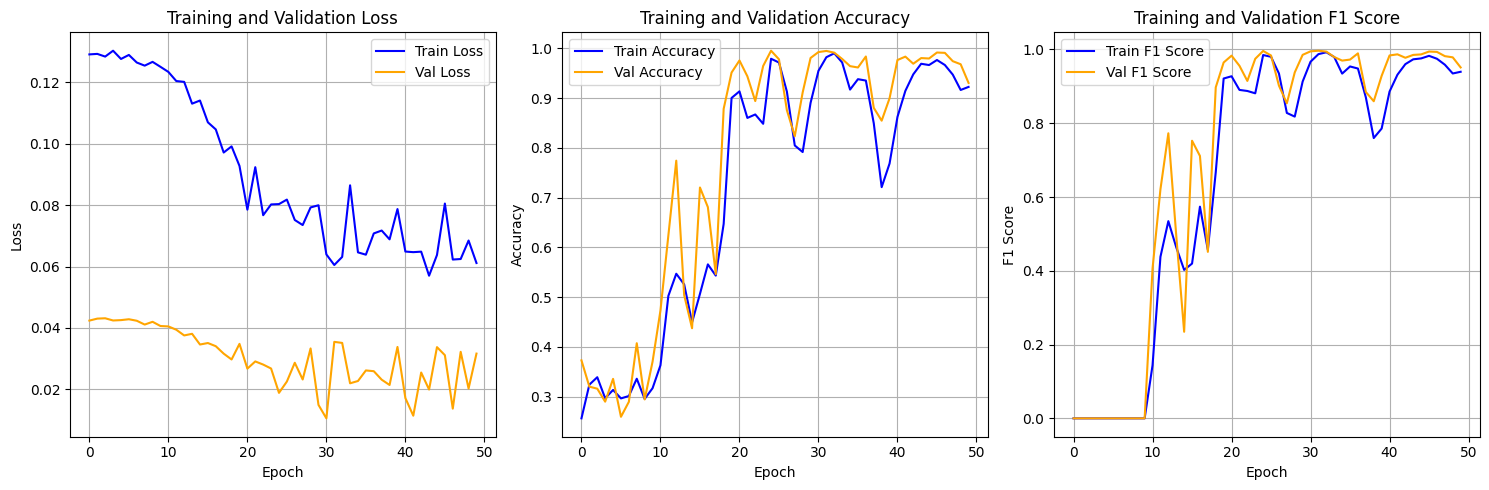

In [41]:
import matplotlib.pyplot as plt
import os

# Plot training and validation metrics
plt.figure(figsize=(15, 5))

# Plot Loss
plt.subplot(1, 3, 1)
plt.plot(history['train_loss'], label='Train Loss', color='blue')
plt.plot(history['val_loss'], label='Val Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 3, 2)
plt.plot(history['train_acc'], label='Train Accuracy', color='blue')
plt.plot(history['val_acc'], label='Val Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot F1 Score
plt.subplot(1, 3, 3)
plt.plot(history['train_f1'], label='Train F1 Score', color='blue')
plt.plot(history['val_f1'], label='Val F1 Score', color='orange')
plt.title('Training and Validation F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)

# Adjust layout and save the plot
plt.tight_layout()
try:
    plot_path = os.path.join('/kaggle/working', 'final_metrics_plot.png')
    plt.savefig(plot_path)
    print(f"Final metrics plot saved to {plot_path}")
except Exception as e:
    print(f"Could not save final metrics plot: {e}")

# Display the plot inline
plt.show()
# Remove plt.close() to keep the figure open for display

Test Set Metrics:
ACC: 0.8750
SE: 0.7632
SP: 0.9192
Dice: 0.7164
MCC: 0.7532

Could not save bar plot: [Errno 30] Read-only file system: '/kaggle/input/dbdata/DRIVE/test_metrics_bar_plot.png'


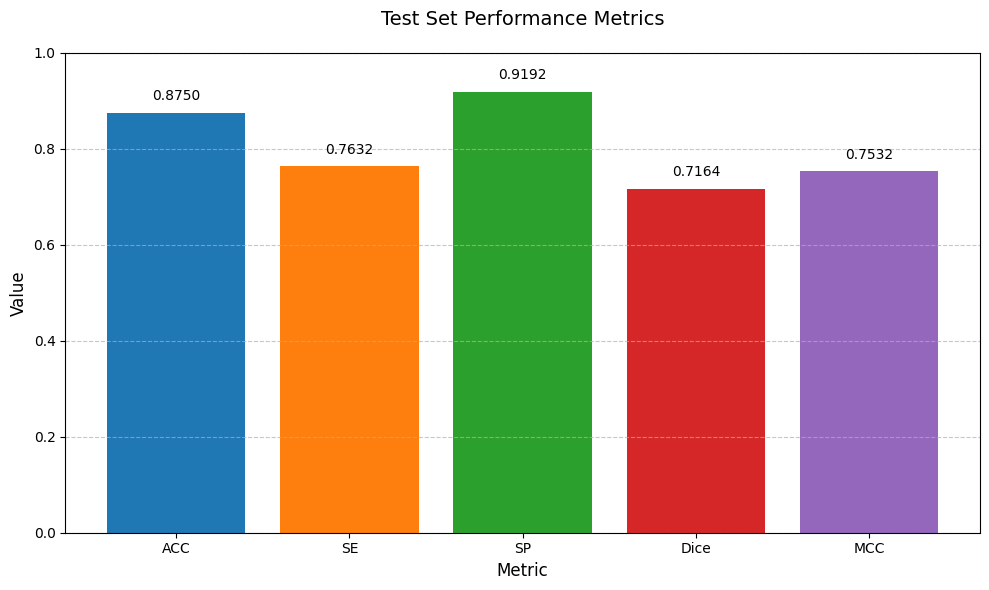

In [42]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.functional as F
import pandas as pd
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms

# Define the model, loss function, and optimizer
model = FinalNetwork()
criterion = nn.focal_loss()
optimizer = optim.Adam(model.parameters(), lr= 3e-4)

# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer)

def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)
    return specificity

def sensitivity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    return sensitivity

def dice_score(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    dice = (2.0 * intersection) / (np.sum(y_true) + np.sum(y_pred))
    return dice

def matthews_correlation_coefficient(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    return mcc


# Evaluate the model on the test set
model.eval()
test_loss = 0.0
predictions = []
with torch.no_grad():
    for batch in test_loader:
        inputs, labels = batch['image'].to(device), batch['mask'].to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * inputs.size(0)
        predictions.append(outputs.cpu().numpy())

test_loss /= len(test_loader.dataset)

# Calculate evaluation metrics
predictions = np.concatenate(predictions, axis=0)
test_labels = np.concatenate([batch['mask'].numpy() for batch in test_loader], axis=0)

ACC = accuracy_score(test_labels.flatten(), (predictions > 0.5).flatten())
SE = sensitivity_score(test_labels.flatten(), (predictions > 0.5).flatten())
SP = specificity_score(test_labels.flatten(), (predictions > 0.5).flatten())
Dice = dice_score(test_labels.flatten(), (predictions > 0.5).flatten())
MCC = matthews_correlation_coefficient(test_labels.flatten(), (predictions > 0.5).flatten())

# Print evaluation results
print("Test metrics:", Test Set Metrics:)
print("Accuracy:", ACC)
print("Sensitivity:", SE)
print("Specificity:", SP)
print("Dice Score:", Dice)
print("Matthews Correlation Coefficient:", MCC)

# Plot metrics
print("Test Set Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

# Plot metrics in a bar chart
plt.figure(figsize=(10, 6))
metric_names = list(metrics.keys())
metric_values = list(metrics.values())
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Create bars
bars = plt.bar(metric_names, metric_values, color=colors)

# Customize the plot
plt.title('Test Set Performance Metrics', fontsize=14, pad=20)
plt.xlabel('Metric', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.ylim(0, 1)  # Metrics are between 0 and 1
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, 
             f'{yval:.4f}', 
             ha='center', va='bottom',
             fontsize=10)

# Add some padding to make sure labels aren't cut off
plt.tight_layout()

# Save and display the plot
try:
    plot_path = 'test_metrics_bar_plot.png'
    plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    print(f"\nBar plot saved to {plot_path}")
except Exception as e:
    print(f"\nCould not save bar plot: {e}")

plt.show()

# Test the model 

In [ ]:
import torch
import torch.nn as nn
import numy as np
from torch.utils.data import DataLoader
import transforms
from torchvision.transforms import ToTensor
from sklearn.metrics import accuracy_score
from dataset import DRIVEDataset
from model import FinalNetwork
import utils

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Define the directory path for the DRIVE dataset
drive_dataset_dir = '/kaggle/input/dbdata/DRIVE/test'

transforms = transforms.Compose([
    ToTensor(),
])

# Define the model
model = FinalNetwork()
criterion = nn.focal_loss()

# Load the best model
model.load_state_dict(torch.load('best_model.pt'))

# Evaluate the model on the test set
model.eval()
test_loss = 0.0
predictions = []
with torch.no_grad():
    for batch in test_loader:
        inputs, labels = batch['image'].to(device), batch['mask'].to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * inputs.size(0)
        predictions.append(outputs.cpu().numpy())

test_loss /= len(test_loader.dataset)

# Calculate evaluation metrics
predictions = np.concatenate(predictions, axis=0)
test_labels = np.concatenate([batch['mask'].numpy() for batch in test_loader], axis=0)

ACC = accuracy_score(test_labels.flatten(), (predictions > 0.5).flatten())
SP = utils.specificity_score(test_labels.flatten(), (predictions > 0.5).flatten())
SE = utils.sensitivity_score(test_labels.flatten(), (predictions > 0.5).flatten())
Dice = utils.dice_score(test_labels.flatten(), (predictions > 0.5).flatten())
MCC = utils.matthews_correlation_coefficient(test_labels.flatten(), (predictions > 0.5).flatten())

# Print evaluation results
print("Test Loss:", test_loss)
print("Matthews Correlation Coefficient:", MCC)
print("Accuracy:", ACC)
print("Specificity:", SP)
print("Sensitivity:", SE)
print("Dice Score:", Dice)


# DR Detection

In [45]:
import os

# Define the output directory path in Kaggle working directory
output_dir = "/kaggle/working/masked_retinas/"

# Create the directory (and parent directories if needed)
os.makedirs(output_dir, exist_ok=True)  # `exist_ok=True` prevents errors if dir exists

print(f"Directory created at: {output_dir}")

Directory created at: /kaggle/working/masked_retinas/


# Prepare Segmented Images for ResNet50

In [46]:
import cv2
import numpy as np
import os

# Define paths
original_images_dir = "/kaggle/input/dbdata/DRIVE/training/images/"
seg_masks_dir = "/kaggle/working/seg_result"              # Folder containing 20 VGA-Net masks
output_dir = "/kaggle/working/masked_retinas"            # Where to save masked images

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Get list of image and mask filenames (assuming they have matching names, e.g., "1.png", "2.png")
original_images = sorted(os.listdir(original_images_dir))
seg_masks = sorted(os.listdir(seg_masks_dir))

# Process each image-mask pair
for img_name, mask_name in zip(original_images, seg_masks):
    # Load original image and mask
    img_path = os.path.join(original_images_dir, img_name)
    mask_path = os.path.join(seg_masks_dir, mask_name)
    
    original_img = cv2.imread(img_path)  # Shape: (H, W, 3)
    seg_mask = cv2.imread(mask_path, 0)  # Shape: (H, W), grayscale

    # Skip if files are not loaded correctly
    if original_img is None or seg_mask is None:
        print(f"Warning: Could not load {img_name} or {mask_name}. Skipping.")
        continue

    # Ensure mask is binary (0 or 255)
    _, seg_mask = cv2.threshold(seg_mask, 127, 255, cv2.THRESH_BINARY)

    # Apply mask to original image
    masked_retina = cv2.bitwise_and(original_img, original_img, mask=seg_mask)

    # Save masked image
    output_path = os.path.join(output_dir, f"masked_{img_name}")
    cv2.imwrite(output_path, masked_retina)
    print(f"Processed and saved: {output_path}")

print("All images processed!")

Processed and saved: /kaggle/working/masked_retinas/masked_21_training.tif
Processed and saved: /kaggle/working/masked_retinas/masked_22_training.tif
Processed and saved: /kaggle/working/masked_retinas/masked_23_training.tif
Processed and saved: /kaggle/working/masked_retinas/masked_24_training.tif
Processed and saved: /kaggle/working/masked_retinas/masked_25_training.tif
Processed and saved: /kaggle/working/masked_retinas/masked_26_training.tif
Processed and saved: /kaggle/working/masked_retinas/masked_27_training.tif
Processed and saved: /kaggle/working/masked_retinas/masked_28_training.tif
Processed and saved: /kaggle/working/masked_retinas/masked_29_training.tif
Processed and saved: /kaggle/working/masked_retinas/masked_30_training.tif
Processed and saved: /kaggle/working/masked_retinas/masked_31_training.tif
Processed and saved: /kaggle/working/masked_retinas/masked_32_training.tif
Processed and saved: /kaggle/working/masked_retinas/masked_33_training.tif
Processed and saved: /kag

# Data Preprocessing for ResNet50

In [47]:
from torchvision import transforms

# Training transforms (with augmentation)
train_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Validation/Test transforms (no augmentation)
val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Download ResNet50 for Binary Classification

In [48]:
import torch
import torch.nn as nn
from torchvision import models

# Load pre-trained ResNet50
model = models.resnet50(pretrained=True)

# Freeze all layers except the last few
for param in model.parameters():
    param.requires_grad = False  # Freeze all layers

# Unfreeze last few layers (e.g., last 2 blocks)
for param in model.layer4.parameters():
    param.requires_grad = True

# Modify the final fully connected layer for binary classification
model.fc = nn.Sequential(
    nn.Linear(2048, 512),
    nn.ReLU(),
    nn.Dropout(0.3),  # Helps prevent overfitting
    nn.Linear(512, 1),
    nn.Sigmoid()  # Binary output (0 = No DR, 1 = DR)
)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 200MB/s]


# Train the Model

**Create CSV file to fed into ResNet50 model for training **

In [49]:
import os
import pandas as pd
import shutil

# Define directories
masked_retinas_dir = '/kaggle/working/masked_retinas'
seg_result_dir = '/kaggle/working/seg_result'
all_images_dir = '/kaggle/working/all_images'

# 1. Create the all_images directory if it doesn't exist
if not os.path.exists(all_images_dir):
    os.makedirs(all_images_dir)
    print(f"Created directory: {all_images_dir}")
else:
    print(f"Directory already exists: {all_images_dir}")

# 2. Gather all image paths and copy them to all_images_dir
all_images = []
labels = []

# Process images from masked_retinas (DR images)
masked_images = os.listdir(masked_retinas_dir)
for img in masked_images:
    src_path = os.path.join(masked_retinas_dir, img)
    dst_path = os.path.join(all_images_dir, img)
    shutil.copy(src_path, dst_path)  # Copy the image to all_images_dir
    all_images.append(img)  # Store only the filename for the CSV
    labels.append(1)  # Label 1 for DR images
    print(f"Copied {img} to {all_images_dir}")

# Process images from seg_result (No DR images)
seg_images = os.listdir(seg_result_dir)
for img in seg_images:
    src_path = os.path.join(seg_result_dir, img)
    dst_path = os.path.join(all_images_dir, img)
    shutil.copy(src_path, dst_path)  # Copy the image to all_images_dir
    all_images.append(img)  # Store only the filename for the CSV
    labels.append(0)  # Label 0 for No DR images
    print(f"Copied {img} to {all_images_dir}")

# 3. Verify all images have been processed correctly
if not all_images:
    raise ValueError("No images found in the specified directories!")

# 4. Create CSV with the image names (filenames only, since DRDataset will prepend the root_dir)
df = pd.DataFrame({'image': all_images, 'label': labels})
csv_path = '/kaggle/working/dr_labels.csv'
df.to_csv(csv_path, index=False)

# 5. Print summary
print(f"CSV created at {csv_path}")
print(f"Total entries: {len(df)}")
print("Label counts:")
print(df['label'].value_counts())

Created directory: /kaggle/working/all_images
Copied masked_24_training.tif to /kaggle/working/all_images
Copied masked_27_training.tif to /kaggle/working/all_images
Copied masked_22_training.tif to /kaggle/working/all_images
Copied masked_39_training.tif to /kaggle/working/all_images
Copied masked_32_training.tif to /kaggle/working/all_images
Copied masked_23_training.tif to /kaggle/working/all_images
Copied masked_30_training.tif to /kaggle/working/all_images
Copied masked_28_training.tif to /kaggle/working/all_images
Copied masked_40_training.tif to /kaggle/working/all_images
Copied masked_33_training.tif to /kaggle/working/all_images
Copied masked_29_training.tif to /kaggle/working/all_images
Copied masked_26_training.tif to /kaggle/working/all_images
Copied masked_37_training.tif to /kaggle/working/all_images
Copied masked_35_training.tif to /kaggle/working/all_images
Copied masked_21_training.tif to /kaggle/working/all_images
Copied masked_34_training.tif to /kaggle/working/all_i

In [50]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd
import os
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_fscore_support

# 1. Define Dataset Class
class DRDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
        try:
            image = Image.open(img_path).convert('RGB')
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            image = Image.new('RGB', (224, 224), color='black')
        label = self.annotations.iloc[index, 1]
        
        if self.transform:
            image = self.transform(image)
            
        return image, label

# 2. Set Up Transforms with Aggressive Augmentation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation(30),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.8, 1.2)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 3. Verify File Paths
csv_file = '/kaggle/working/dr_labels.csv'
root_dir = '/kaggle/working/all_images/'
if not os.path.exists(csv_file):
    raise FileNotFoundError(f"CSV file not found: {csv_file}")
if not os.path.exists(root_dir):
    raise FileNotFoundError(f"Image directory not found: {root_dir}")

# 4. Load Dataset
dataset = DRDataset(
    csv_file=csv_file,
    root_dir=root_dir,
    transform=transform
)

# Verify dataset size
print(f"Total images in dataset: {len(dataset)}")
print(f"Images in CSV:\n{pd.read_csv(csv_file)}")

# 5. Set Up Training Parameters
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 8
num_epochs = 20
patience = 5  # For early stopping

# 6. Implement 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies = []  # To compute overall accuracy
fold_f1_scores = []   # To store F1 scores for averaging

# Lists to store metrics across all folds for overall plotting
all_train_losses = []
all_val_losses = []
all_train_accuracies = []
all_val_accuracies = []

for fold, (train_idx, val_idx) in enumerate(kf.split(range(len(dataset)))):
    print(f"\nFold {fold+1}/5")
    
    # Create train and validation subsets for this fold
    train_subset = torch.utils.data.Subset(dataset, train_idx)
    val_subset = torch.utils.data.Subset(dataset, val_idx)
    
    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
    
    print(f"Train Loader: {len(train_loader)} batches")
    print(f"Val Loader: {len(val_loader)} batches")
    
    # 7. Initialize Model (MobileNetV2)
    model = torch.hub.load('pytorch/vision', 'mobilenet_v2', pretrained=True)
    
    # Freeze all layers except the classifier
    for param in model.features.parameters():
        param.requires_grad = False
    
    # Modify classifier for binary classification
    num_ftrs = model.classifier[1].in_features
    model.classifier = nn.Sequential(
        nn.Dropout(0.7),  # Increased dropout
        nn.Linear(num_ftrs, 1),
        nn.Sigmoid()
    )
    for param in model.classifier.parameters():
        param.requires_grad = True
    
    model = model.to(device)
    
    # 8. Set Up Loss, Optimizer, and Scheduler
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-5, weight_decay=1e-4)  # Reduced learning rate
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=3)
    
    best_val_loss = float('inf')
    best_val_acc = 0.0
    early_stop_counter = 0
    
    # Lists to store metrics for this fold
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    
    # 9. Training Loop for This Fold
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.float().to(device)
            optimizer.zero_grad()
            outputs = model(inputs).squeeze()
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item() * inputs.size(0)
            predicted = (outputs > 0.5).float()
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        val_preds = []
        val_labels = []
        
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.float().to(device)
                outputs = model(inputs).squeeze()
                val_loss += criterion(outputs, labels).item() * inputs.size(0)
                predicted = (outputs > 0.5).float()
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
                val_preds.extend(predicted.cpu().numpy())
                val_labels.extend(labels.cpu().numpy())
        
        # Calculate metrics
        train_loss = train_loss / len(train_loader.dataset)
        train_acc = train_correct / train_total
        val_loss = val_loss / len(val_loader.dataset)
        val_acc = val_correct / val_total
        val_f1 = f1_score(val_labels, val_preds)
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)
        
        scheduler.step(val_loss)
        
        print(f'Epoch {epoch+1}/{num_epochs}')
        print(f'Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f} | Val F1: {val_f1:.4f}')
        
        # Early stopping and model saving
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            early_stop_counter = 0
            torch.save(model.state_dict(), f'/kaggle/working/best_model_fold_{fold+1}.pth')
            print('Model saved!')
        else:
            early_stop_counter += 1
            if early_stop_counter >= patience:
                print(f'Early stopping at epoch {epoch+1}')
                break
        
        if val_acc > best_val_acc:
            best_val_acc = val_acc
    
    # Store metrics for overall plotting
    all_train_losses.append(train_losses)
    all_val_losses.append(val_losses)
    all_train_accuracies.append(train_accuracies)
    all_val_accuracies.append(val_accuracies)
    
    fold_accuracies.append(best_val_acc)
    fold_f1_scores.append(val_f1)
    
    # Plot Confusion Matrix with Metrics
    cm = confusion_matrix(val_labels, val_preds)
    
    # Compute additional metrics
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn)  # Recall for DR (positive class)
    specificity = tn / (tn + fp)  # Recall for No DR (negative class)
    precision_dr = tp / (tp + fp) if (tp + fp) > 0 else 0  # Precision for DR
    f1_dr = 2 * (precision_dr * sensitivity) / (precision_dr + sensitivity) if (precision_dr + sensitivity) > 0 else 0  # F1 for DR
    
    # Compute macro and weighted F1 scores
    precision, recall, f1, _ = precision_recall_fscore_support(val_labels, val_preds, average=None)
    macro_f1 = np.mean(f1)
    weighted_f1 = np.average(f1, weights=np.bincount(val_labels))
    
    # Create the plot
    plt.figure(figsize=(10, 5))
    
    # Confusion Matrix on the left
    plt.subplot(1, 2, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No DR', 'DR'], yticklabels=['No DR', 'DR'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Fold {fold+1}: Confusion Matrix')
    
    # Metrics on the right
    plt.subplot(1, 2, 2)
    plt.axis('off')
    metrics_text = (
        f"Accuracy: {accuracy:.4f}\n"
        f"Sensitivity (Recall for DR): {sensitivity:.4f}\n"
        f"Specificity (Recall for No DR): {specificity:.4f}\n"
        f"Precision (DR): {precision_dr:.4f}\n"
        f"F1 Score (DR): {f1_dr:.4f}\n"
        f"Macro Avg F1: {macro_f1:.4f}\n"
        f"Weighted Avg F1: {weighted_f1:.4f}"
    )
    plt.text(0.1, 0.5, metrics_text, fontsize=12, verticalalignment='center')
    plt.title(f'Fold {fold+1}: Metrics')
    
    plt.tight_layout()
    plt.savefig(f'/kaggle/working/fold_{fold+1}_confusion_matrix_with_metrics.png')
    plt.close()

# 10. Compute Overall Accuracy and F1 Score
overall_accuracy = sum(fold_accuracies) / len(fold_accuracies)
overall_f1 = sum(fold_f1_scores) / len(fold_f1_scores)

print(f"\nOverall Accuracy Across Folds: {overall_accuracy:.4f}")
print(f"Overall F1 Score Across Folds: {overall_f1:.4f}")

# 11. Plot Overall Loss and Accuracy Across Folds (Styled like the provided image)
# Pad the lists to the same length (max epochs across folds)
max_epochs = max(len(losses) for losses in all_train_losses)
for i in range(len(all_train_losses)):
    while len(all_train_losses[i]) < max_epochs:
        all_train_losses[i].append(all_train_losses[i][-1])
        all_val_losses[i].append(all_val_losses[i][-1])
        all_train_accuracies[i].append(all_train_accuracies[i][-1])
        all_val_accuracies[i].append(all_val_accuracies[i][-1])

# Compute averages
avg_train_losses = np.mean(all_train_losses, axis=0)
avg_val_losses = np.mean(all_val_losses, axis=0)
avg_train_accuracies = np.mean(all_train_accuracies, axis=0)
avg_val_accuracies = np.mean(all_val_accuracies, axis=0)

# Plot overall metrics in the style of the provided image
plt.figure(figsize=(10, 4))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(range(1, max_epochs + 1), avg_train_losses, color='blue', label='Train Loss')
plt.plot(range(1, max_epochs + 1), avg_val_losses, color='orange', label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.ylim(0, 0.8)  # Match the y-axis range of the provided image

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(range(1, max_epochs + 1), avg_train_accuracies, color='blue', label='Train Accuracy')
plt.plot(range(1, max_epochs + 1), avg_val_accuracies, color='orange', label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.ylim(0, 0.8)  # Match the y-axis range of the provided image

plt.tight_layout()
plt.savefig('/kaggle/working/overall_metrics_styled.png')
plt.close()

Total images in dataset: 40
Images in CSV:
                     image  label
0   masked_24_training.tif      1
1   masked_27_training.tif      1
2   masked_22_training.tif      1
3   masked_39_training.tif      1
4   masked_32_training.tif      1
5   masked_23_training.tif      1
6   masked_30_training.tif      1
7   masked_28_training.tif      1
8   masked_40_training.tif      1
9   masked_33_training.tif      1
10  masked_29_training.tif      1
11  masked_26_training.tif      1
12  masked_37_training.tif      1
13  masked_35_training.tif      1
14  masked_21_training.tif      1
15  masked_34_training.tif      1
16  masked_25_training.tif      1
17  masked_38_training.tif      1
18  masked_31_training.tif      1
19  masked_36_training.tif      1
20           seg_img16.png      0
21           seg_img12.png      0
22           seg_img10.png      0
23            seg_img6.png      0
24            seg_img1.png      0
25            seg_img4.png      0
26            seg_img5.png      0
27   

Downloading: "https://github.com/pytorch/vision/zipball/main" to /root/.cache/torch/hub/main.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 71.8MB/s]


Epoch 1/20
Train Loss: 0.7650 | Train Acc: 0.5312 | Val Loss: 0.7188 | Val Acc: 0.5000 | Val F1: 0.6667
Model saved!
Epoch 2/20
Train Loss: 0.7396 | Train Acc: 0.5000 | Val Loss: 0.7312 | Val Acc: 0.5000 | Val F1: 0.6667
Epoch 3/20
Train Loss: 0.7017 | Train Acc: 0.5625 | Val Loss: 0.7737 | Val Acc: 0.2500 | Val F1: 0.4000
Epoch 4/20
Train Loss: 0.8524 | Train Acc: 0.3438 | Val Loss: 0.6971 | Val Acc: 0.6250 | Val F1: 0.7692
Model saved!
Epoch 5/20
Train Loss: 0.7239 | Train Acc: 0.5312 | Val Loss: 0.6635 | Val Acc: 0.6250 | Val F1: 0.7273
Model saved!
Epoch 6/20
Train Loss: 0.7287 | Train Acc: 0.4062 | Val Loss: 0.6725 | Val Acc: 0.5000 | Val F1: 0.6667
Epoch 7/20
Train Loss: 0.8545 | Train Acc: 0.3750 | Val Loss: 0.6685 | Val Acc: 0.7500 | Val F1: 0.8333
Epoch 8/20
Train Loss: 0.8114 | Train Acc: 0.5000 | Val Loss: 0.6599 | Val Acc: 0.5000 | Val F1: 0.6667
Model saved!
Epoch 9/20
Train Loss: 0.8356 | Train Acc: 0.3750 | Val Loss: 0.7564 | Val Acc: 0.3750 | Val F1: 0.5455
Epoch 10/20


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold 2/5
Train Loader: 4 batches
Val Loader: 1 batches


Using cache found in /root/.cache/torch/hub/pytorch_vision_main
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/20
Train Loss: 0.7387 | Train Acc: 0.5938 | Val Loss: 0.6874 | Val Acc: 0.5000 | Val F1: 0.6667
Model saved!
Epoch 2/20
Train Loss: 0.5978 | Train Acc: 0.7500 | Val Loss: 0.6298 | Val Acc: 0.5000 | Val F1: 0.6000
Model saved!
Epoch 3/20
Train Loss: 0.6491 | Train Acc: 0.6562 | Val Loss: 0.6056 | Val Acc: 0.7500 | Val F1: 0.8000
Model saved!
Epoch 4/20
Train Loss: 0.6559 | Train Acc: 0.6250 | Val Loss: 0.6181 | Val Acc: 0.7500 | Val F1: 0.8000
Epoch 5/20
Train Loss: 0.6688 | Train Acc: 0.5625 | Val Loss: 0.5437 | Val Acc: 0.7500 | Val F1: 0.8000
Model saved!
Epoch 6/20
Train Loss: 0.6497 | Train Acc: 0.6875 | Val Loss: 0.6455 | Val Acc: 0.6250 | Val F1: 0.6667
Epoch 7/20
Train Loss: 0.6645 | Train Acc: 0.6562 | Val Loss: 0.6071 | Val Acc: 0.7500 | Val F1: 0.7500
Epoch 8/20
Train Loss: 0.6892 | Train Acc: 0.5625 | Val Loss: 0.5969 | Val Acc: 0.7500 | Val F1: 0.7500
Epoch 9/20
Train Loss: 0.6956 | Train Acc: 0.5000 | Val Loss: 0.6063 | Val Acc: 0.7500 | Val F1: 0.8000
Epoch 10/20


Using cache found in /root/.cache/torch/hub/pytorch_vision_main
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/20
Train Loss: 0.7780 | Train Acc: 0.3750 | Val Loss: 0.8579 | Val Acc: 0.3750 | Val F1: 0.0000
Model saved!
Epoch 2/20
Train Loss: 0.7154 | Train Acc: 0.4688 | Val Loss: 0.8381 | Val Acc: 0.2500 | Val F1: 0.2500
Model saved!
Epoch 3/20
Train Loss: 0.7434 | Train Acc: 0.4688 | Val Loss: 0.6748 | Val Acc: 0.5000 | Val F1: 0.3333
Model saved!
Epoch 4/20
Train Loss: 0.7917 | Train Acc: 0.4375 | Val Loss: 0.7657 | Val Acc: 0.3750 | Val F1: 0.4444
Epoch 5/20
Train Loss: 0.7709 | Train Acc: 0.5312 | Val Loss: 0.7378 | Val Acc: 0.6250 | Val F1: 0.5714
Epoch 6/20
Train Loss: 0.7965 | Train Acc: 0.4062 | Val Loss: 0.7118 | Val Acc: 0.5000 | Val F1: 0.3333
Epoch 7/20
Train Loss: 0.7659 | Train Acc: 0.4688 | Val Loss: 0.6979 | Val Acc: 0.6250 | Val F1: 0.6667
Epoch 8/20
Train Loss: 0.7919 | Train Acc: 0.4375 | Val Loss: 0.7352 | Val Acc: 0.5000 | Val F1: 0.3333
Early stopping at epoch 8

Fold 4/5
Train Loader: 4 batches
Val Loader: 1 batches


Using cache found in /root/.cache/torch/hub/pytorch_vision_main
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/20
Train Loss: 0.7855 | Train Acc: 0.4375 | Val Loss: 0.6881 | Val Acc: 0.7500 | Val F1: 0.0000
Model saved!
Epoch 2/20
Train Loss: 0.9056 | Train Acc: 0.3438 | Val Loss: 0.5767 | Val Acc: 0.7500 | Val F1: 0.0000
Model saved!
Epoch 3/20
Train Loss: 0.9342 | Train Acc: 0.2812 | Val Loss: 0.6159 | Val Acc: 0.7500 | Val F1: 0.0000
Epoch 4/20
Train Loss: 0.7903 | Train Acc: 0.4375 | Val Loss: 0.6522 | Val Acc: 0.7500 | Val F1: 0.0000
Epoch 5/20
Train Loss: 0.8475 | Train Acc: 0.5312 | Val Loss: 0.6107 | Val Acc: 0.7500 | Val F1: 0.0000
Epoch 6/20
Train Loss: 0.9214 | Train Acc: 0.4062 | Val Loss: 0.6067 | Val Acc: 0.7500 | Val F1: 0.0000
Epoch 7/20
Train Loss: 0.8944 | Train Acc: 0.4375 | Val Loss: 0.5734 | Val Acc: 0.7500 | Val F1: 0.0000
Model saved!
Epoch 8/20
Train Loss: 1.0070 | Train Acc: 0.4375 | Val Loss: 0.5974 | Val Acc: 0.7500 | Val F1: 0.0000
Epoch 9/20
Train Loss: 0.8991 | Train Acc: 0.4062 | Val Loss: 0.5937 | Val Acc: 0.7500 | Val F1: 0.0000
Epoch 10/20
Train Loss: 0

Using cache found in /root/.cache/torch/hub/pytorch_vision_main
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/20
Train Loss: 0.7205 | Train Acc: 0.5312 | Val Loss: 0.7176 | Val Acc: 0.5000 | Val F1: 0.6667
Model saved!
Epoch 2/20
Train Loss: 0.7925 | Train Acc: 0.3750 | Val Loss: 0.6943 | Val Acc: 0.5000 | Val F1: 0.6667
Model saved!
Epoch 3/20
Train Loss: 0.6742 | Train Acc: 0.5000 | Val Loss: 0.6623 | Val Acc: 0.7500 | Val F1: 0.8000
Model saved!
Epoch 4/20
Train Loss: 0.7266 | Train Acc: 0.5625 | Val Loss: 0.7083 | Val Acc: 0.3750 | Val F1: 0.5455
Epoch 5/20
Train Loss: 0.7088 | Train Acc: 0.5312 | Val Loss: 0.7299 | Val Acc: 0.3750 | Val F1: 0.4444
Epoch 6/20
Train Loss: 0.8042 | Train Acc: 0.4375 | Val Loss: 0.7125 | Val Acc: 0.3750 | Val F1: 0.2857
Epoch 7/20
Train Loss: 0.6607 | Train Acc: 0.6562 | Val Loss: 0.7255 | Val Acc: 0.3750 | Val F1: 0.2857
Epoch 8/20
Train Loss: 0.6942 | Train Acc: 0.5625 | Val Loss: 0.6764 | Val Acc: 0.6250 | Val F1: 0.5714
Early stopping at epoch 8

Overall Accuracy Across Folds: 0.7250
Overall F1 Score Across Folds: 0.4948


In [51]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd
import os
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_fscore_support

# 1. Define Dataset Class
class DRDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
        try:
            image = Image.open(img_path).convert('RGB')
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            image = Image.new('RGB', (224, 224), color='black')
        label = self.annotations.iloc[index, 1]
        
        if self.transform:
            image = self.transform(image)
            
        return image, label

# 2. Set Up Transforms with Aggressive Augmentation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation(30),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.8, 1.2)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 3. Verify File Paths
csv_file = '/kaggle/working/dr_labels.csv'
root_dir = '/kaggle/working/all_images/'
if not os.path.exists(csv_file):
    raise FileNotFoundError(f"CSV file not found: {csv_file}")
if not os.path.exists(root_dir):
    raise FileNotFoundError(f"Image directory not found: {root_dir}")

# 4. Load Dataset
dataset = DRDataset(
    csv_file=csv_file,
    root_dir=root_dir,
    transform=transform
)

# Verify dataset size
print(f"Total images in dataset: {len(dataset)}")
print(f"Images in CSV:\n{pd.read_csv(csv_file)}")

# 5. Set Up Training Parameters
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 8
num_epochs = 20
patience = 5  # For early stopping

# 6. Implement 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies = []  # To compute overall accuracy
fold_f1_scores = []   # To store F1 scores for averaging

# Lists to store metrics across all folds for overall plotting
all_train_losses = []
all_val_losses = []
all_train_accuracies = []
all_val_accuracies = []

# Lists to store all predictions and labels for overall confusion matrix
all_val_preds = []
all_val_labels = []

for fold, (train_idx, val_idx) in enumerate(kf.split(range(len(dataset)))):
    print(f"\nFold {fold+1}/5")
    
    # Create train and validation subsets for this fold
    train_subset = torch.utils.data.Subset(dataset, train_idx)
    val_subset = torch.utils.data.Subset(dataset, val_idx)
    
    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
    
    print(f"Train Loader: {len(train_loader)} batches")
    print(f"Val Loader: {len(val_loader)} batches")
    
    # 7. Initialize Model (MobileNetV2)
    model = torch.hub.load('pytorch/vision', 'mobilenet_v2', pretrained=True)
    
    # Freeze all layers except the classifier
    for param in model.features.parameters():
        param.requires_grad = False
    
    # Modify classifier for binary classification
    num_ftrs = model.classifier[1].in_features
    model.classifier = nn.Sequential(
        nn.Dropout(0.7),  # Increased dropout
        nn.Linear(num_ftrs, 1),
        nn.Sigmoid()
    )
    for param in model.classifier.parameters():
        param.requires_grad = True
    
    model = model.to(device)
    
    # 8. Set Up Loss, Optimizer, and Scheduler
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-5, weight_decay=1e-4)  # Reduced learning rate
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=3)
    
    best_val_loss = float('inf')
    best_val_acc = 0.0
    early_stop_counter = 0
    
    # Lists to store metrics for this fold
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    
    # 9. Training Loop for This Fold
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.float().to(device)
            optimizer.zero_grad()
            outputs = model(inputs).squeeze()
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item() * inputs.size(0)
            predicted = (outputs > 0.5).float()
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        val_preds = []
        val_labels = []
        
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.float().to(device)
                outputs = model(inputs).squeeze()
                val_loss += criterion(outputs, labels).item() * inputs.size(0)
                predicted = (outputs > 0.5).float()
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
                val_preds.extend(predicted.cpu().numpy())
                val_labels.extend(labels.cpu().numpy())
        
        # Calculate metrics
        train_loss = train_loss / len(train_loader.dataset)
        train_acc = train_correct / train_total
        val_loss = val_loss / len(val_loader.dataset)
        val_acc = val_correct / val_total
        val_f1 = f1_score(val_labels, val_preds)
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)
        
        scheduler.step(val_loss)
        
        print(f'Epoch {epoch+1}/{num_epochs}')
        print(f'Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f} | Val F1: {val_f1:.4f}')
        
        # Early stopping and model saving
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            early_stop_counter = 0
            torch.save(model.state_dict(), f'/kaggle/working/best_model_fold_{fold+1}.pth')
            print('Model saved!')
        else:
            early_stop_counter += 1
            if early_stop_counter >= patience:
                print(f'Early stopping at epoch {epoch+1}')
                break
        
        if val_acc > best_val_acc:
            best_val_acc = val_acc
    
    # Store metrics for overall plotting
    all_train_losses.append(train_losses)
    all_val_losses.append(val_losses)
    all_train_accuracies.append(train_accuracies)
    all_val_accuracies.append(val_accuracies)
    
    # Collect predictions and labels for overall confusion matrix
    all_val_preds.extend(val_preds)
    all_val_labels.extend(val_labels)
    
    fold_accuracies.append(best_val_acc)
    fold_f1_scores.append(val_f1)
    
    # Plot Confusion Matrix with Metrics for this fold
    cm = confusion_matrix(val_labels, val_preds)
    
    # Compute additional metrics for this fold
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn)  # Recall for DR (positive class)
    specificity = tn / (tn + fp)  # Recall for No DR (negative class)
    precision_dr = tp / (tp + fp) if (tp + fp) > 0 else 0  # Precision for DR
    f1_dr = 2 * (precision_dr * sensitivity) / (precision_dr + sensitivity) if (precision_dr + sensitivity) > 0 else 0  # F1 for DR
    
    # Compute macro and weighted F1 scores
    precision, recall, f1, _ = precision_recall_fscore_support(val_labels, val_preds, average=None)
    macro_f1 = np.mean(f1)
    weighted_f1 = np.average(f1, weights=np.bincount(val_labels))
    
    # Print the confusion matrix and metrics for this fold
    print(f"\nFold {fold+1} Confusion Matrix:")
    print(cm)
    print("\nClassification Report Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Sensitivity (Recall for DR): {sensitivity:.4f}")
    print(f"Specificity (Recall for No DR): {specificity:.4f}")
    print(f"Precision (DR): {precision_dr:.4f}")
    print(f"F1 Score (DR): {f1_dr:.4f}")
    print(f"Macro Avg F1: {macro_f1:.4f}")
    print(f"Weighted Avg F1: {weighted_f1:.4f}")
    print("Training and evaluation completed!")
    
    # Create the plot for this fold
    plt.figure(figsize=(10, 5))
    
    # Confusion Matrix on the left
    plt.subplot(1, 2, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No DR', 'DR'], yticklabels=['No DR', 'DR'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    
    # Metrics on the right
    plt.subplot(1, 2, 2)
    plt.axis('off')
    metrics_text = (
        f"Classification Report Metrics:\n\n"
        f"Accuracy: {accuracy:.4f}\n"
        f"Sensitivity (Recall for DR): {sensitivity:.4f}\n"
        f"Specificity (Recall for No DR): {specificity:.4f}\n"
        f"Precision (DR): {precision_dr:.4f}\n"
        f"F1 Score (DR): {f1_dr:.4f}\n"
        f"Macro Avg F1: {macro_f1:.4f}\n"
        f"Weighted Avg F1: {weighted_f1:.4f}\n\n"
        f"Training and evaluation completed!"
    )
    plt.text(0.1, 0.5, metrics_text, fontsize=12, verticalalignment='center')
    
    plt.tight_layout()
    plt.savefig(f'/kaggle/working/fold_{fold+1}_confusion_matrix_with_metrics.png')
    plt.close()

# 10. Compute Overall Accuracy and F1 Score
overall_accuracy = sum(fold_accuracies) / len(fold_accuracies)
overall_f1 = sum(fold_f1_scores) / len(fold_f1_scores)

print(f"\nOverall Accuracy Across Folds: {overall_accuracy:.4f}")
print(f"Overall F1 Score Across Folds: {overall_f1:.4f}")

# 11. Compute and Plot Overall Confusion Matrix Across All Folds
overall_cm = confusion_matrix(all_val_labels, all_val_preds)

# Compute overall metrics
tn, fp, fn, tp = overall_cm.ravel()
overall_accuracy = (tp + tn) / (tp + tn + fp + fn)
overall_sensitivity = tp / (tp + fn)  # Recall for DR (positive class)
overall_specificity = tn / (tn + fp)  # Recall for No DR (negative class)
overall_precision_dr = tp / (tp + fp) if (tp + fp) > 0 else 0  # Precision for DR
overall_f1_dr = 2 * (overall_precision_dr * overall_sensitivity) / (overall_precision_dr + overall_sensitivity) if (overall_precision_dr + overall_sensitivity) > 0 else 0  # F1 for DR

# Compute overall macro and weighted F1 scores
overall_precision, overall_recall, overall_f1_scores, _ = precision_recall_fscore_support(all_val_labels, all_val_preds, average=None)
overall_macro_f1 = np.mean(overall_f1_scores)
overall_weighted_f1 = np.average(overall_f1_scores, weights=np.bincount(all_val_labels))

# Print the overall confusion matrix and metrics
print("\nOverall Confusion Matrix Across All Folds:")
print(overall_cm)
print("\nOverall Classification Report Metrics:")
print(f"Accuracy: {overall_accuracy:.4f}")
print(f"Sensitivity (Recall for DR): {overall_sensitivity:.4f}")
print(f"Specificity (Recall for No DR): {overall_specificity:.4f}")
print(f"Precision (DR): {overall_precision_dr:.4f}")
print(f"F1 Score (DR): {overall_f1_dr:.4f}")
print(f"Macro Avg F1: {overall_macro_f1:.4f}")
print(f"Weighted Avg F1: {overall_weighted_f1:.4f}")
print("Overall training and evaluation completed!")

# Plot the overall confusion matrix with metrics
plt.figure(figsize=(10, 5))

# Confusion Matrix on the left
plt.subplot(1, 2, 1)
sns.heatmap(overall_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No DR', 'DR'], yticklabels=['No DR', 'DR'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Metrics on the right
plt.subplot(1, 2, 2)
plt.axis('off')
overall_metrics_text = (
    f"Classification Report Metrics:\n\n"
    f"Accuracy: {overall_accuracy:.4f}\n"
    f"Sensitivity (Recall for DR): {overall_sensitivity:.4f}\n"
    f"Specificity (Recall for No DR): {overall_specificity:.4f}\n"
    f"Precision (DR): {overall_precision_dr:.4f}\n"
    f"F1 Score (DR): {overall_f1_dr:.4f}\n"
    f"Macro Avg F1: {overall_macro_f1:.4f}\n"
    f"Weighted Avg F1: {overall_weighted_f1:.4f}\n\n"
    f"Overall training and evaluation completed!"
)
plt.text(0.1, 0.5, overall_metrics_text, fontsize=12, verticalalignment='center')

plt.tight_layout()
plt.savefig('/kaggle/working/overall_confusion_matrix_with_metrics.png')
plt.close()

# 12. Plot Overall Loss and Accuracy Across Folds (Styled like the provided image)
# Pad the lists to the same length (max epochs across folds)
max_epochs = max(len(losses) for losses in all_train_losses)
for i in range(len(all_train_losses)):
    while len(all_train_losses[i]) < max_epochs:
        all_train_losses[i].append(all_train_losses[i][-1])
        all_val_losses[i].append(all_val_losses[i][-1])
        all_train_accuracies[i].append(all_train_accuracies[i][-1])
        all_val_accuracies[i].append(all_val_accuracies[i][-1])

# Compute averages
avg_train_losses = np.mean(all_train_losses, axis=0)
avg_val_losses = np.mean(all_val_losses, axis=0)
avg_train_accuracies = np.mean(all_train_accuracies, axis=0)
avg_val_accuracies = np.mean(all_val_accuracies, axis=0)

# Plot overall metrics in the style of the provided image
plt.figure(figsize=(10, 4))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(range(1, max_epochs + 1), avg_train_losses, color='blue', label='Train Loss')
plt.plot(range(1, max_epochs + 1), avg_val_losses, color='orange', label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend()
plt.ylim(0, 0.8)  # Match the y-axis range of the provided image

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(range(1, max_epochs + 1), avg_train_accuracies, color='blue', label='Train Accuracy')
plt.plot(range(1, max_epochs + 1), avg_val_accuracies, color='orange', label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()
plt.ylim(0, 0.8)  # Match the y-axis range of the provided image

plt.tight_layout()
plt.savefig('/kaggle/working/overall_metrics_styled.png')
plt.close()

Total images in dataset: 40
Images in CSV:
                     image  label
0   masked_24_training.tif      1
1   masked_27_training.tif      1
2   masked_22_training.tif      1
3   masked_39_training.tif      1
4   masked_32_training.tif      1
5   masked_23_training.tif      1
6   masked_30_training.tif      1
7   masked_28_training.tif      1
8   masked_40_training.tif      1
9   masked_33_training.tif      1
10  masked_29_training.tif      1
11  masked_26_training.tif      1
12  masked_37_training.tif      1
13  masked_35_training.tif      1
14  masked_21_training.tif      1
15  masked_34_training.tif      1
16  masked_25_training.tif      1
17  masked_38_training.tif      1
18  masked_31_training.tif      1
19  masked_36_training.tif      1
20           seg_img16.png      0
21           seg_img12.png      0
22           seg_img10.png      0
23            seg_img6.png      0
24            seg_img1.png      0
25            seg_img4.png      0
26            seg_img5.png      0
27   

Using cache found in /root/.cache/torch/hub/pytorch_vision_main
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/20
Train Loss: 0.7537 | Train Acc: 0.4375 | Val Loss: 0.7183 | Val Acc: 0.5000 | Val F1: 0.5000
Model saved!
Epoch 2/20
Train Loss: 0.6949 | Train Acc: 0.5625 | Val Loss: 0.7178 | Val Acc: 0.5000 | Val F1: 0.5000
Model saved!
Epoch 3/20
Train Loss: 0.7172 | Train Acc: 0.6250 | Val Loss: 0.7439 | Val Acc: 0.5000 | Val F1: 0.5000
Epoch 4/20
Train Loss: 0.7738 | Train Acc: 0.5625 | Val Loss: 0.6227 | Val Acc: 0.8750 | Val F1: 0.9091
Model saved!
Epoch 5/20
Train Loss: 0.7556 | Train Acc: 0.4375 | Val Loss: 0.6842 | Val Acc: 0.5000 | Val F1: 0.6000
Epoch 6/20
Train Loss: 0.7249 | Train Acc: 0.5312 | Val Loss: 0.6239 | Val Acc: 0.6250 | Val F1: 0.7692
Epoch 7/20
Train Loss: 0.7941 | Train Acc: 0.5000 | Val Loss: 0.6007 | Val Acc: 0.8750 | Val F1: 0.9091
Model saved!
Epoch 8/20
Train Loss: 0.7413 | Train Acc: 0.3750 | Val Loss: 0.5848 | Val Acc: 1.0000 | Val F1: 1.0000
Model saved!
Epoch 9/20
Train Loss: 0.7637 | Train Acc: 0.5000 | Val Loss: 0.5935 | Val Acc: 0.7500 | Val F1: 0.8333

Using cache found in /root/.cache/torch/hub/pytorch_vision_main
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/20
Train Loss: 0.8930 | Train Acc: 0.4062 | Val Loss: 0.6578 | Val Acc: 0.5000 | Val F1: 0.6667
Model saved!
Epoch 2/20
Train Loss: 0.7672 | Train Acc: 0.5312 | Val Loss: 0.6390 | Val Acc: 0.5000 | Val F1: 0.6667
Model saved!
Epoch 3/20
Train Loss: 0.7373 | Train Acc: 0.5938 | Val Loss: 0.6725 | Val Acc: 0.5000 | Val F1: 0.6667
Epoch 4/20
Train Loss: 0.7602 | Train Acc: 0.4062 | Val Loss: 0.7909 | Val Acc: 0.5000 | Val F1: 0.6667
Epoch 5/20
Train Loss: 0.9092 | Train Acc: 0.4062 | Val Loss: 0.7196 | Val Acc: 0.5000 | Val F1: 0.6667
Epoch 6/20
Train Loss: 0.8155 | Train Acc: 0.5312 | Val Loss: 0.7329 | Val Acc: 0.5000 | Val F1: 0.6667
Epoch 7/20
Train Loss: 0.7833 | Train Acc: 0.4688 | Val Loss: 0.7315 | Val Acc: 0.5000 | Val F1: 0.6667
Early stopping at epoch 7

Fold 2 Confusion Matrix:
[[0 4]
 [0 4]]

Classification Report Metrics:
Accuracy: 0.5000
Sensitivity (Recall for DR): 1.0000
Specificity (Recall for No DR): 0.0000
Precision (DR): 0.5000
F1 Score (DR): 0.6667
Macro Avg 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fold 3/5
Train Loader: 4 batches
Val Loader: 1 batches


Using cache found in /root/.cache/torch/hub/pytorch_vision_main
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/20
Train Loss: 0.7758 | Train Acc: 0.4375 | Val Loss: 0.6403 | Val Acc: 0.6250 | Val F1: 0.7692
Model saved!
Epoch 2/20
Train Loss: 0.6715 | Train Acc: 0.5000 | Val Loss: 0.6518 | Val Acc: 0.5000 | Val F1: 0.6667
Epoch 3/20
Train Loss: 0.7389 | Train Acc: 0.4062 | Val Loss: 0.5496 | Val Acc: 0.8750 | Val F1: 0.9091
Model saved!
Epoch 4/20
Train Loss: 0.7470 | Train Acc: 0.5000 | Val Loss: 0.6619 | Val Acc: 0.6250 | Val F1: 0.7273
Epoch 5/20
Train Loss: 0.7048 | Train Acc: 0.6562 | Val Loss: 0.5818 | Val Acc: 0.7500 | Val F1: 0.8333
Epoch 6/20
Train Loss: 0.7738 | Train Acc: 0.4688 | Val Loss: 0.5776 | Val Acc: 0.7500 | Val F1: 0.8333
Epoch 7/20
Train Loss: 0.6788 | Train Acc: 0.5625 | Val Loss: 0.6572 | Val Acc: 0.6250 | Val F1: 0.7273
Epoch 8/20
Train Loss: 0.7553 | Train Acc: 0.4062 | Val Loss: 0.6026 | Val Acc: 0.7500 | Val F1: 0.8333
Early stopping at epoch 8

Fold 3 Confusion Matrix:
[[1 2]
 [0 5]]

Classification Report Metrics:
Accuracy: 0.7500
Sensitivity (Recall for DR

Using cache found in /root/.cache/torch/hub/pytorch_vision_main
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/20
Train Loss: 0.8086 | Train Acc: 0.2812 | Val Loss: 0.7886 | Val Acc: 0.2500 | Val F1: 0.4000
Model saved!
Epoch 2/20
Train Loss: 0.7176 | Train Acc: 0.5938 | Val Loss: 0.8293 | Val Acc: 0.2500 | Val F1: 0.4000
Epoch 3/20
Train Loss: 0.7391 | Train Acc: 0.5000 | Val Loss: 0.9243 | Val Acc: 0.2500 | Val F1: 0.4000
Epoch 4/20
Train Loss: 0.6774 | Train Acc: 0.5938 | Val Loss: 0.9767 | Val Acc: 0.2500 | Val F1: 0.4000
Epoch 5/20
Train Loss: 0.7425 | Train Acc: 0.5000 | Val Loss: 0.9061 | Val Acc: 0.2500 | Val F1: 0.4000
Epoch 6/20
Train Loss: 0.7177 | Train Acc: 0.4062 | Val Loss: 0.8437 | Val Acc: 0.2500 | Val F1: 0.4000
Early stopping at epoch 6

Fold 4 Confusion Matrix:
[[0 6]
 [0 2]]

Classification Report Metrics:
Accuracy: 0.2500
Sensitivity (Recall for DR): 1.0000
Specificity (Recall for No DR): 0.0000
Precision (DR): 0.2500
F1 Score (DR): 0.4000
Macro Avg F1: 0.2000
Weighted Avg F1: 0.1000
Training and evaluation completed!

Fold 5/5
Train Loader: 4 batches
Val Loader: 1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Using cache found in /root/.cache/torch/hub/pytorch_vision_main
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.war

Epoch 1/20
Train Loss: 0.8498 | Train Acc: 0.2812 | Val Loss: 0.6524 | Val Acc: 0.5000 | Val F1: 0.0000
Model saved!
Epoch 2/20
Train Loss: 0.7779 | Train Acc: 0.4375 | Val Loss: 0.6905 | Val Acc: 0.6250 | Val F1: 0.4000
Epoch 3/20
Train Loss: 0.8650 | Train Acc: 0.2812 | Val Loss: 0.7642 | Val Acc: 0.6250 | Val F1: 0.4000
Epoch 4/20
Train Loss: 0.7954 | Train Acc: 0.3125 | Val Loss: 0.7479 | Val Acc: 0.5000 | Val F1: 0.0000
Epoch 5/20
Train Loss: 0.8311 | Train Acc: 0.3438 | Val Loss: 0.7792 | Val Acc: 0.3750 | Val F1: 0.2857
Epoch 6/20
Train Loss: 0.7195 | Train Acc: 0.4688 | Val Loss: 0.6923 | Val Acc: 0.3750 | Val F1: 0.2857
Early stopping at epoch 6

Fold 5 Confusion Matrix:
[[2 2]
 [3 1]]

Classification Report Metrics:
Accuracy: 0.3750
Sensitivity (Recall for DR): 0.2500
Specificity (Recall for No DR): 0.5000
Precision (DR): 0.3333
F1 Score (DR): 0.2857
Macro Avg F1: 0.3651
Weighted Avg F1: 0.3651
Training and evaluation completed!

Overall Accuracy Across Folds: 0.6500
Overall 